In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.ma as ma
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import matplotlib.dates as dates
from mpl_toolkits.axes_grid1 import ImageGrid,make_axes_locatable,host_subplot
from mpl_toolkits.basemap import Basemap
from datetime import datetime, timedelta
import pytz as pytz
import sys
import os
import pyPIPS.utils as utils
import pyPIPS.thermolib as thermo
import pyPIPS.DSDlib as dsd
import pyPIPS.disdrometer_module as dis
import pyPIPS.plotmodule as PIPSplot
import pyPIPS.simulator as sim
import pyPIPS.radarmodule as pyPIPSradar
import pyPIPS.PIPS as pips
from pyCRMtools.modules import plotmodule as plotmod
from pyCRMtools.modules import utils as CRMutils
from pyCRMtools.pycaps import arps_read
from pyCRMtools.pycaps import pycaps_fields
from pyCRMtools.pycaps import calvars_radar as radar
import pandas as pd
import glob
import numpy.random as random
from scipy.stats import gamma, uniform
from scipy.special import gamma as gammafunc
from scipy import ndimage
from metpy.plots import StationPlot
from metpy.calc import get_wind_components
from metpy.cbook import get_test_data
from metpy.plots import StationPlot
from metpy.plots.wx_symbols import current_weather, sky_cover
from metpy.units import units
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


In [2]:
# Define dictionaries, keyed by case date (i.e. '060509', '060709', '060909', '033116'), to store parameters related
# to NEXRAD radar data, disdrometer data, and model output, respectively

# Case we are looking at right now. Should only have to change this up here and then execute all the cells below
# to generate the appropriate analysis
casedate = '033116'

# Import the file containing the dictionaries needed to gather the radar, disdrometer, and model data.
sys.path.append('/Users/dawson29/Dropbox/Projects/VORTEXSE/vortexse_enkf_dsd_study/configs/2016_IOP3')

from PIPSsim_1km_dicts import *

init_radar_dict = init_radar_dict[casedate]
init_dis_dict = init_dis_dict[casedate]
init_model_dict = init_model_dict[casedate]

In [3]:
# Now go ahead and read in the sweeps for the desired case
radar_dict = sim.read_sweeps(init_radar_dict)

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_233553.663_to_20160331_234010.581_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2016-03-31 23:35:53 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_223343.424_to_20160331_223746.038_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2016-03-31 22:33:43 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_232035.774_to_20160331_232438.497_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2016-03-31 23:20:35 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_225416.507_to_20160331_225824.478_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2016-03-31 22:54:16 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_231525.783_to_20160331_231933.619_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2016-03-31 23:15:25 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_225928.203_to_20160331_230336.351_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2016-03-31 22:59:28 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY

Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_231009.612_to_20160331_231422.770_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.83496094
Time of sweep =  2016-03-31 23:10:09 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_223849.284_to_20160331_224244.646_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.83496094
Time of sweep =  2016-03-31 22:38:49 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_222409.899_to_20160331_222745.586_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2016-03-31 22:24:09 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720
Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_220855.137_to_20160331_221221.493_KGWX_Surveillance_SUR.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2016-03-31 22:08:55 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_230443.929_to_20160331_230904.369_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.8129883
Time of sweep =  2016-03-31 23:04:43 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_220034.035_to_20160331_220342.729_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2016-03-31 22:00:34 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_224910.491_to_20160331_225313.332_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2016-03-31 22:49:10 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_233044.114_to_20160331_233446.376_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2016-03-31 23:30:44 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_232540.010_to_20160331_232942.705_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.83496094
Time of sweep =  2016-03-31 23:25:40 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_221324.459_to_20160331_221637.372_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2016-03-31 22:13:24 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_220444.462_to_20160331_220752.822_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2016-03-31 22:04:44 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_222848.491_to_20160331_223242.346_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2016-03-31 22:28:48 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_221946.379_to_20160331_222307.878_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2016-03-31 22:19:46 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_3/KGWX/CFRadial/cfrad.20160331_224349.896_to_20160331_224806.980_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.87890625
Time of sweep =  2016-03-31 22:43:49 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


310316 221203
2016-03-31 22:12:00
2016 3 31 22 12 0
2016-03-31 22:12:03 2016-03-31 22:12:00
GPS Offset 0:00:03
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Requested DSD interval: 60.0. Actual DSD interval: 60.0
310316 220133
2016-03-31 22:01:30
2016 3 31 22 1 30
2016-03-31 22:01:33 2016-03-31 22:01:30
GPS Offset 0:00:03
Severe Wind contamination, masking entire PSD!
Requested DSD interval: 60.0. Actual DSD interval: 60.0
310316 222503
2016-03-31 22:25:00
2016 3 31 22 25 0
2016-03-31 22:25:03 2016-03-31 22:25:00
GPS Offset 0:00:03
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Requested DSD interval: 60.0. Actual DSD interval: 60.0
310316 214823
2016-03-31 21:48:20
2016 3 31 21 48 20
2016-03-31 21:48:23 2016-03-31 21:48:20
GPS Offset 0:00:03
Severe Wind contamination, masking entire PSD!
Requested D

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/metpy/xarray.py:435: MetpyDeprecationWarning: The get_wind_components function was deprecated in version 0.9. This function has been renamed wind_components.
  return func(*args, **kwargs)
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/metpy/calc/basic.py:797: RuntimeWarning: All-NaN slice encountered
  if np.greater(np.nanmax(np.abs(value)), max_radians):
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/metpy/plots/_mpl.py:331: MatplotlibDeprecationWarning: 
The is_math_text function was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  clean_line, ismath = self.is_math_text(line)


i, sweeptime =  2016-03-31 22:04:44
i, sweeptime =  2016-03-31 22:08:55
i, sweeptime =  2016-03-31 22:13:24
i, sweeptime =  2016-03-31 22:19:46
i, sweeptime =  2016-03-31 22:24:09
i, sweeptime =  2016-03-31 22:28:48
i, sweeptime =  2016-03-31 22:33:43
i, sweeptime =  2016-03-31 22:38:49
i, sweeptime =  2016-03-31 22:43:49
i, sweeptime =  2016-03-31 22:49:10
i, sweeptime =  2016-03-31 22:54:16
i, sweeptime =  2016-03-31 22:59:28
i, sweeptime =  2016-03-31 23:04:43
i, sweeptime =  2016-03-31 23:10:09
i, sweeptime =  2016-03-31 23:15:25
i, sweeptime =  2016-03-31 23:20:35
i, sweeptime =  2016-03-31 23:25:40
i, sweeptime =  2016-03-31 23:30:44
i, sweeptime =  2016-03-31 23:35:53


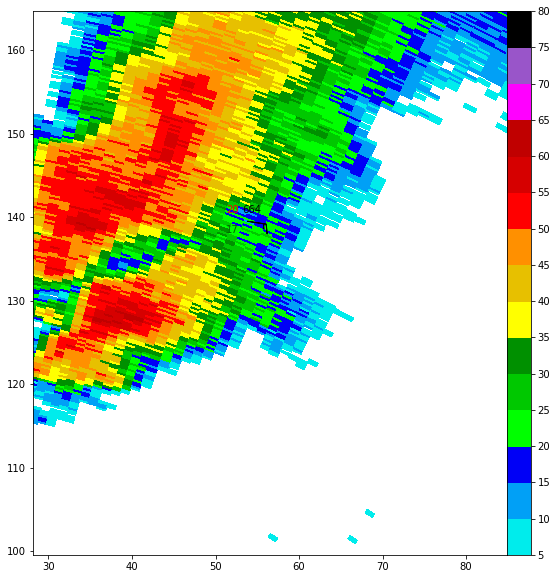

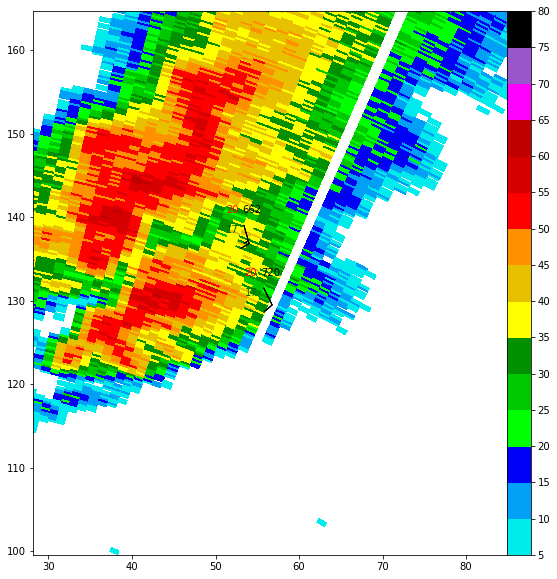

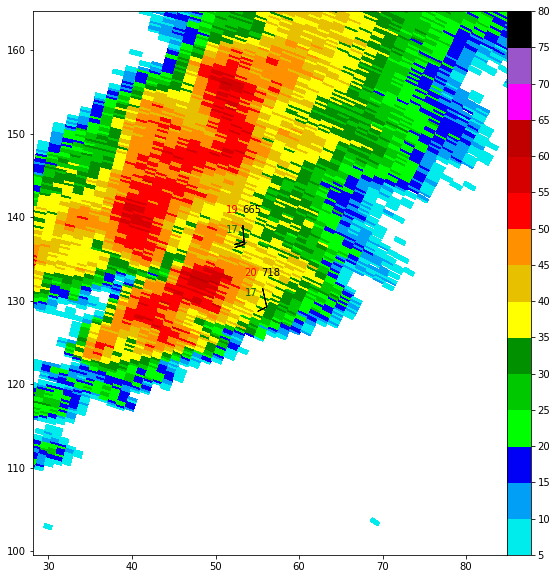

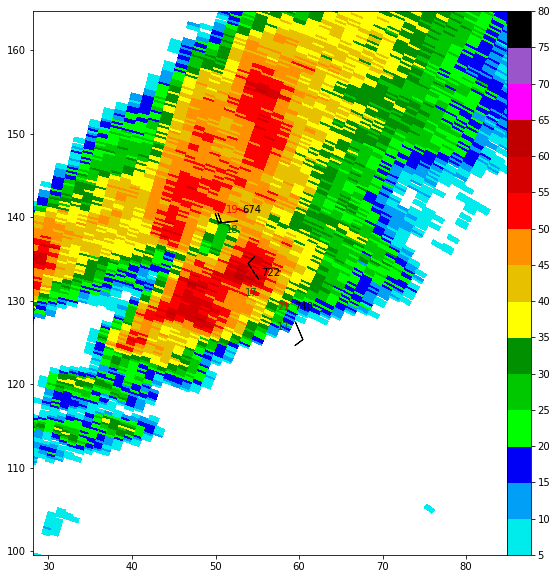

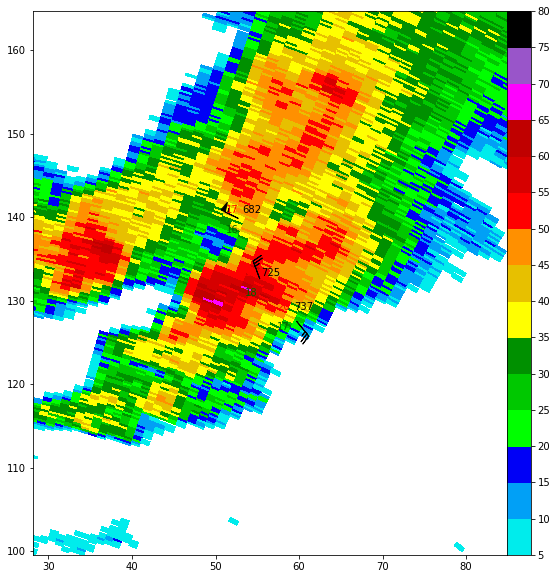

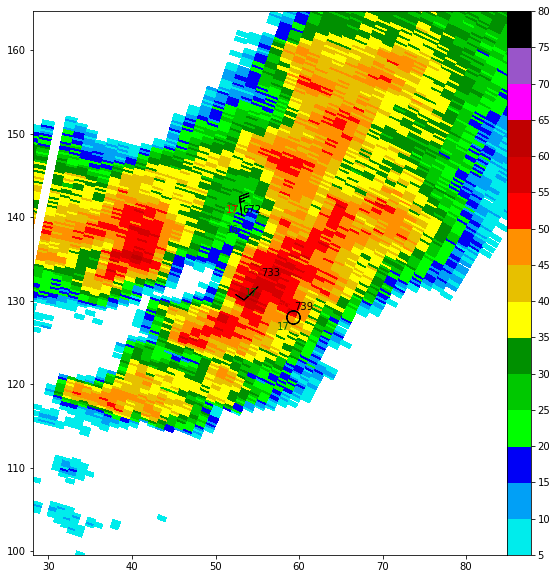

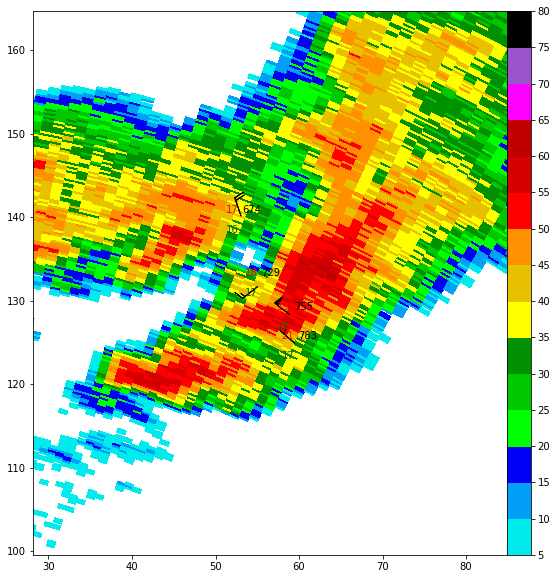

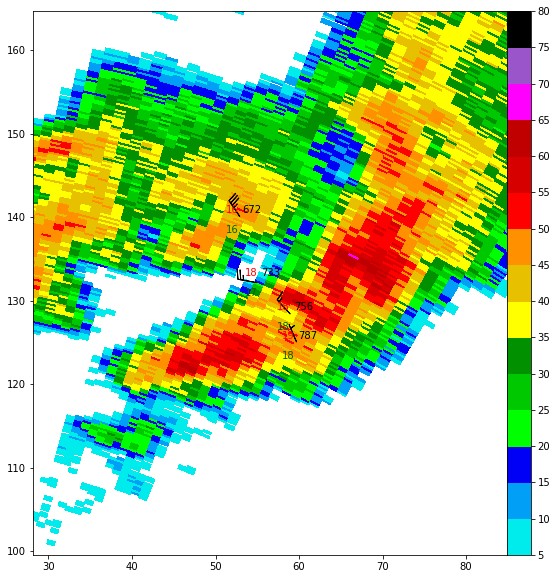

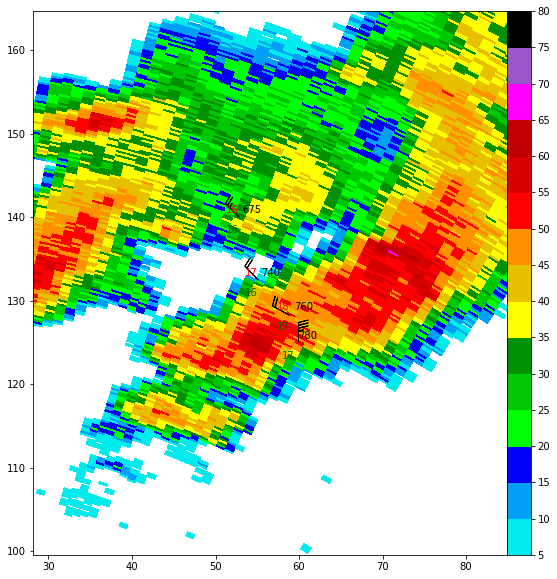

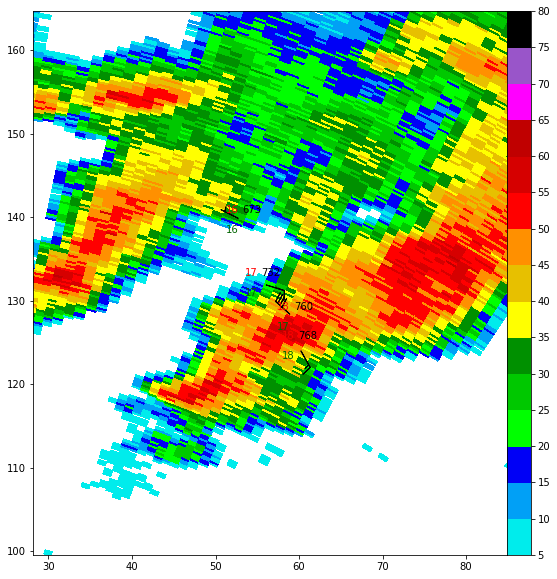

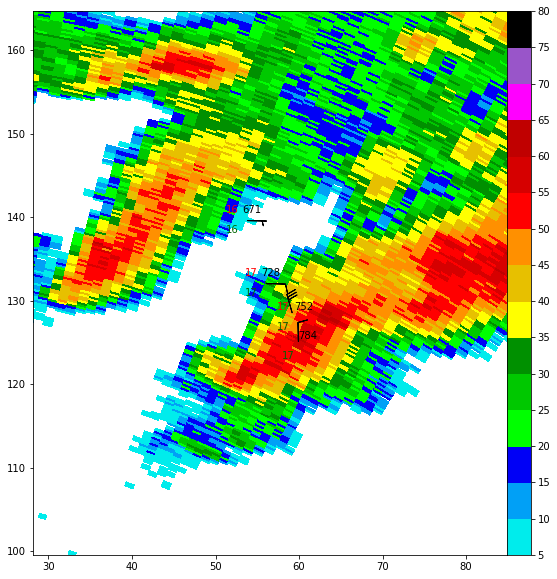

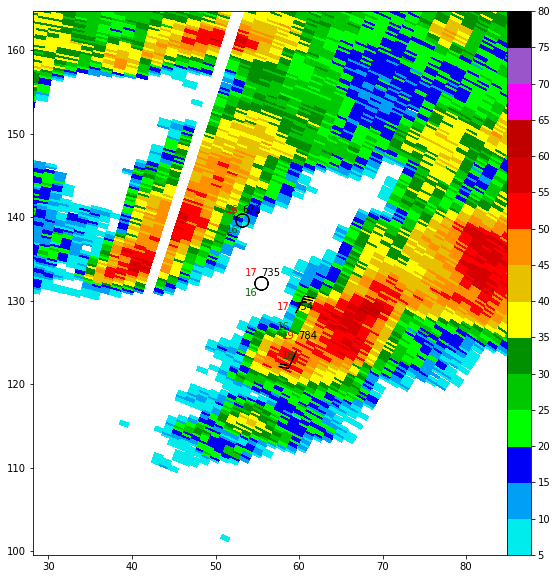

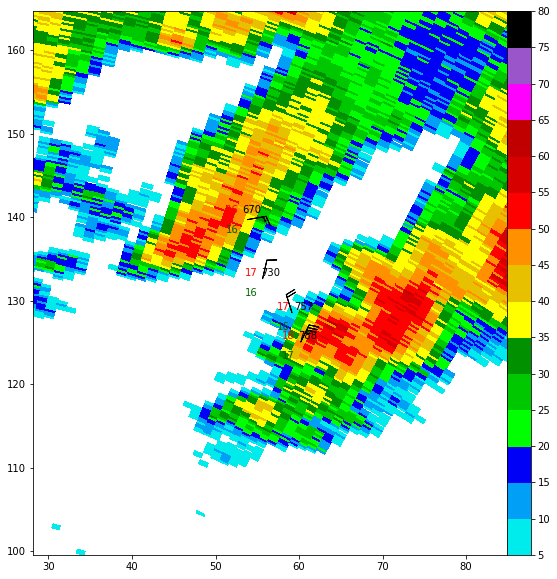

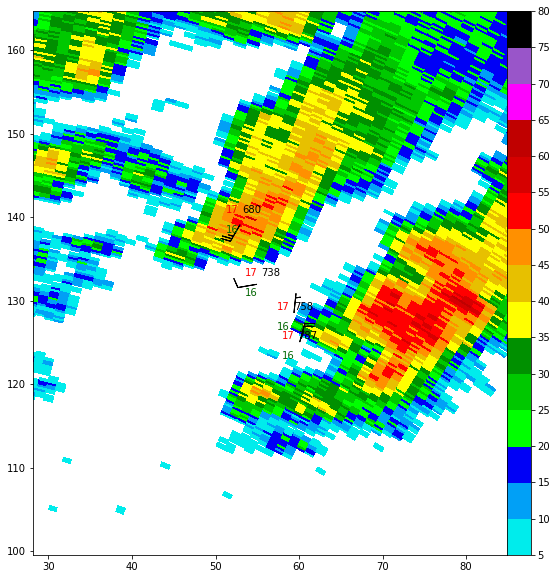

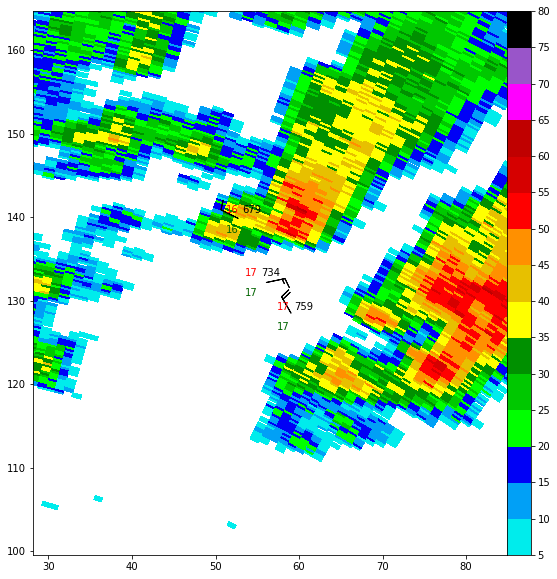

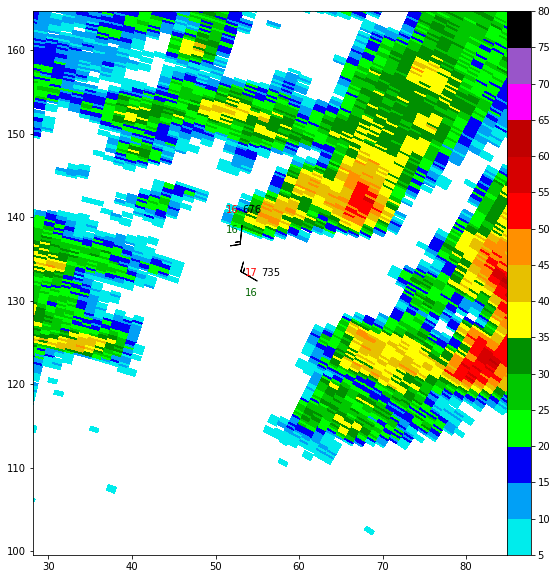

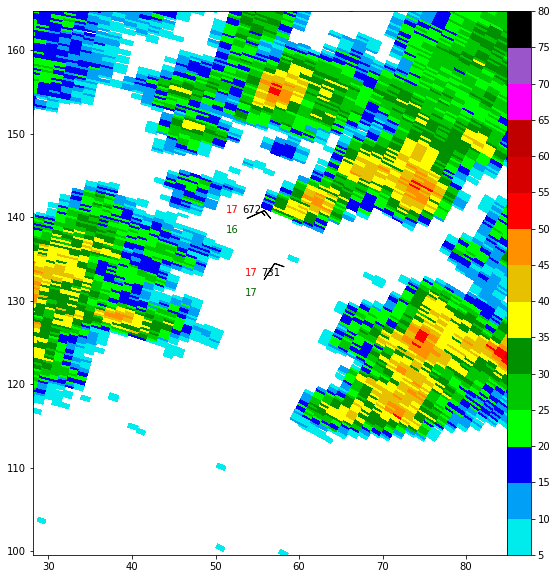

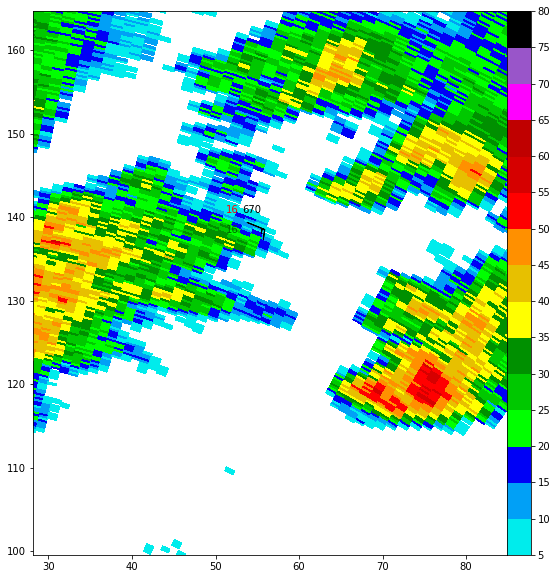

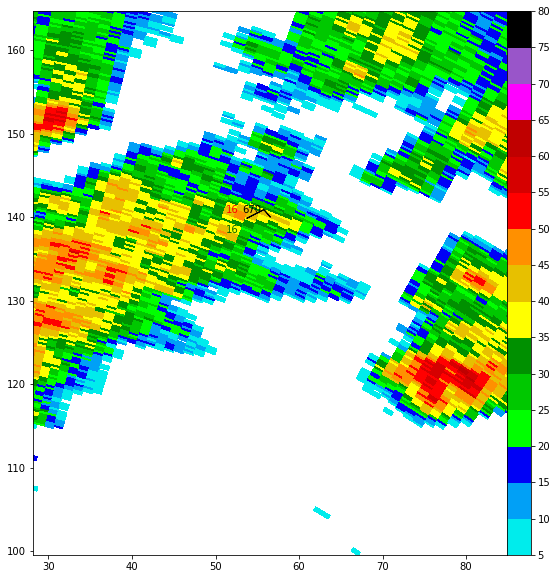

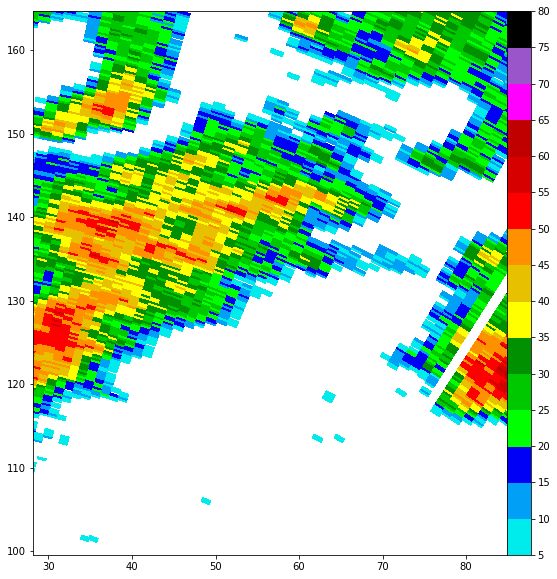

In [4]:
# Go ahead and read in the conventional data at the sweeptimes and plot them:
# %matplotlib notebook
plotdir = '/Users/dawson29/Dropbox/Projects/VORTEXSE/vortexse_enkf_dsd_study/plots'
radlims = [0.0, 250000., 0., 360.]
plotlims = [-1, -1, -1, -1]
ovrmap = False # Currently not working
ovrdis = False
dis_name_list = None
dxy_list = None
fields_D_list = None
deg2rad = np.pi / 180.

# Read time series
dis_dict_at_radar = sim.read_convdata_at_sweeptimes(init_dis_dict, radar_dict)

# Find disdrometer lat/lons and convert them to cartesian coordinates relative to radar lat/lon

dis_dict = sim.get_dis_locs_relative_to_radar(init_dis_dict, radar_dict)

dxlist = [i[0] for i in dis_dict['dradloclist']]
dylist = [i[1] for i in dis_dict['dradloclist']]

# Set plotting limits to center on the disdrometer locations 
if plotlims[0] == -1:
    Dxmin = min(dxlist)
    Dxmax = max(dxlist)
    Dymin = min(dylist)
    Dymax = max(dylist)
    plotlims = [Dxmin - 25000., Dxmax + 25000., Dymin - 25000., Dymax + 25000.]

# Extract stuff from radar dictionary
sweeptimelist = radar_dict['sweeptimelist']
radarsweeplist = radar_dict['radarsweeplist']
outfieldnames = radar_dict['outfieldnameslist'][0] # Just need first entry

# Extract stuff from disdrometer dictionary
templist = dis_dict_at_radar['convdata_at_sweeptimes']['temp']
dewpointlist = dis_dict_at_radar['convdata_at_sweeptimes']['dewpoint']
pressurelist = dis_dict_at_radar['convdata_at_sweeptimes']['pressure']
windspdavgveclist = dis_dict_at_radar['convdata_at_sweeptimes']['windspdavgvec']
winddiravgveclist = dis_dict_at_radar['convdata_at_sweeptimes']['winddiravgvec']


for i, sweeptime in enumerate(sweeptimelist):
    print("i, sweeptime = ", sweeptime)
    figlist, gridlist = pyPIPSradar.plotsweep_pyART(radlims, plotlims, outfieldnames, radarsweeplist[i], ovrmap, 
                                                    ovrdis, dis_name_list, dxy_list, fields_D_list)
    ax = gridlist[0][0]
    
    for j, Dx, Dy in zip(range(len(dxlist)), dxlist, dylist):
        stationplot = StationPlot(ax, [Dx], [Dy])
        stationplot.plot_parameter('NW', [templist[j][i]], color='red')
        stationplot.plot_parameter('SW', [dewpointlist[j][i]], color='darkgreen')
        stationplot.plot_parameter('NE', [pressurelist[j][i]], formatter=lambda v: format(10 * v, '.0f')[-3:])
        u, v = get_wind_components([windspdavgveclist[j][i]] * units('m/s'), [winddiravgveclist[j][i]] * units.degree)
        stationplot.plot_barb(u, v, barb_increments=dict(half=0.5, full=1.0, flag=5.0))

    figlist[0].canvas.draw()
    figlist[0].set_size_inches(10., 10., forward = True)
    figname = 'PIPS_station_{}.png'.format(sweeptime.strftime('%Y%m%d%H%M%S'))
    figpath = os.path.join(plotdir, figname)
    plt.savefig(figpath, dpi=300, bbox_inches='tight')

In [5]:
# Now do the same for the model output
# First set up some stuff

def get_ARPS_member_dir_and_prefix(member, cycle):
    """
    Gets the proper form for the subdirectory and file prefix name given a member number
    and cycle type (either 'posterior' or 'prior'). member number 0 is interpreted as the mean. 
    """
    if member == 0:
        if cycle in 'posterior':
            member_dir = 'ENamean'
            member_prefix = 'enmean'
        elif cycle in 'prior':
            member_dir = 'ENfmean'
            member_prefix = 'efmean'
    else:
        if cycle in 'posterior':
            member_dir = 'EN{:03d}'.format(int(member))
            member_prefix = 'ena{:03d}'.format(int(member))
        elif cycle in 'prior':
            member_dir = 'ENF{:03d}'.format(int(member))
            member_prefix = 'enf{:03d}'.format(int(member))
    
    return member_dir, member_prefix

modelname = 'ARPS'
microphys = 'ZVD'

# From desired start and end times (UTC) get a range of datetimes and corresponding range of times in
# seconds since model initial time
timestamp_model_init = init_model_dict['timestamp_model_init']  # Start time of model corresponding to 0 s
datetime_model_init = datetime.strptime(timestamp_model_init, '%Y%m%d%H%M%S')

timestamp_start = init_model_dict['timestamp_model_start']  # Start time of desired time window
timestamp_stop = init_model_dict['timestamp_model_stop']  # Stop time of desired time window
datetime_start = datetime.strptime(timestamp_start, '%Y%m%d%H%M%S')
datetime_stop = datetime.strptime(timestamp_stop, '%Y%m%d%H%M%S')
tintv = init_model_dict['model_dt']  # Interval in seconds for model output
tintv_mean = init_model_dict['model_dt_mean'] # Interval in seconds for ensemble mean analysis

datetime_range = CRMutils.get_datetime_range(datetime_start, datetime_stop, tintv)
trange = CRMutils.modeltimes_from_datetimes(datetime_range, datetime_start=datetime_model_init)

datetime_range_mean = CRMutils.get_datetime_range(datetime_start, datetime_stop, tintv_mean)
trange_mean = CRMutils.modeltimes_from_datetimes(datetime_range_mean, datetime_start=datetime_model_init)

#basedir = '/Volumes/scr_fast/Projects/VORTEXSE/simulations/ARPS/2016_IOP3/3DVAR/1km0331163DVARCA00005min180_3km030015min540'
fileformat = init_model_dict['fileformat']
expname = '1km453x453_newse'
basedir = init_model_dict['basedirname']
member = 1 # 0 is for ensemble mean
cycle = 'posterior'
member_dir, member_prefix = get_ARPS_member_dir_and_prefix(member, cycle)
member_absdir = os.path.join(basedir, expname, member_dir)
trailer = ''
nproc_x = 15
nproc_y = 6

# Tell the arps_read module what the processor numbers are.
# Yes, I know this is a bad way to do this through globals. I'll fix it eventually.
arps_read.nproc_x = nproc_x
arps_read.nproc_y = nproc_y

if member == 0:
    model_trange_sec = trange_mean
    model_datetime_range = datetime_range_mean
else:
    model_trange_sec = trange
    model_datetime_range = datetime_range
    
model_dict = init_model_dict.copy()

model_dict['trange_member'] = trange
model_dict['trange_mean'] = trange_mean
model_dict['datetime_range_member'] = datetime_range
model_dict['datetime_range_mean'] = datetime_range_mean


if member == 0:
    model_dict['trange'] = trange_mean
    model_dict['datetime_range'] = datetime_range_mean
else:
    model_dict['trange'] = trange
    model_dict['datetime_range'] = datetime_range
    
print(model_datetime_range)

[datetime.datetime(2016, 3, 31, 22, 0), datetime.datetime(2016, 3, 31, 22, 1), datetime.datetime(2016, 3, 31, 22, 2), datetime.datetime(2016, 3, 31, 22, 3), datetime.datetime(2016, 3, 31, 22, 4), datetime.datetime(2016, 3, 31, 22, 5), datetime.datetime(2016, 3, 31, 22, 6), datetime.datetime(2016, 3, 31, 22, 7), datetime.datetime(2016, 3, 31, 22, 8), datetime.datetime(2016, 3, 31, 22, 9), datetime.datetime(2016, 3, 31, 22, 10), datetime.datetime(2016, 3, 31, 22, 11), datetime.datetime(2016, 3, 31, 22, 12), datetime.datetime(2016, 3, 31, 22, 13), datetime.datetime(2016, 3, 31, 22, 14), datetime.datetime(2016, 3, 31, 22, 15), datetime.datetime(2016, 3, 31, 22, 16), datetime.datetime(2016, 3, 31, 22, 17), datetime.datetime(2016, 3, 31, 22, 18), datetime.datetime(2016, 3, 31, 22, 19), datetime.datetime(2016, 3, 31, 22, 20), datetime.datetime(2016, 3, 31, 22, 21), datetime.datetime(2016, 3, 31, 22, 22), datetime.datetime(2016, 3, 31, 22, 23), datetime.datetime(2016, 3, 31, 22, 24), datetime.

In [6]:
# Load the ARPS grid
# Get file path for grdbas file (note that call to read_grid handles the reading of the individual patches)
# If the grdbas file doesn't exist, fall back to a history file
grdbas_path = arps_read.get_file_path(member_absdir, member_prefix, fileformat, filetype='grdbas')

patch_x = 1
patch_y = 1
grdbas_path_test = arps_read.add_patch_number(grdbas_path, patch_x, patch_y)

if not os.path.exists(grdbas_path_test):
    print("grdbas file doesn't exist, trying a history file!")
    grdbas_path = arps_read.get_file_path(member_absdir, member_prefix, fileformat, time=model_trange_sec[0], 
                                          filetype='history')
    grdbas_path_test = arps_read.add_patch_number(grdbas_path, patch_x, patch_y)

    print(grdbas_path_test)
    print(os.path.exists(grdbas_path_test))

# Read in grid information
grid_dict = arps_read.readarpsgrid(grdbas_path)
print(grid_dict.keys())

# Get map projection information and create a Basemap instance
# TODO: convert to use cartopy!

ctrlat, ctrlon, trulat1, trulat2, trulon = arps_read.readarpsmap(grdbas_path)

dx = grid_dict['dx']
dy = grid_dict['dy']
nx = grid_dict['nx']
ny = grid_dict['ny']

mapwidth = nx * dx
mapheight = ny * dy

bgmap = Basemap(projection='lcc', width=mapwidth, height=mapheight, lat_1=trulat1,
                lat_2=trulat2, lat_0=ctrlat, lon_0=ctrlon, resolution='h',
                area_thresh=10., suppress_ticks=False)



dict_keys(['nx', 'ny', 'nz', 'dx', 'dy', 'dz', 'x', 'y', 'z', 'zp', 'xs', 'ys', 'zs', 'zpagl', 'zsagl'])


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [7]:
# Put the basemap instance into the grid_dict
grid_dict['bgmap'] = bgmap

# Find coordinates of PIPS stations in the model
dis_dict = sim.get_dis_locs_arps_real_grid(dis_dict, grid_dict)


coord_array = np.array(dis_dict['dmodcrdlist'])

print(coord_array) 
print(coord_array.shape) 
print(coord_array[0]) 
# coord_array = coord_array.T

[[226.22825433 253.40098553]
 [222.37480154 257.58480521]
 [226.75691376 249.97353499]
 [220.16784265 265.07492488]]
(4, 2)
[226.22825433 253.40098553]


[226.2282543262902, 222.37480154110668, 226.75691376130987, 220.1678426462494]
[253.40098552587978, 257.58480521031026, 249.97353498544854, 265.074924876145]
[226728.2543262902, 222874.8015411067, 227256.91376130987, 220667.8426462494]
[253900.98552587978, 258084.80521031027, 250473.53498544852, 265574.924876145]
[195667.8426462494, 252256.91376130987, 225473.53498544852, 290574.924876145]
197 254 226 293
310316 221203
2016-03-31 22:12:00
2016 3 31 22 12 0
2016-03-31 22:12:03 2016-03-31 22:12:00
GPS Offset 0:00:03
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Severe Wind contamination, masking entire PSD!
Requested DSD interval: 60.0. Actual DSD interval: 60.0
310316 220133
2016-03-31 22:01:30
2016 3 31 22 1 30
2016-03-31 22:01:33 2016-03-31 22:01:30
GPS Offset 0:00:03
Severe Wind contamination, masking entire PSD!
Requested DSD interval: 60.0. Actual DSD interval: 60.0
310316 222503
2016-03-

Loading time  14820.0
/Users/dawson29/sshfs_mounts/rice_scratch/VORTEXSE/simulations/ARPS/2016_IOP3/EnKF/1km453x453_newse/1km453x453_newse/EN001/ena001.hdf014820
field names (before):  ['dBZmod']
field names (after):  ['dBZmod']
needed_variables (before):  {'dBZmod'}
existing var dict (inside retrieve_variables):  dict_keys([])
needed variables (after):  {'dBZmod'}
retrieved fields:  dict_keys(['dBZmod'])
axis_names:  ('x', 'y')
xlim, ylim:  (195667.8426462494, 252256.91376130987) (225473.53498544852, 290574.924876145)
Loading time  14880.0
/Users/dawson29/sshfs_mounts/rice_scratch/VORTEXSE/simulations/ARPS/2016_IOP3/EnKF/1km453x453_newse/1km453x453_newse/EN001/ena001.hdf014880
field names (before):  ['dBZmod']
field names (after):  ['dBZmod']
needed_variables (before):  {'dBZmod'}
existing var dict (inside retrieve_variables):  dict_keys([])
needed variables (after):  {'dBZmod'}
retrieved fields:  dict_keys(['dBZmod'])
axis_names:  ('x', 'y')
xlim, ylim:  (195667.8426462494, 252256.91

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/ipykernel_launcher.py:95: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Loading time  15660.0
/Users/dawson29/sshfs_mounts/rice_scratch/VORTEXSE/simulations/ARPS/2016_IOP3/EnKF/1km453x453_newse/1km453x453_newse/EN001/ena001.hdf015660
field names (before):  ['dBZmod']
field names (after):  ['dBZmod']
needed_variables (before):  {'dBZmod'}
existing var dict (inside retrieve_variables):  dict_keys([])
needed variables (after):  {'dBZmod'}
retrieved fields:  dict_keys(['dBZmod'])
axis_names:  ('x', 'y')
xlim, ylim:  (195667.8426462494, 252256.91376130987) (225473.53498544852, 290574.924876145)
Loading time  15720.0
/Users/dawson29/sshfs_mounts/rice_scratch/VORTEXSE/simulations/ARPS/2016_IOP3/EnKF/1km453x453_newse/1km453x453_newse/EN001/ena001.hdf015720
field names (before):  ['dBZmod']
field names (after):  ['dBZmod']
needed_variables (before):  {'dBZmod'}
existing var dict (inside retrieve_variables):  dict_keys([])
needed variables (after):  {'dBZmod'}
retrieved fields:  dict_keys(['dBZmod'])
axis_names:  ('x', 'y')
xlim, ylim:  (195667.8426462494, 252256.91

needed variables (after):  {'dBZmod'}
retrieved fields:  dict_keys(['dBZmod'])
axis_names:  ('x', 'y')
xlim, ylim:  (195667.8426462494, 252256.91376130987) (225473.53498544852, 290574.924876145)
Loading time  16620.0
/Users/dawson29/sshfs_mounts/rice_scratch/VORTEXSE/simulations/ARPS/2016_IOP3/EnKF/1km453x453_newse/1km453x453_newse/EN001/ena001.hdf016620
field names (before):  ['dBZmod']
field names (after):  ['dBZmod']
needed_variables (before):  {'dBZmod'}
existing var dict (inside retrieve_variables):  dict_keys([])
needed variables (after):  {'dBZmod'}
retrieved fields:  dict_keys(['dBZmod'])
axis_names:  ('x', 'y')
xlim, ylim:  (195667.8426462494, 252256.91376130987) (225473.53498544852, 290574.924876145)
Loading time  16680.0
/Users/dawson29/sshfs_mounts/rice_scratch/VORTEXSE/simulations/ARPS/2016_IOP3/EnKF/1km453x453_newse/1km453x453_newse/EN001/ena001.hdf016680
field names (before):  ['dBZmod']
field names (after):  ['dBZmod']
needed_variables (before):  {'dBZmod'}
existing var

needed variables (after):  {'dBZmod'}
retrieved fields:  dict_keys(['dBZmod'])
axis_names:  ('x', 'y')
xlim, ylim:  (195667.8426462494, 252256.91376130987) (225473.53498544852, 290574.924876145)
Loading time  17580.0
/Users/dawson29/sshfs_mounts/rice_scratch/VORTEXSE/simulations/ARPS/2016_IOP3/EnKF/1km453x453_newse/1km453x453_newse/EN001/ena001.hdf017580
field names (before):  ['dBZmod']
field names (after):  ['dBZmod']
needed_variables (before):  {'dBZmod'}
existing var dict (inside retrieve_variables):  dict_keys([])
needed variables (after):  {'dBZmod'}
retrieved fields:  dict_keys(['dBZmod'])
axis_names:  ('x', 'y')
xlim, ylim:  (195667.8426462494, 252256.91376130987) (225473.53498544852, 290574.924876145)
Loading time  17640.0
/Users/dawson29/sshfs_mounts/rice_scratch/VORTEXSE/simulations/ARPS/2016_IOP3/EnKF/1km453x453_newse/1km453x453_newse/EN001/ena001.hdf017640
field names (before):  ['dBZmod']
field names (after):  ['dBZmod']
needed_variables (before):  {'dBZmod'}
existing var

needed variables (after):  {'dBZmod'}
retrieved fields:  dict_keys(['dBZmod'])
axis_names:  ('x', 'y')
xlim, ylim:  (195667.8426462494, 252256.91376130987) (225473.53498544852, 290574.924876145)
Loading time  18540.0
/Users/dawson29/sshfs_mounts/rice_scratch/VORTEXSE/simulations/ARPS/2016_IOP3/EnKF/1km453x453_newse/1km453x453_newse/EN001/ena001.hdf018540
field names (before):  ['dBZmod']
field names (after):  ['dBZmod']
needed_variables (before):  {'dBZmod'}
existing var dict (inside retrieve_variables):  dict_keys([])
needed variables (after):  {'dBZmod'}
retrieved fields:  dict_keys(['dBZmod'])
axis_names:  ('x', 'y')
xlim, ylim:  (195667.8426462494, 252256.91376130987) (225473.53498544852, 290574.924876145)
Loading time  18600.0
/Users/dawson29/sshfs_mounts/rice_scratch/VORTEXSE/simulations/ARPS/2016_IOP3/EnKF/1km453x453_newse/1km453x453_newse/EN001/ena001.hdf018600
field names (before):  ['dBZmod']
field names (after):  ['dBZmod']
needed_variables (before):  {'dBZmod'}
existing var

needed variables (after):  {'dBZmod'}
retrieved fields:  dict_keys(['dBZmod'])
axis_names:  ('x', 'y')
xlim, ylim:  (195667.8426462494, 252256.91376130987) (225473.53498544852, 290574.924876145)
Loading time  19500.0
/Users/dawson29/sshfs_mounts/rice_scratch/VORTEXSE/simulations/ARPS/2016_IOP3/EnKF/1km453x453_newse/1km453x453_newse/EN001/ena001.hdf019500
field names (before):  ['dBZmod']
field names (after):  ['dBZmod']
needed_variables (before):  {'dBZmod'}
existing var dict (inside retrieve_variables):  dict_keys([])
needed variables (after):  {'dBZmod'}
retrieved fields:  dict_keys(['dBZmod'])
axis_names:  ('x', 'y')
xlim, ylim:  (195667.8426462494, 252256.91376130987) (225473.53498544852, 290574.924876145)
Loading time  19560.0
/Users/dawson29/sshfs_mounts/rice_scratch/VORTEXSE/simulations/ARPS/2016_IOP3/EnKF/1km453x453_newse/1km453x453_newse/EN001/ena001.hdf019560
field names (before):  ['dBZmod']
field names (after):  ['dBZmod']
needed_variables (before):  {'dBZmod'}
existing var

needed variables (after):  {'dBZmod'}
retrieved fields:  dict_keys(['dBZmod'])
axis_names:  ('x', 'y')
xlim, ylim:  (195667.8426462494, 252256.91376130987) (225473.53498544852, 290574.924876145)


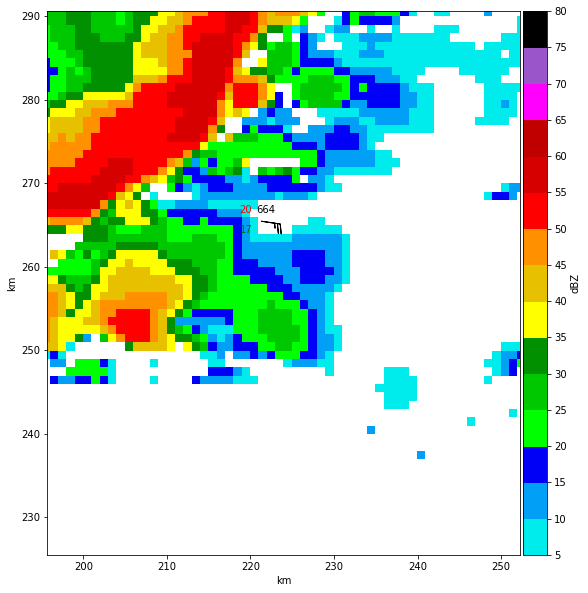

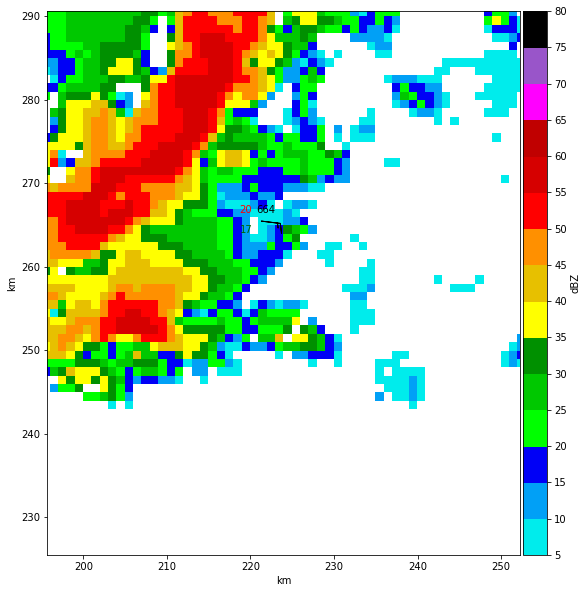

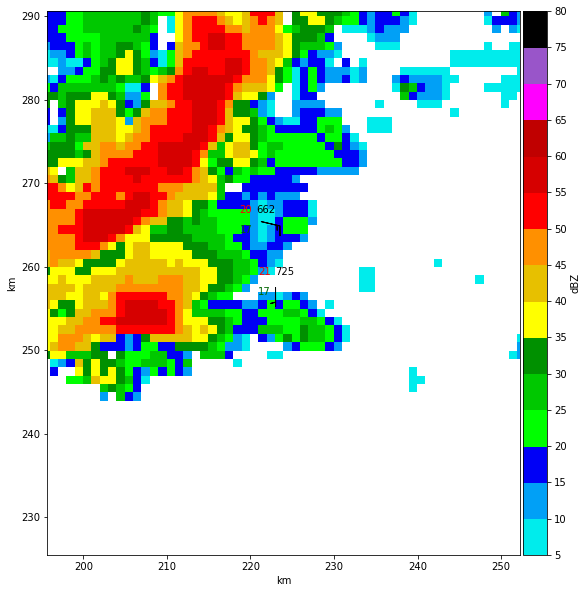

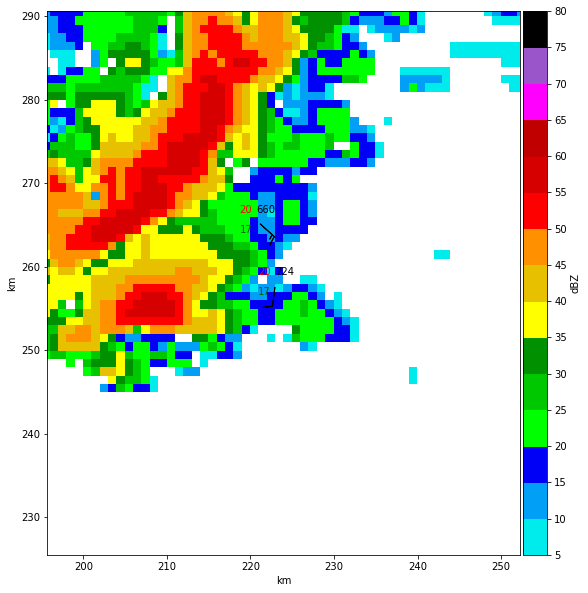

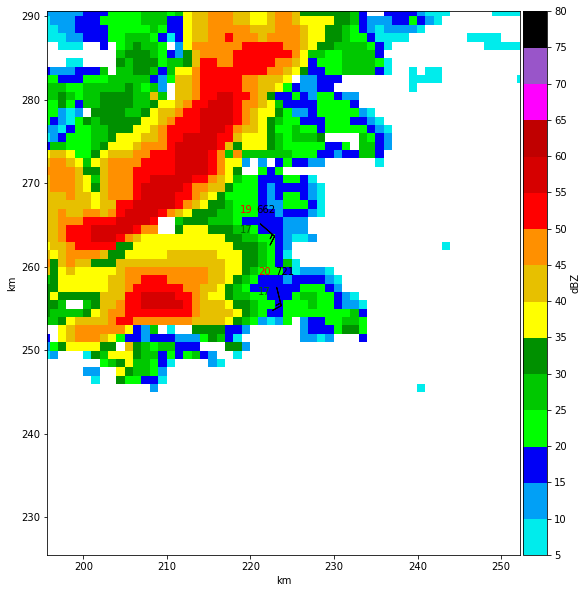

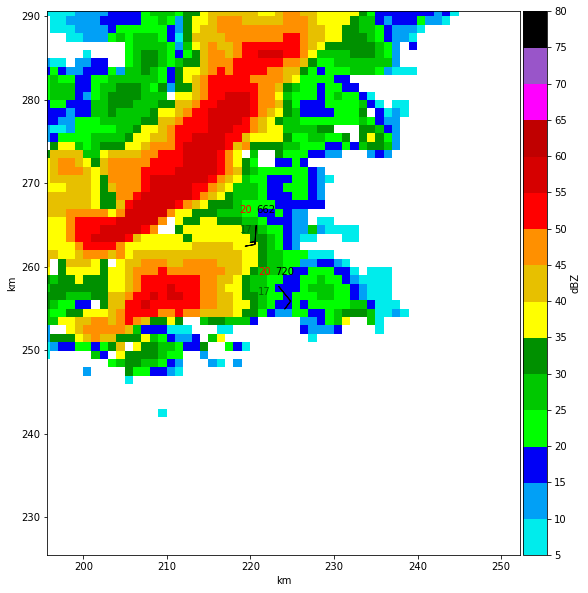

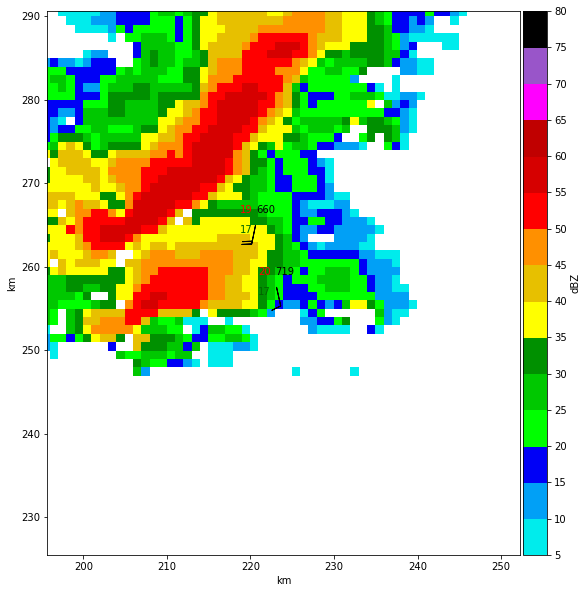

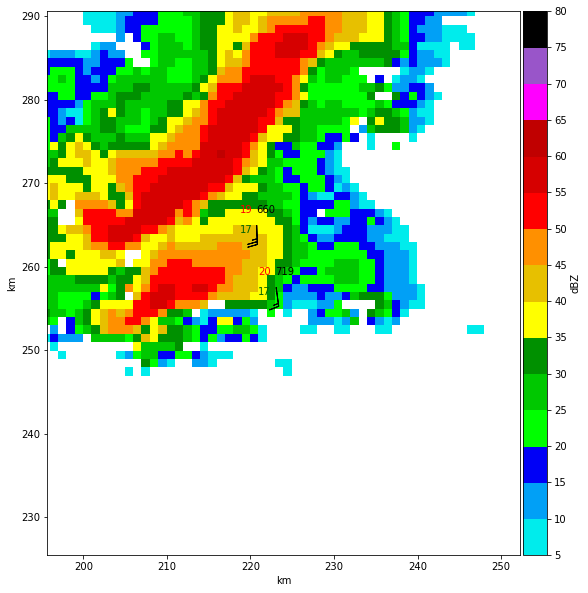

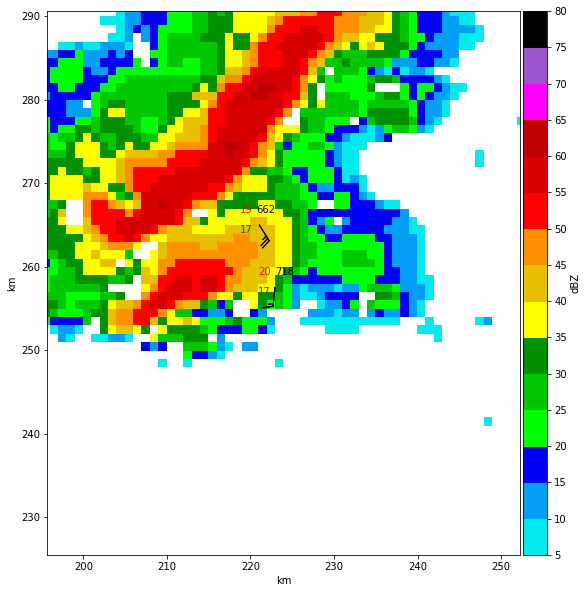

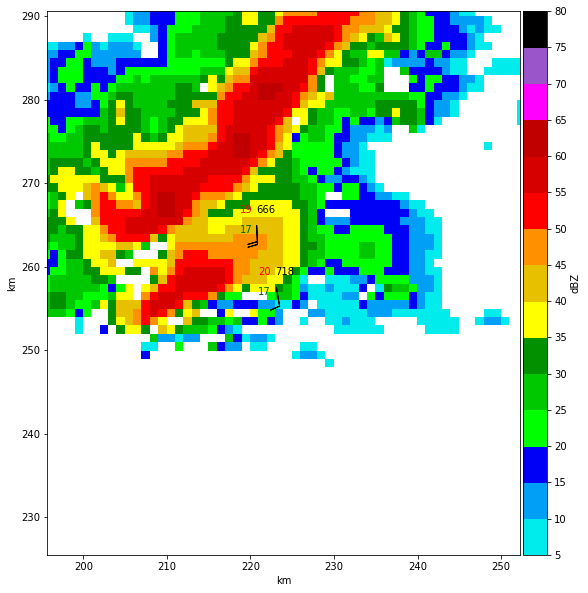

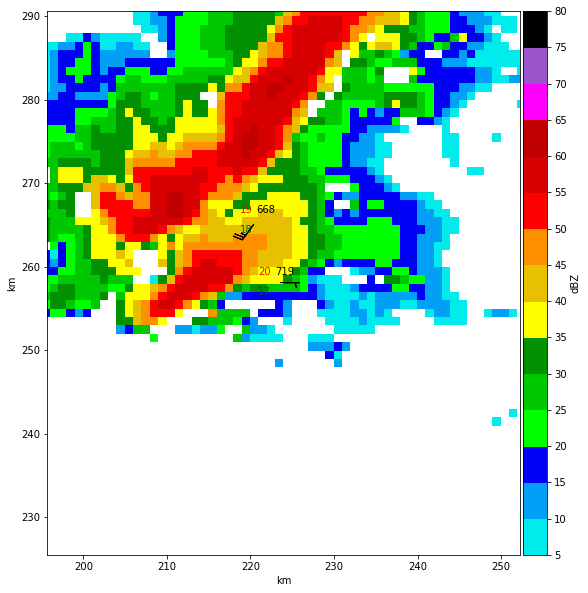

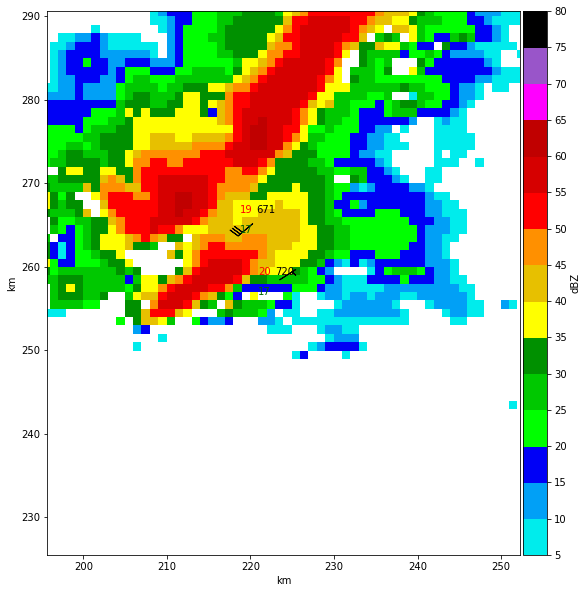

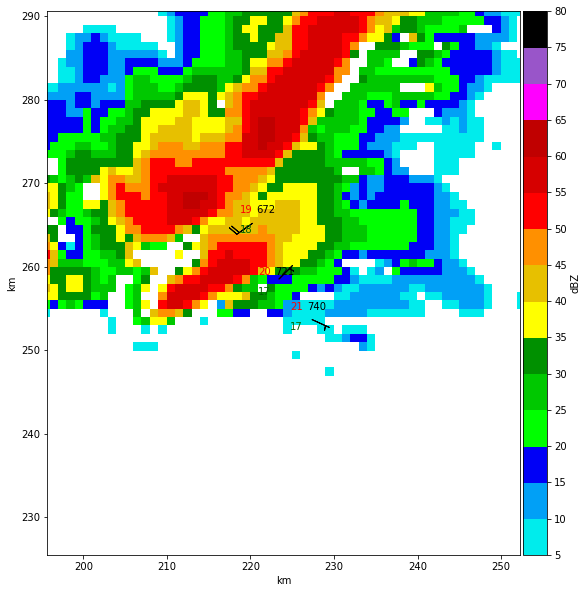

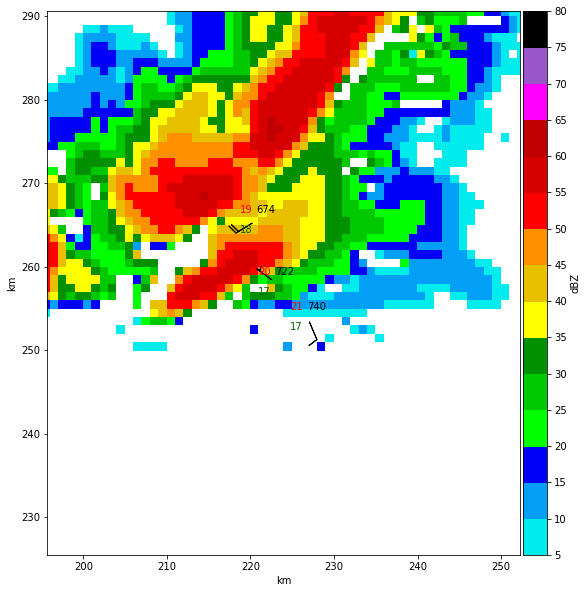

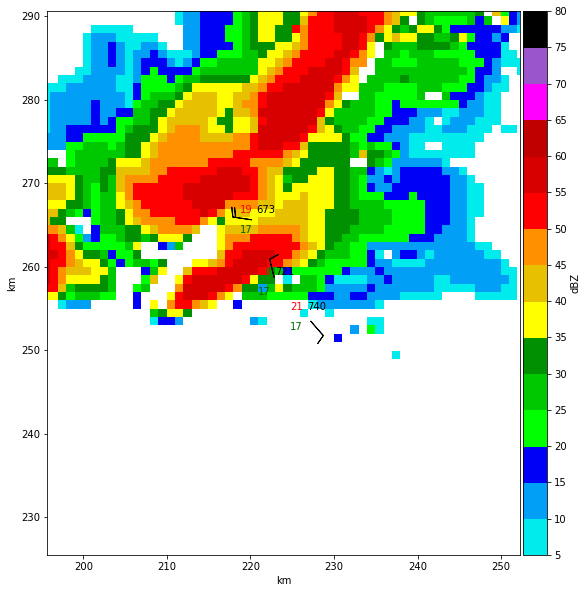

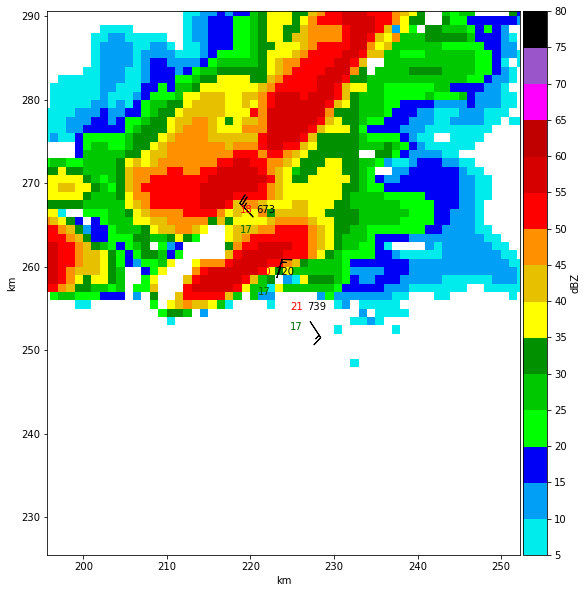

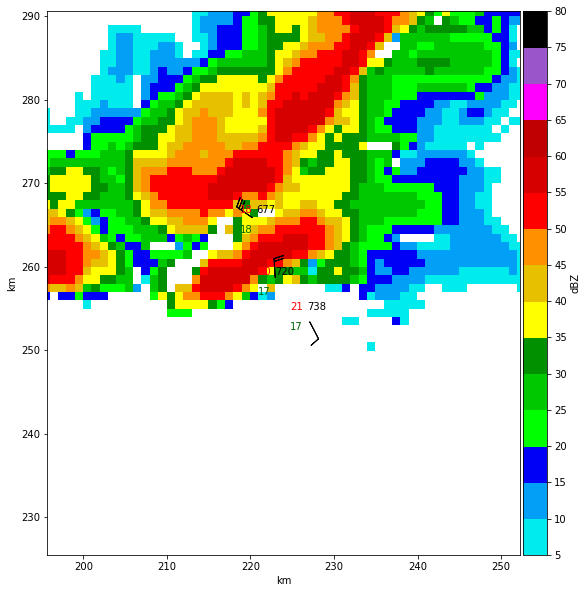

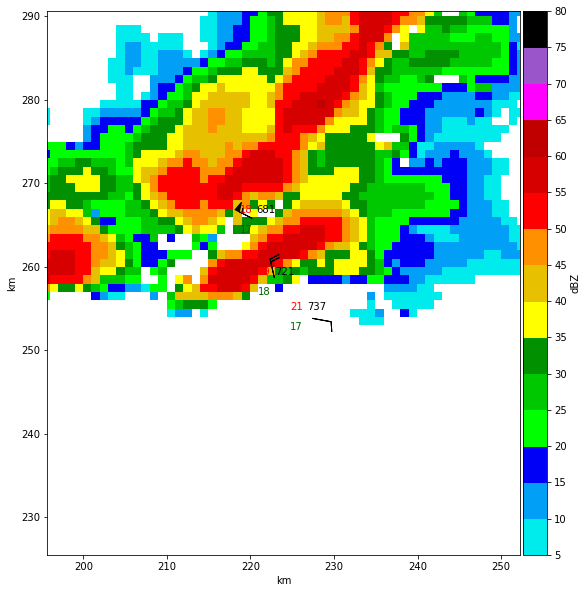

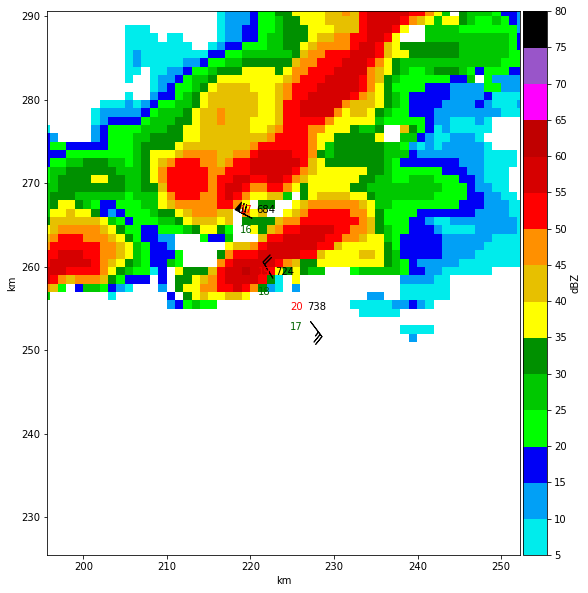

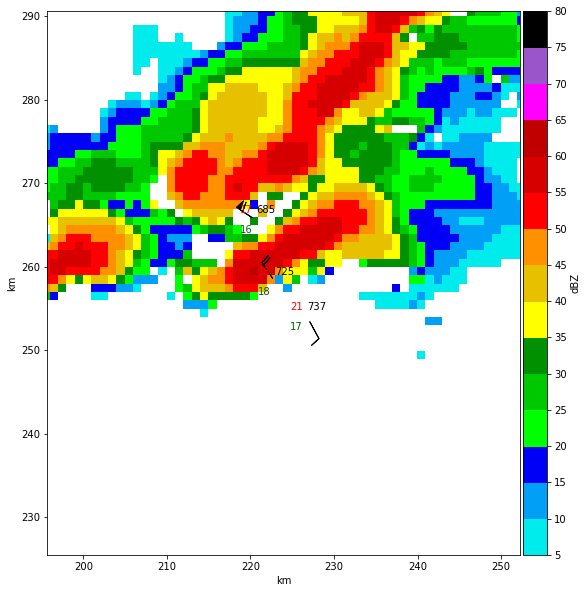

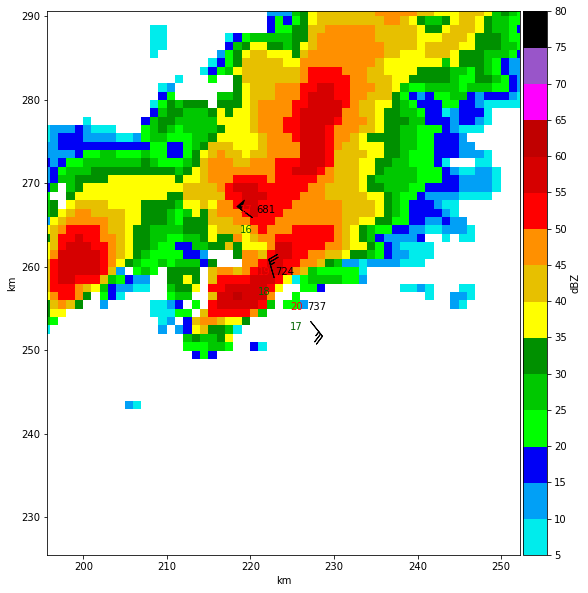

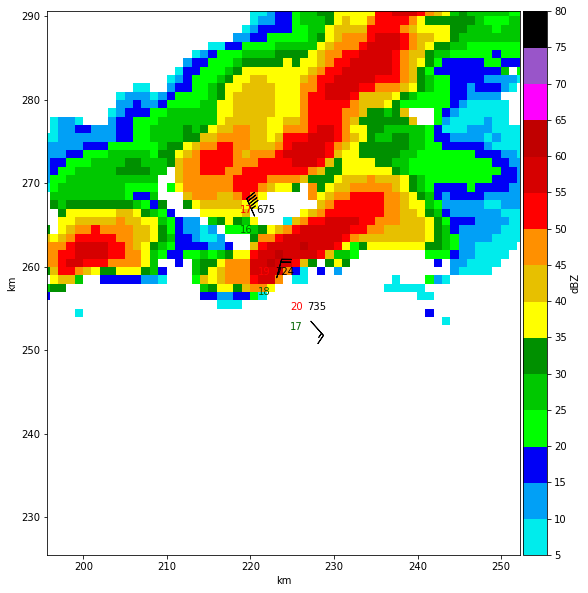

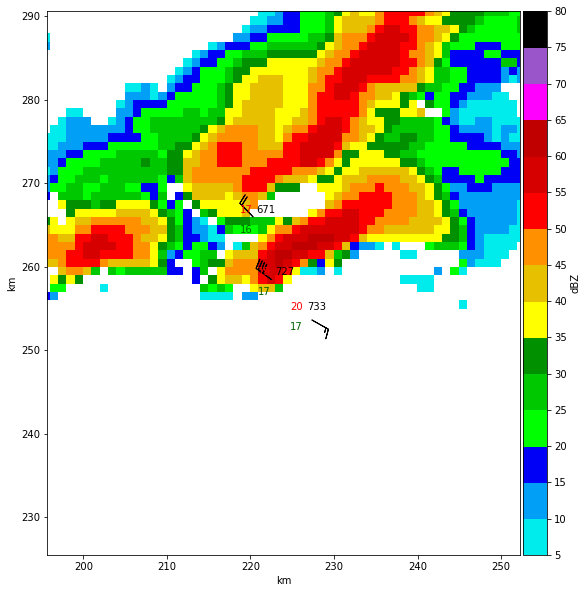

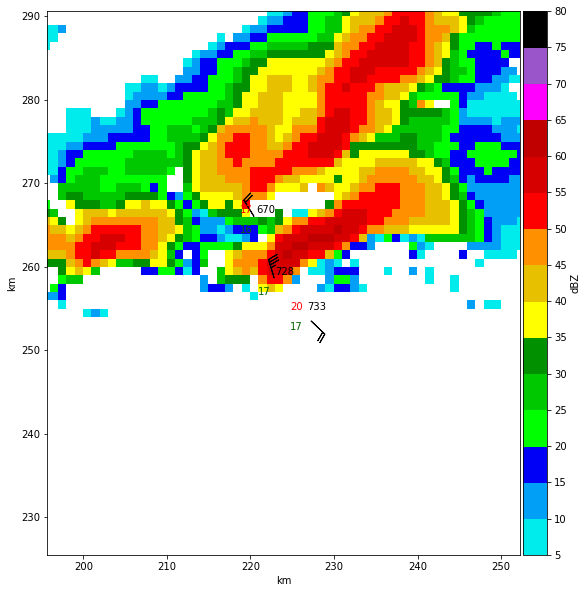

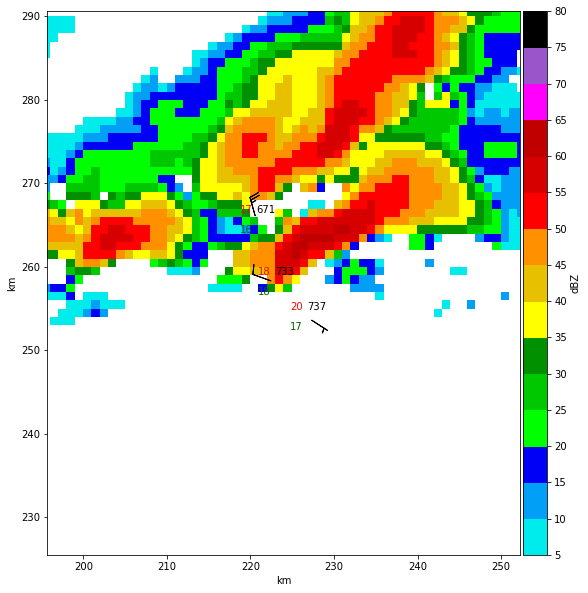

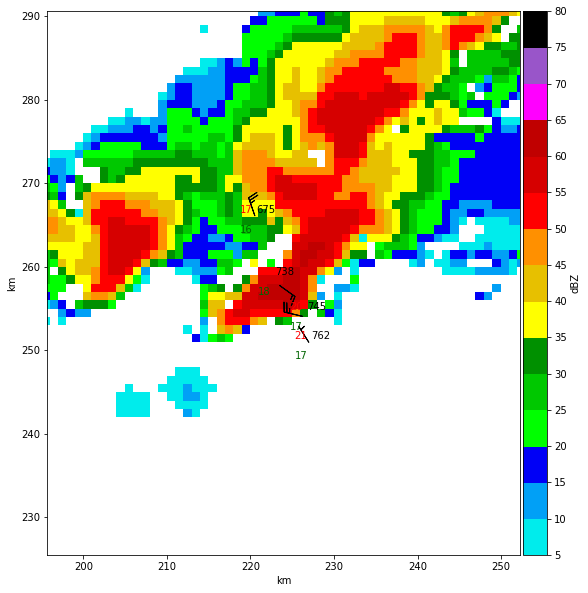

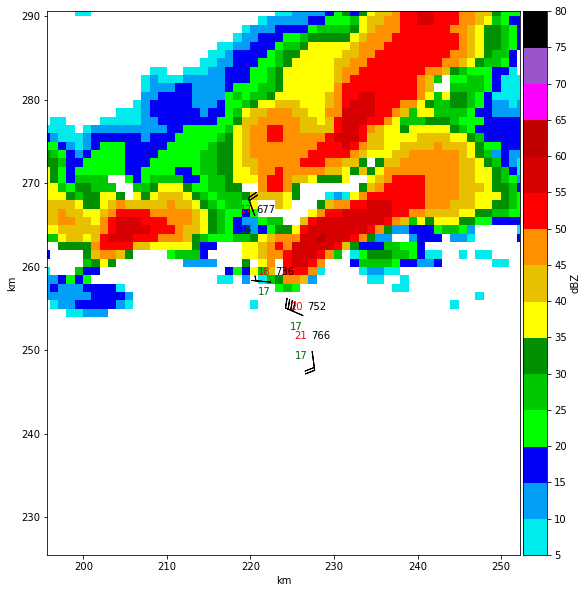

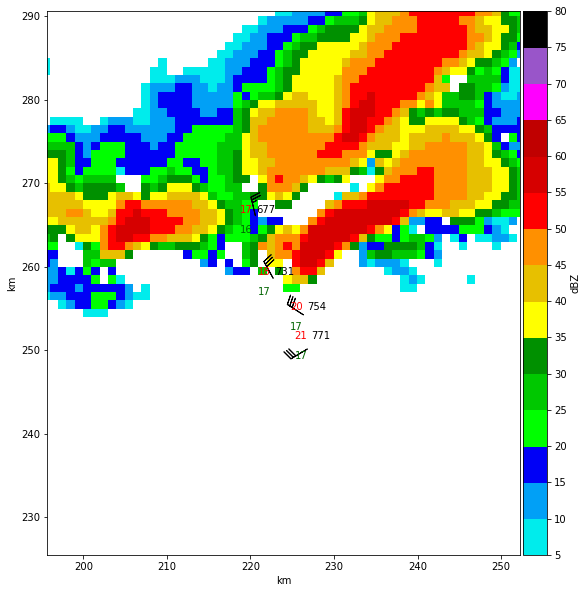

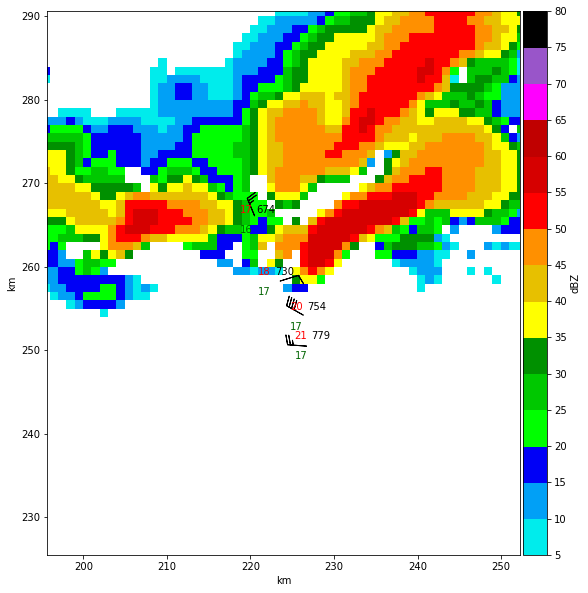

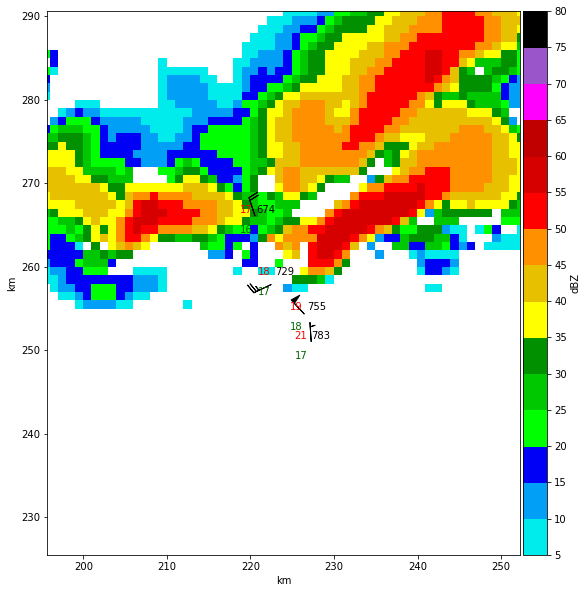

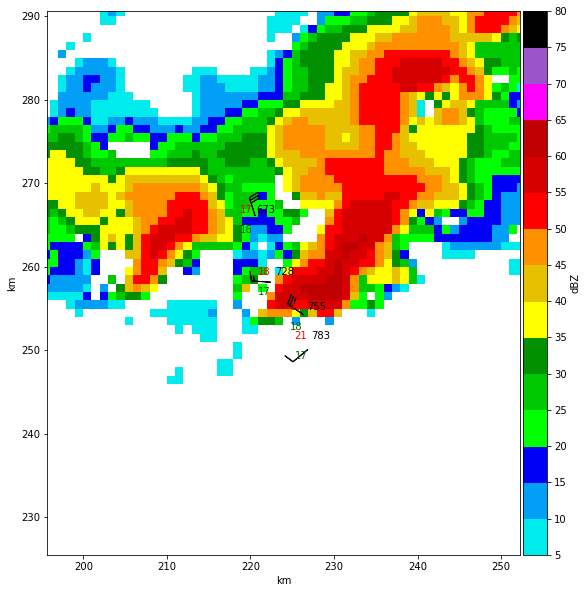

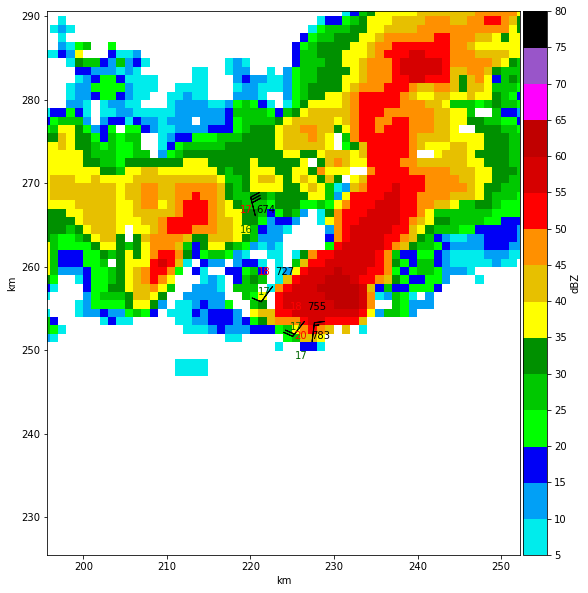

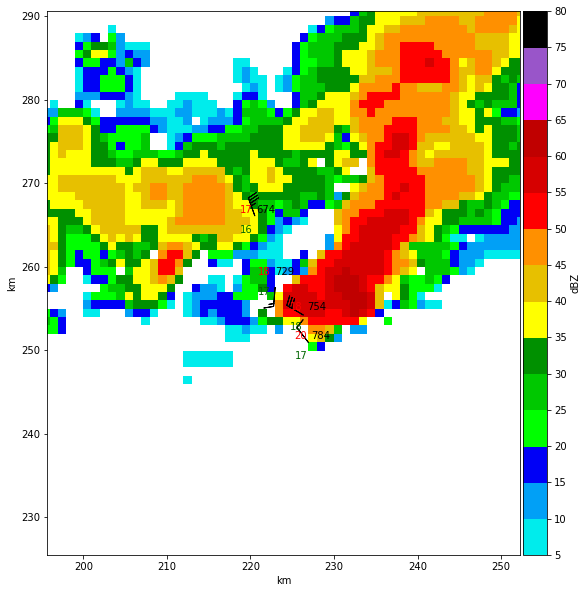

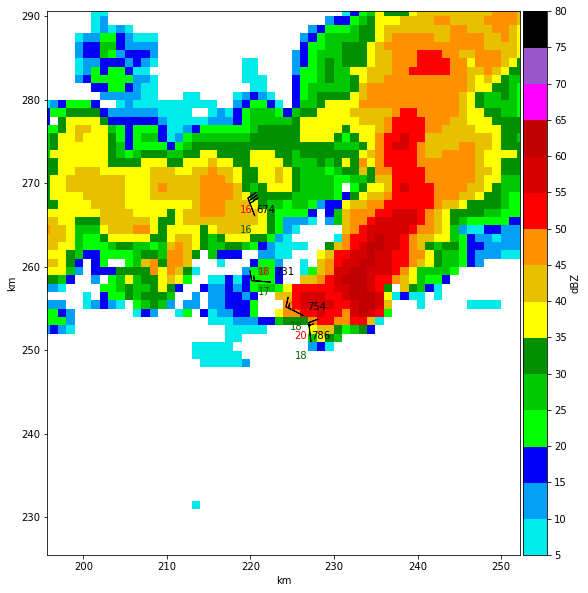

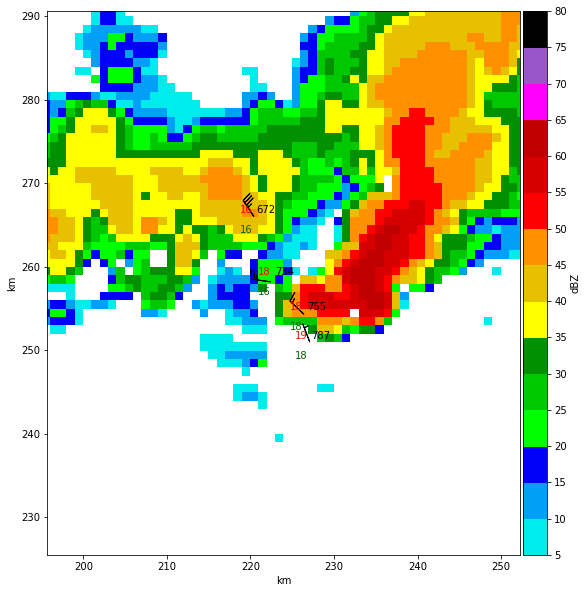

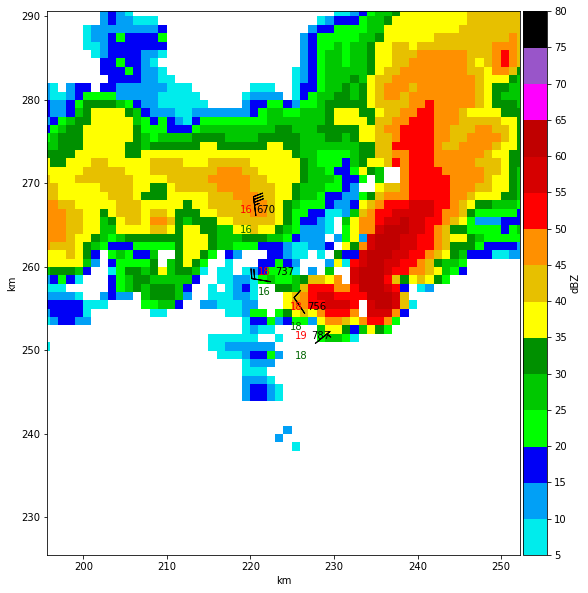

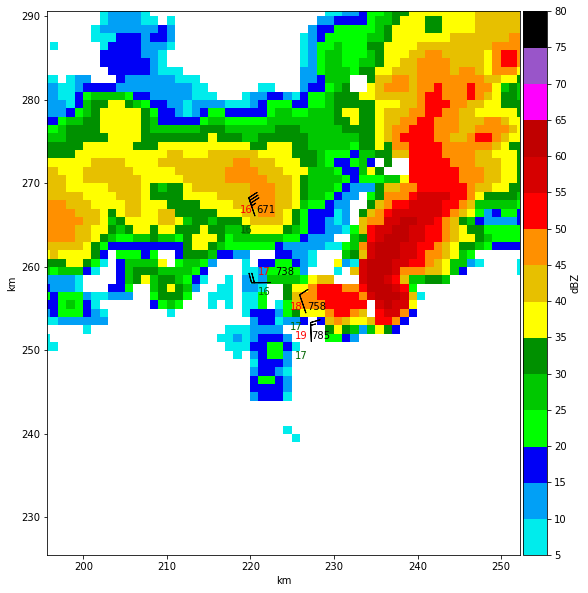

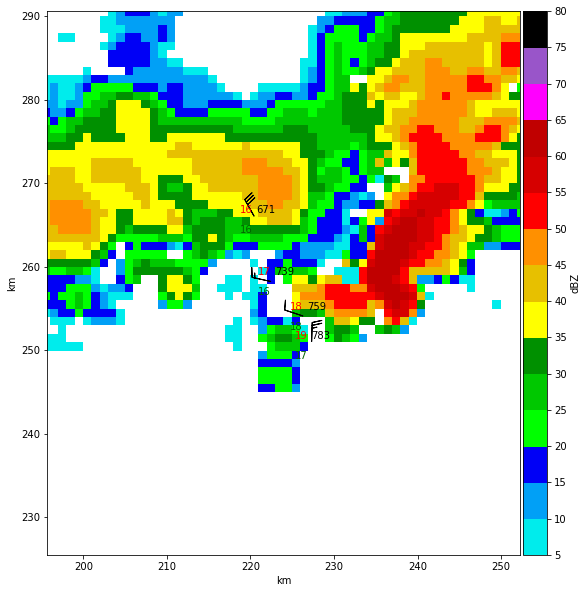

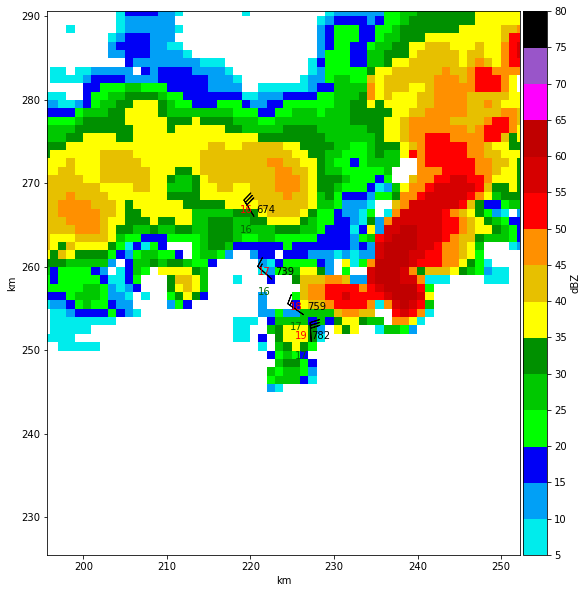

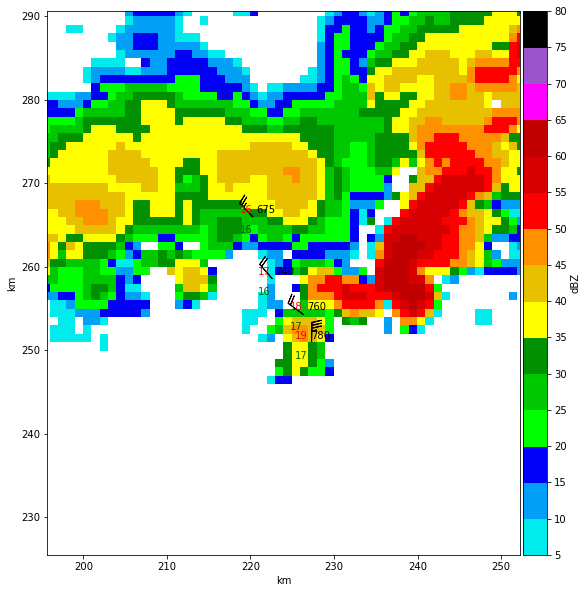

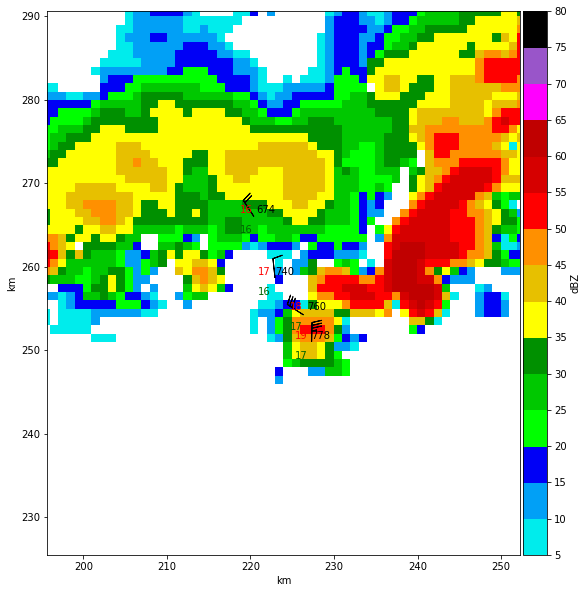

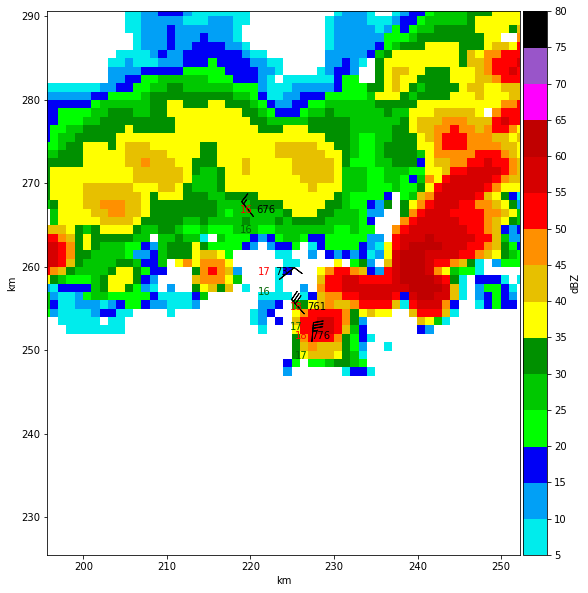

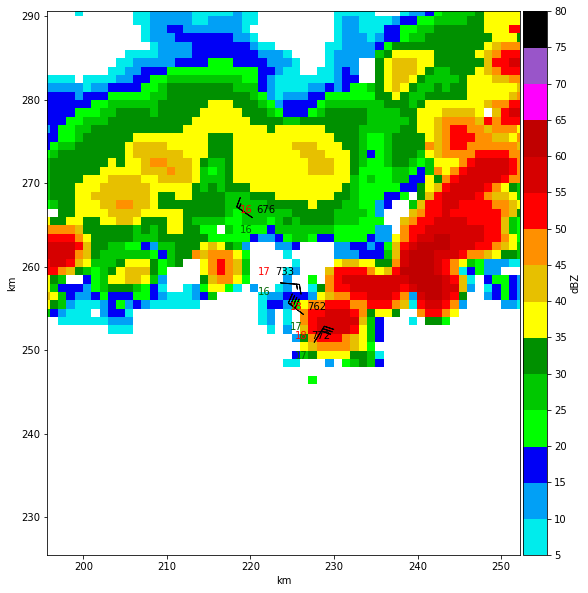

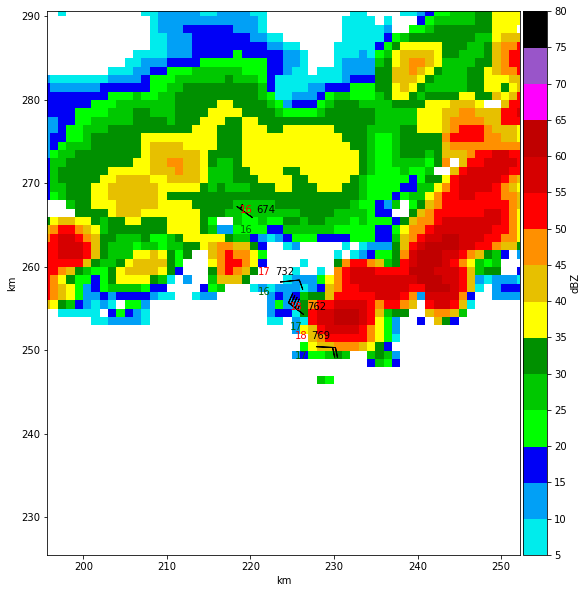

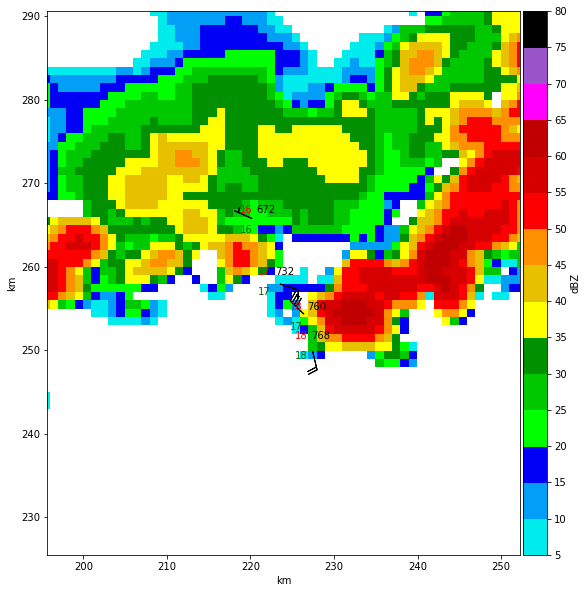

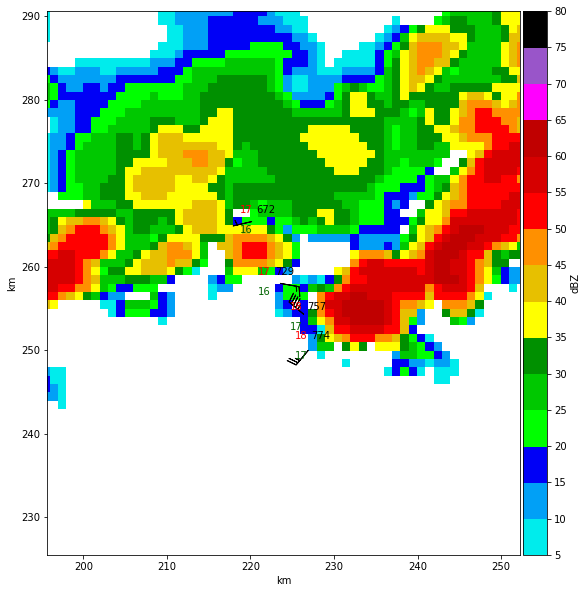

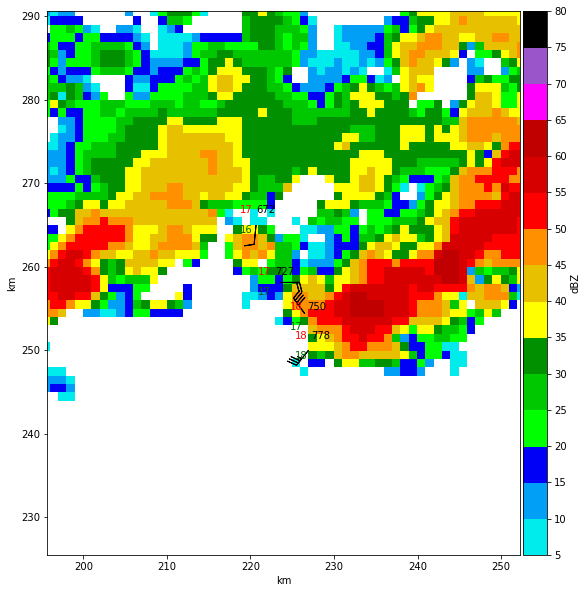

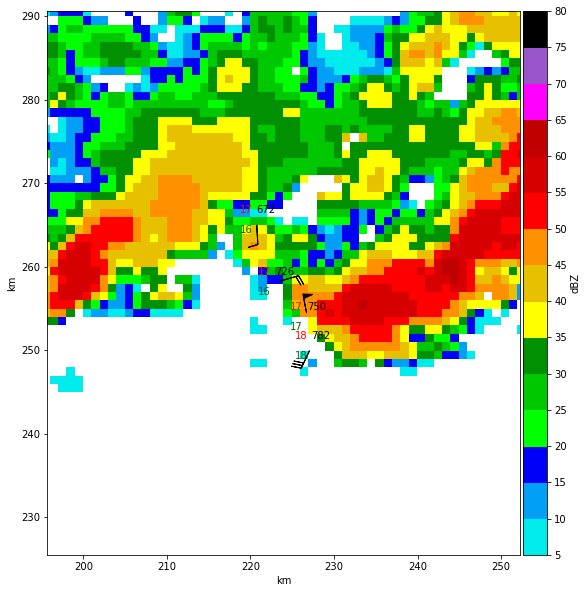

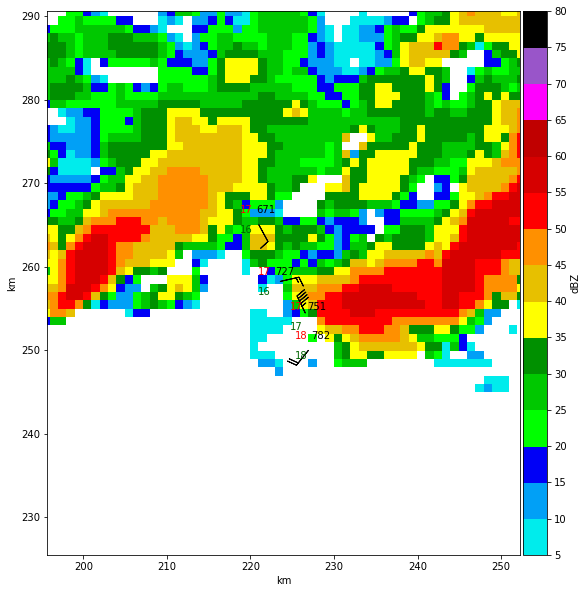

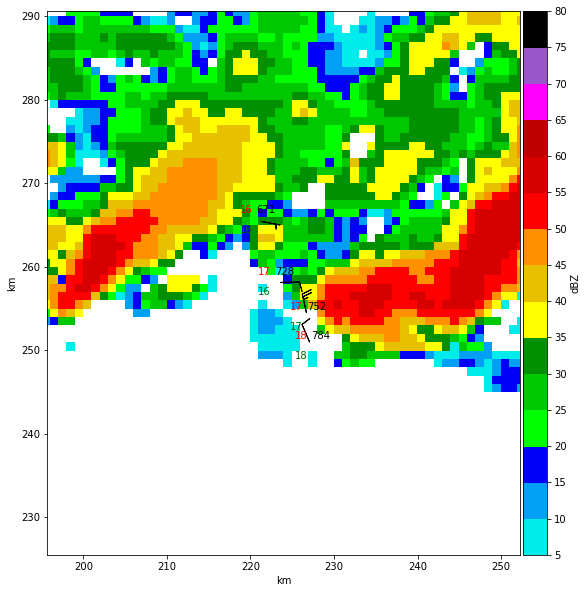

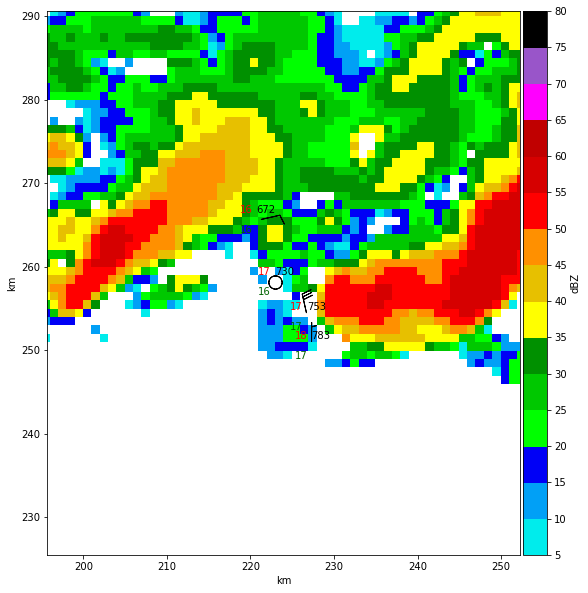

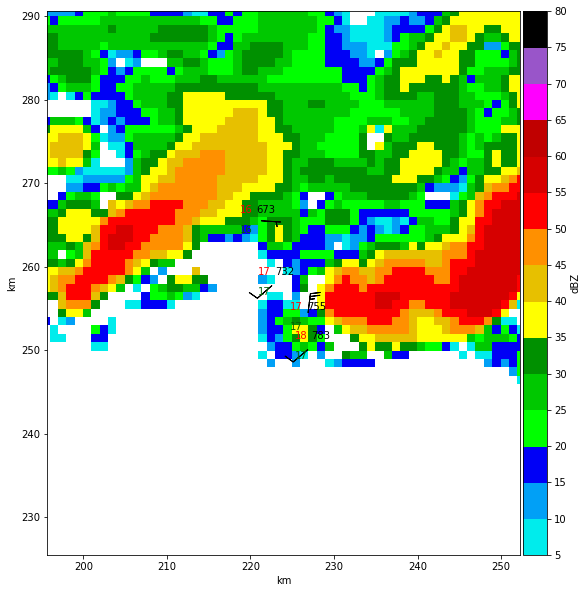

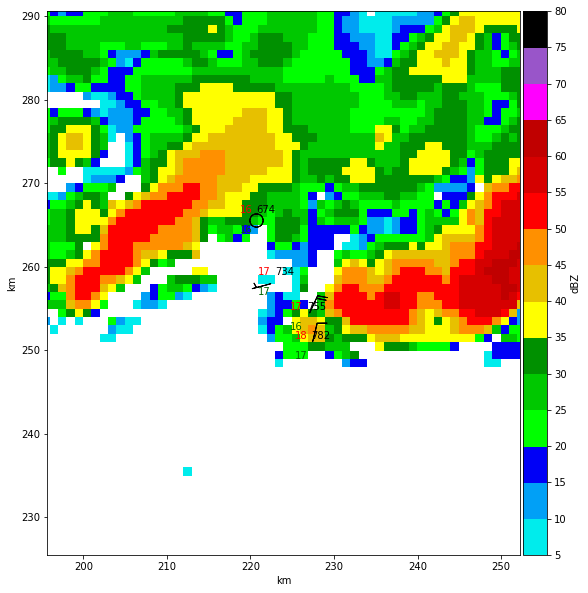

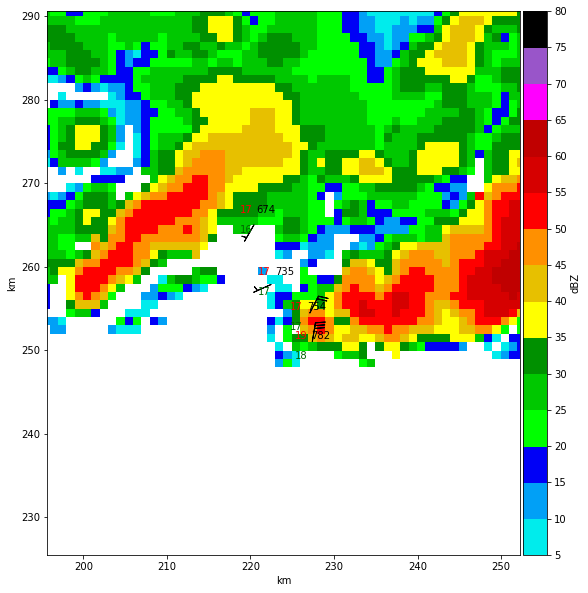

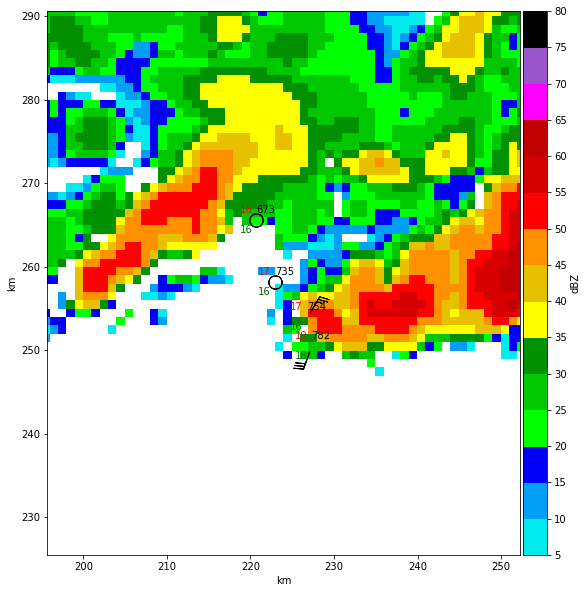

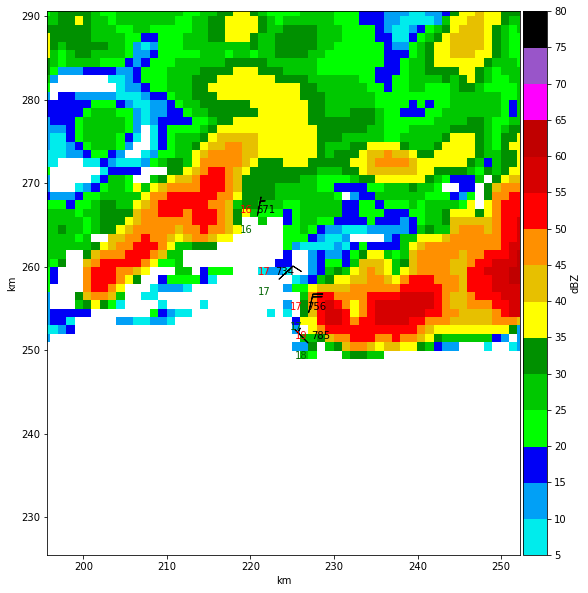

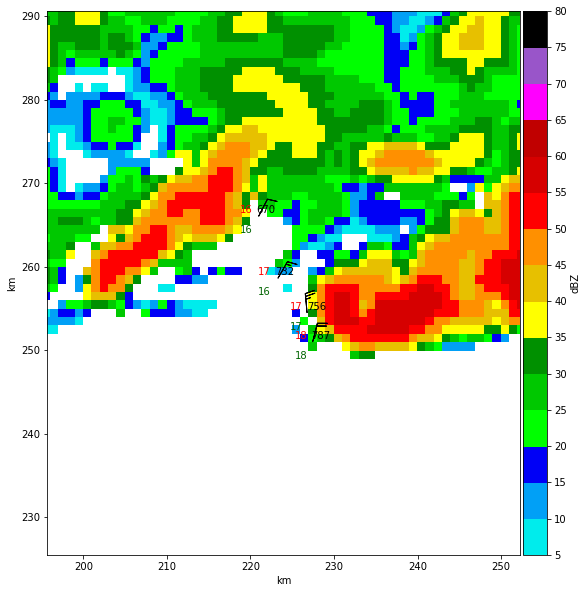

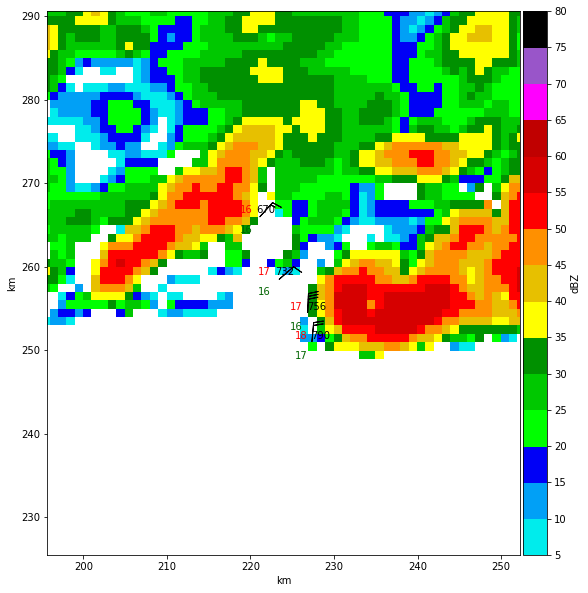

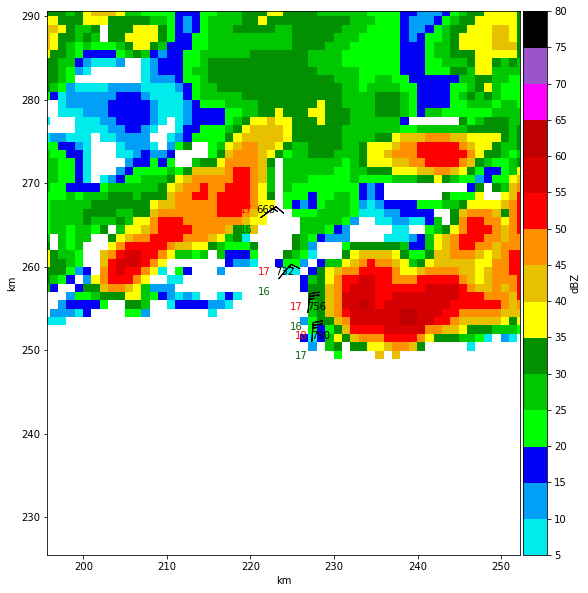

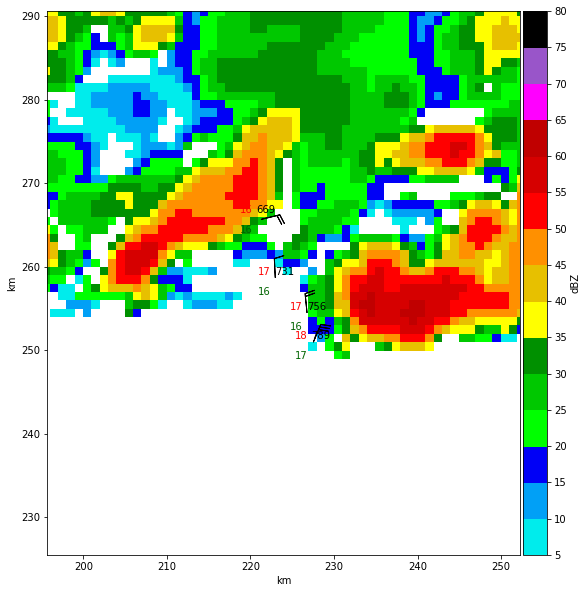

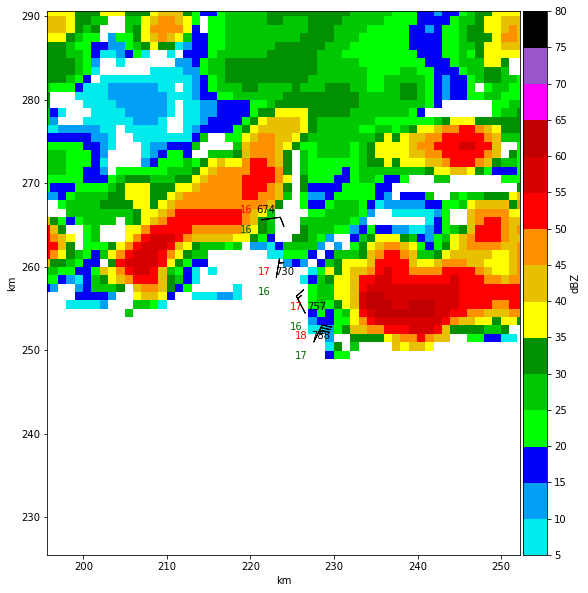

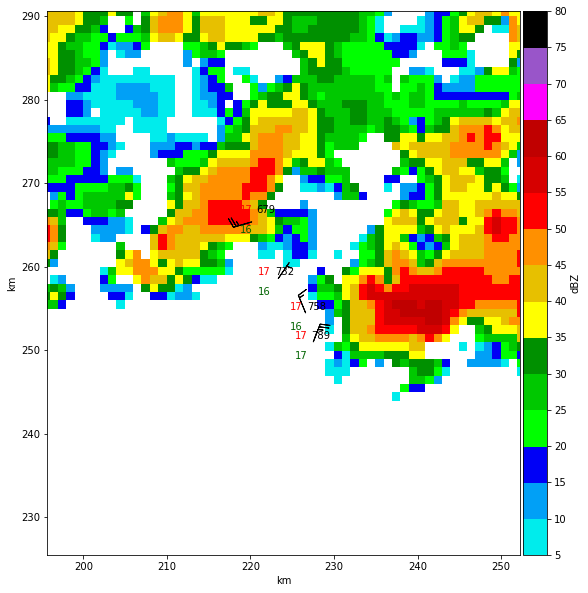

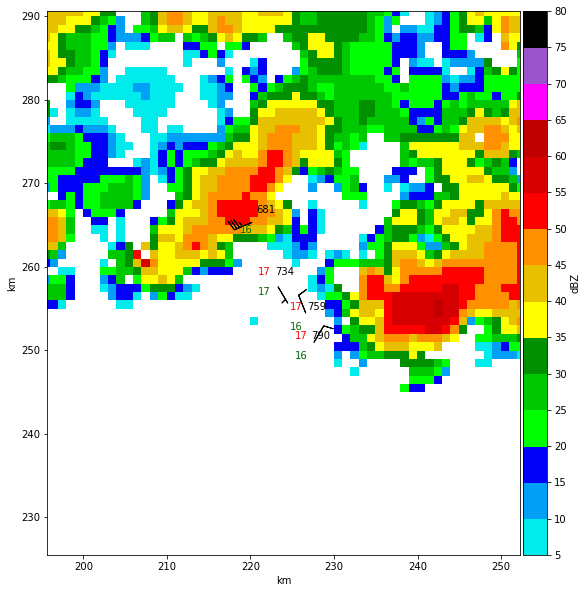

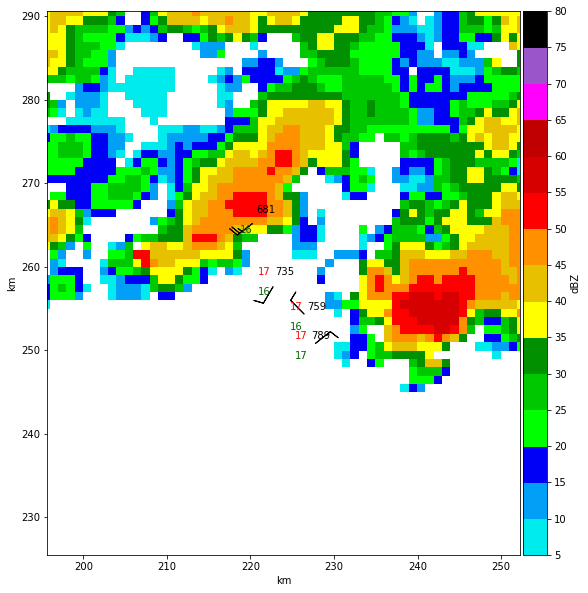

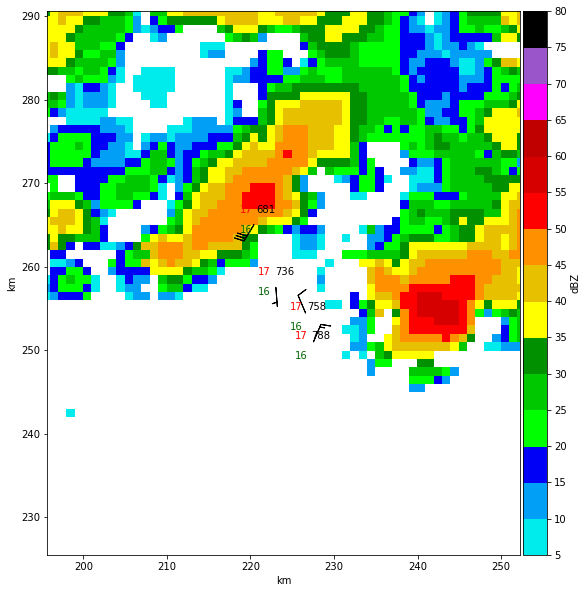

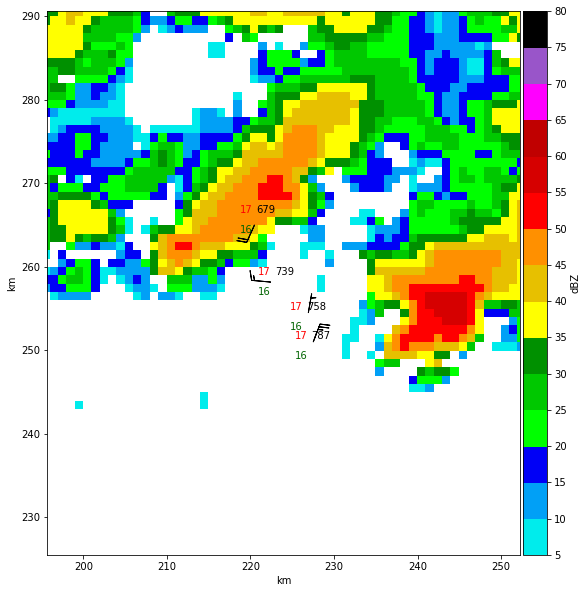

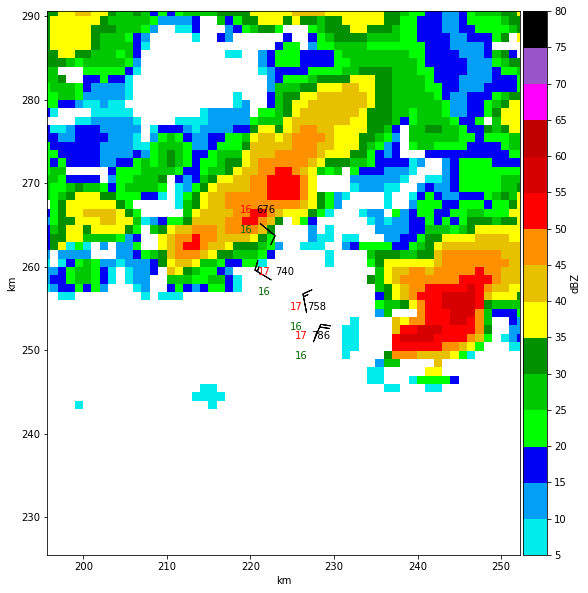

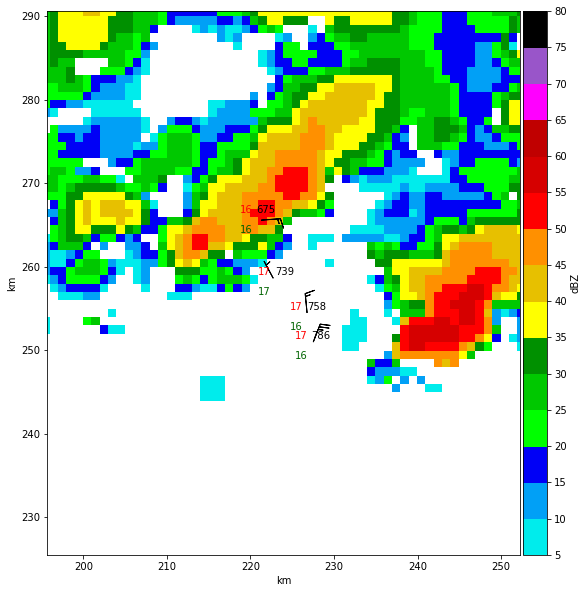

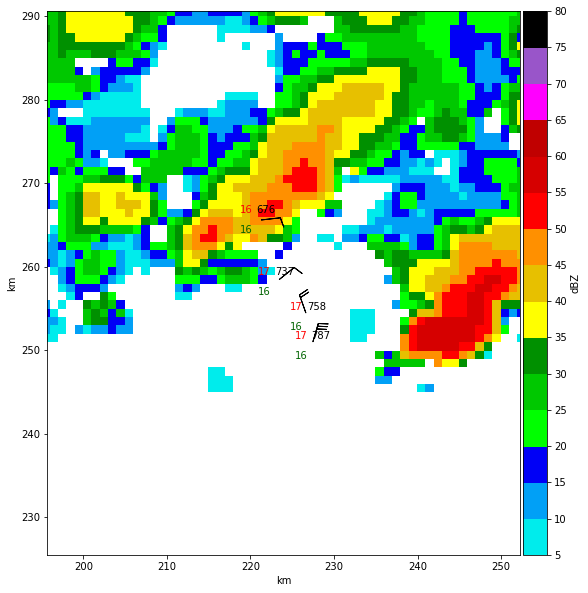

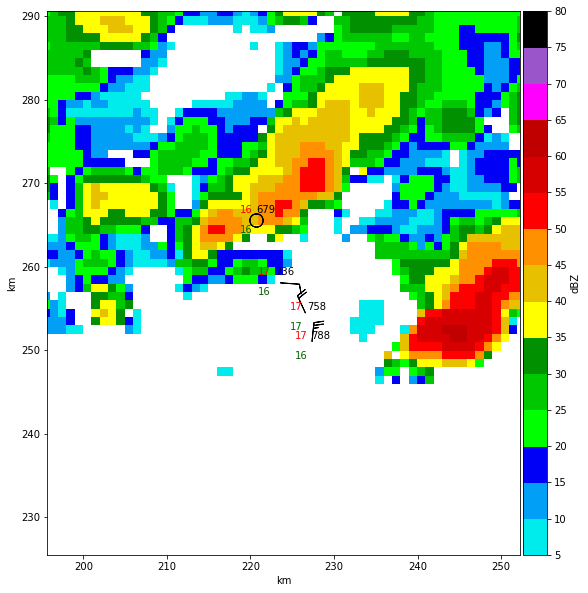

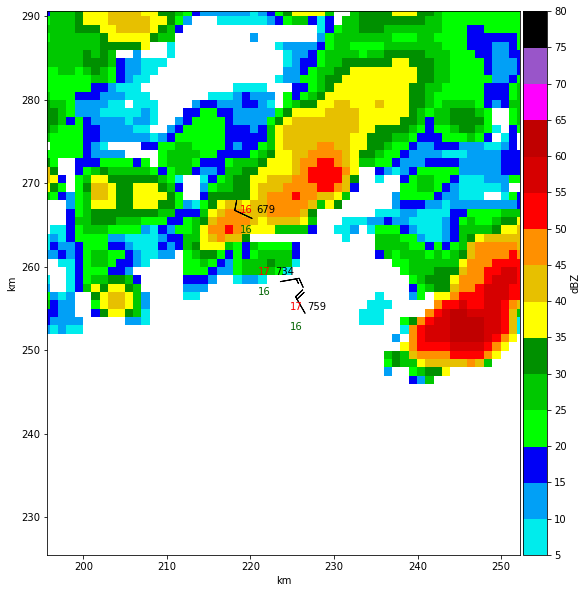

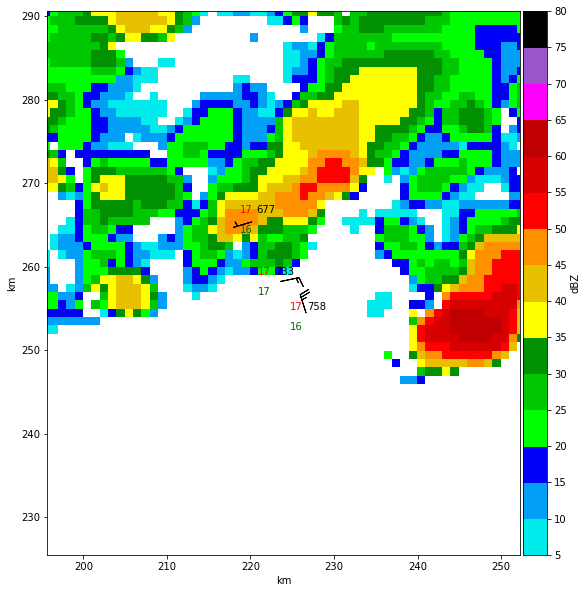

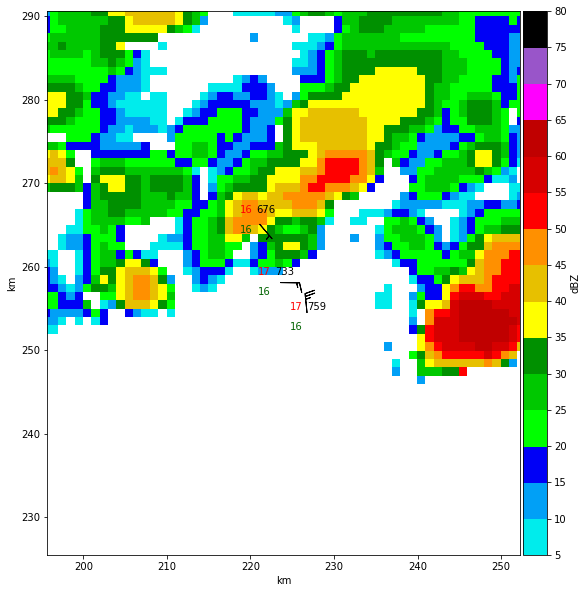

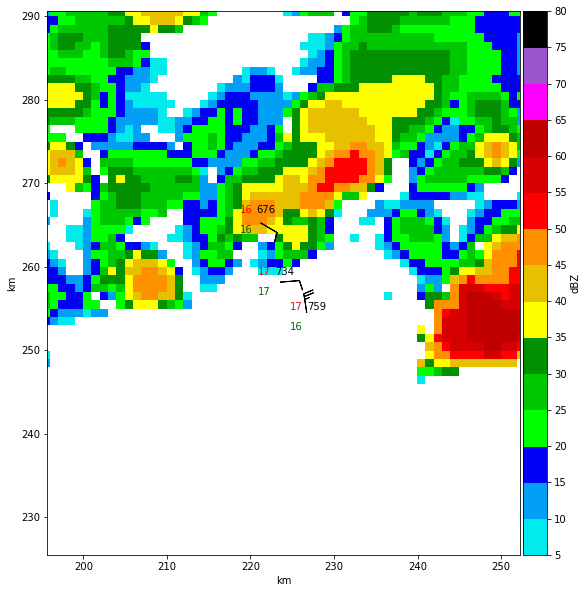

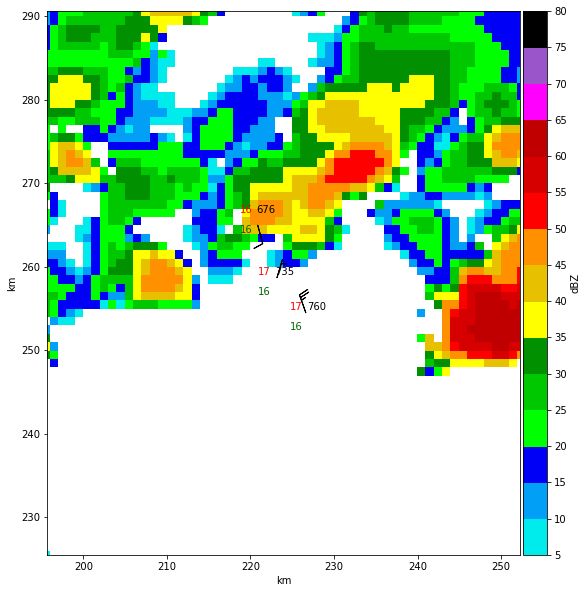

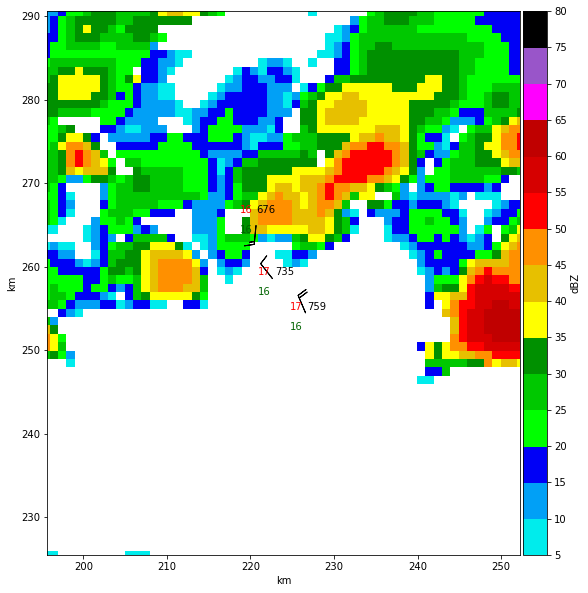

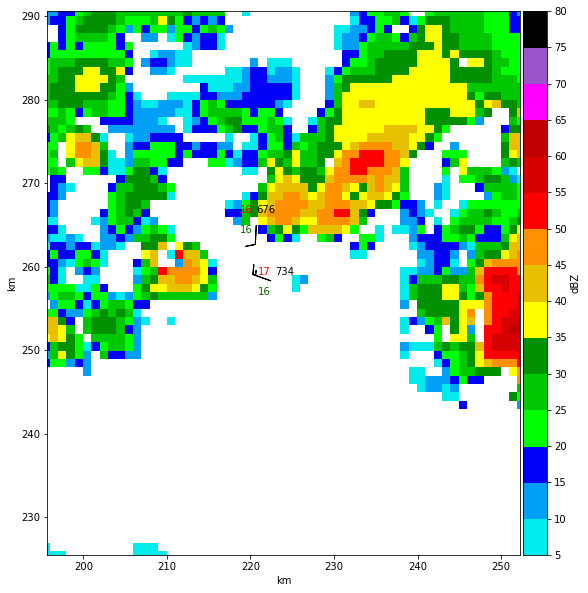

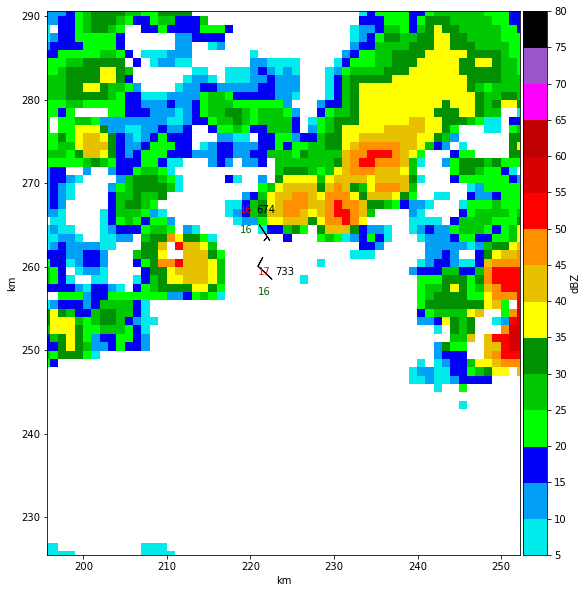

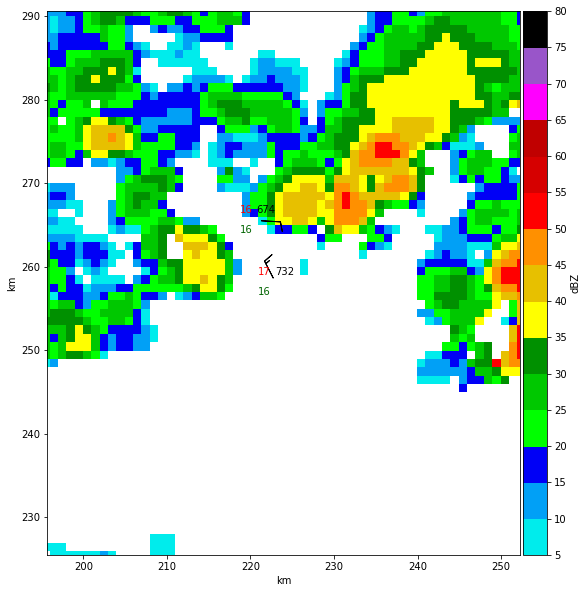

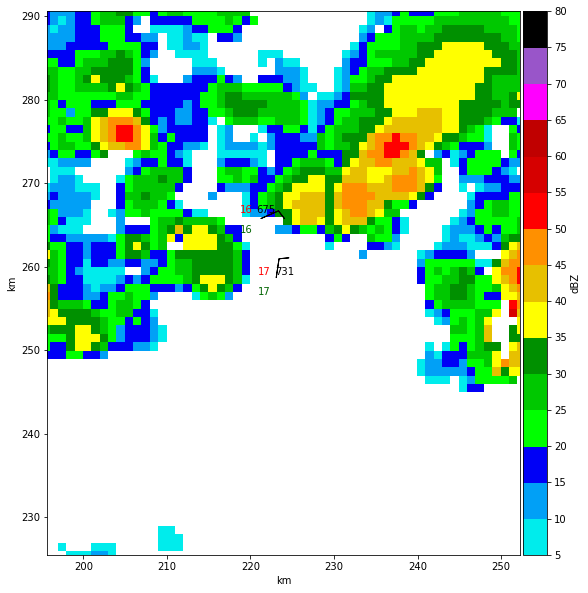

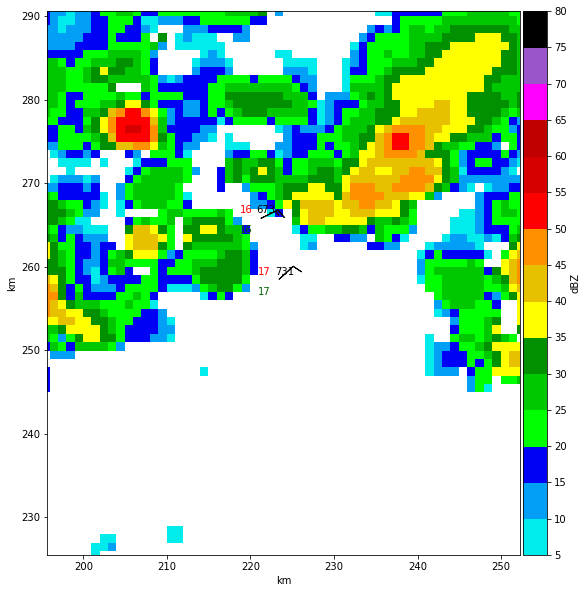

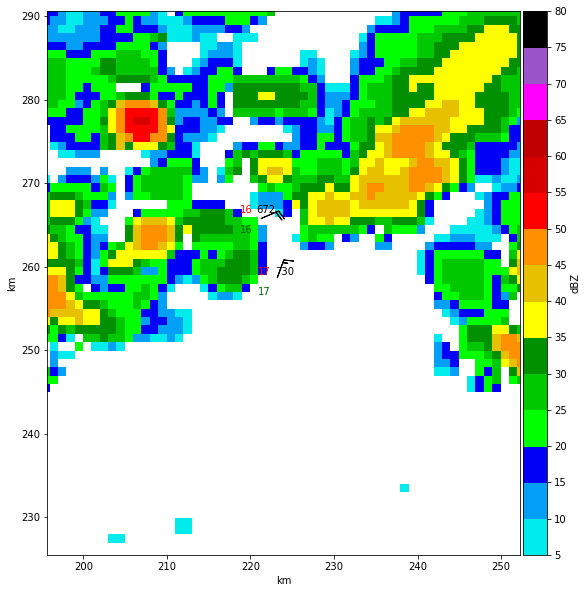

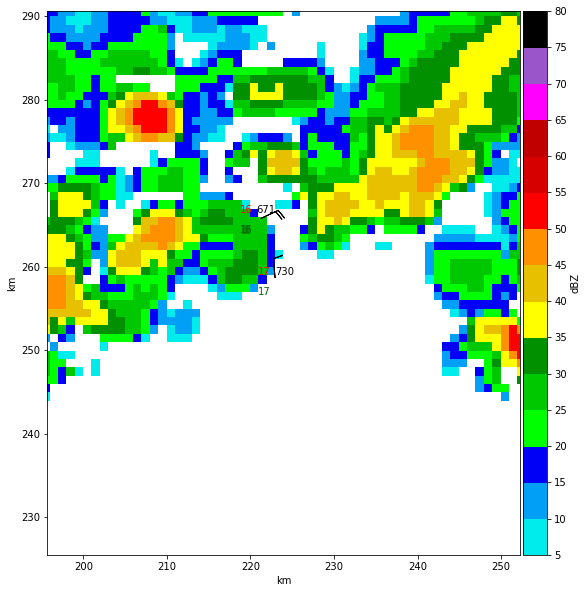

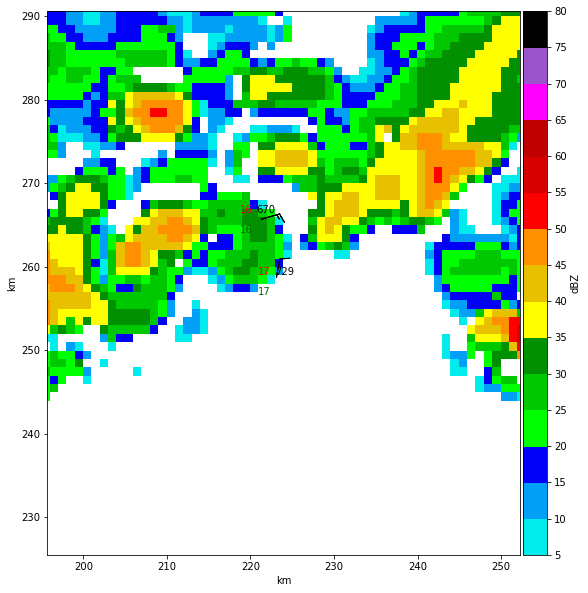

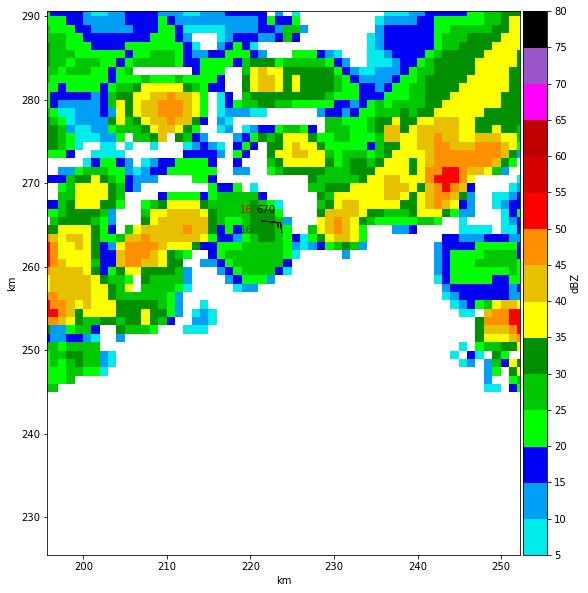

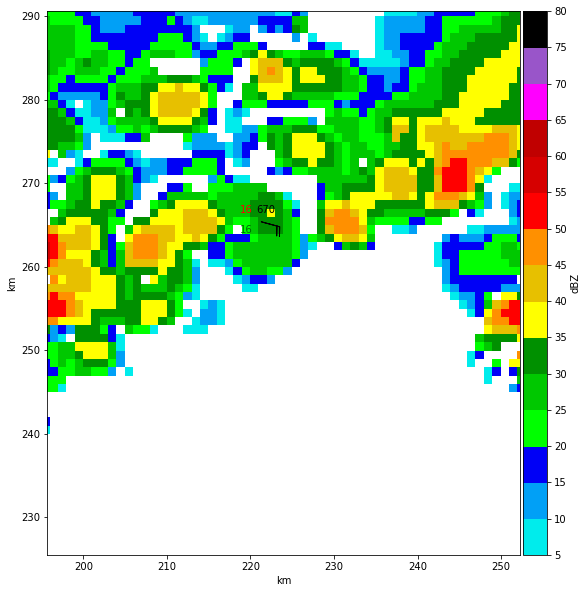

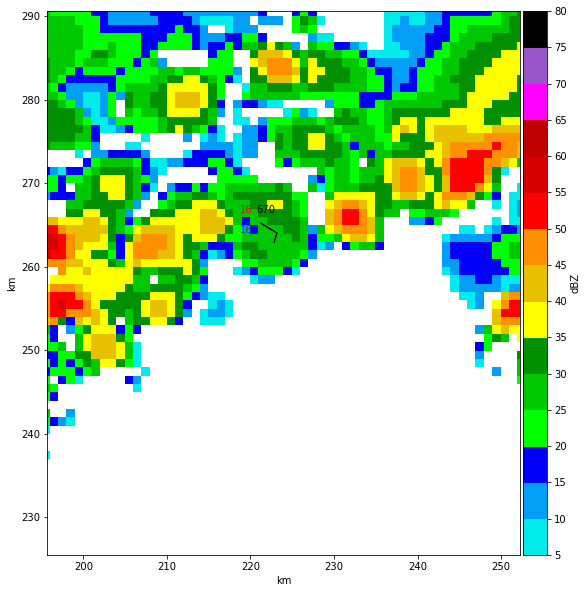

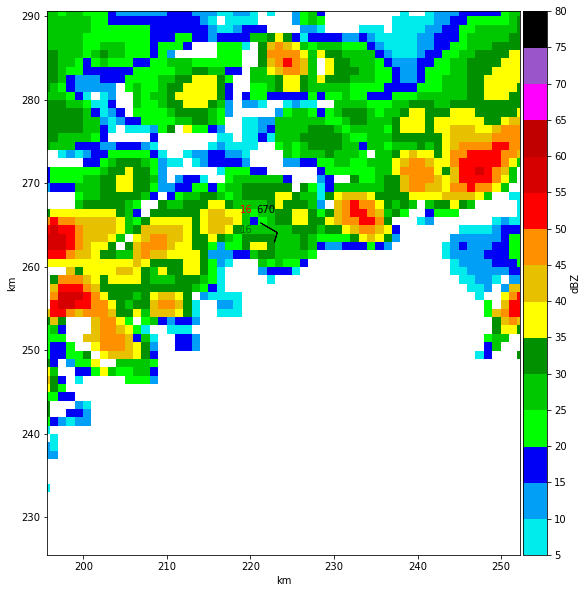

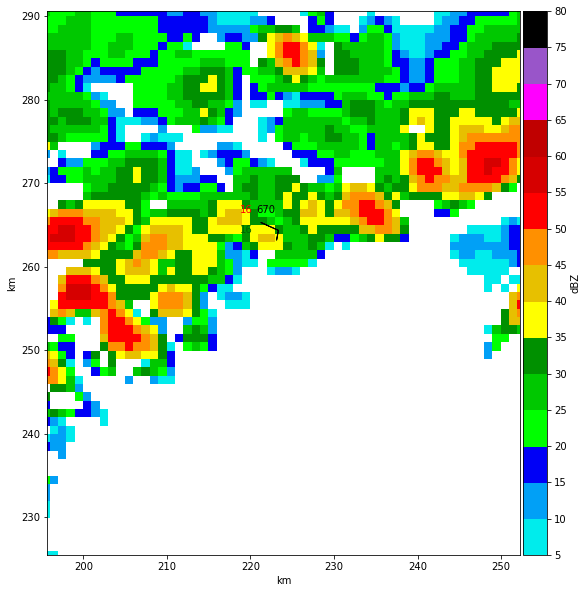

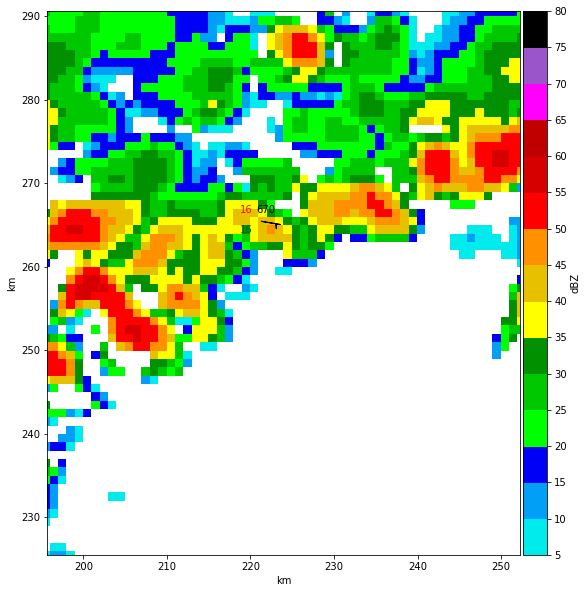

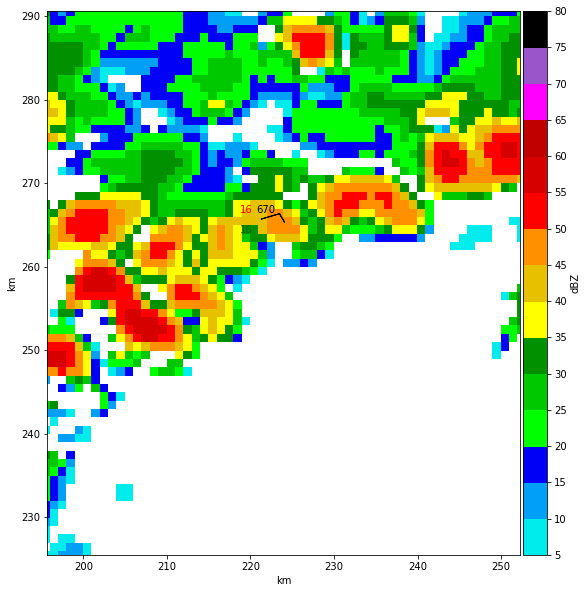

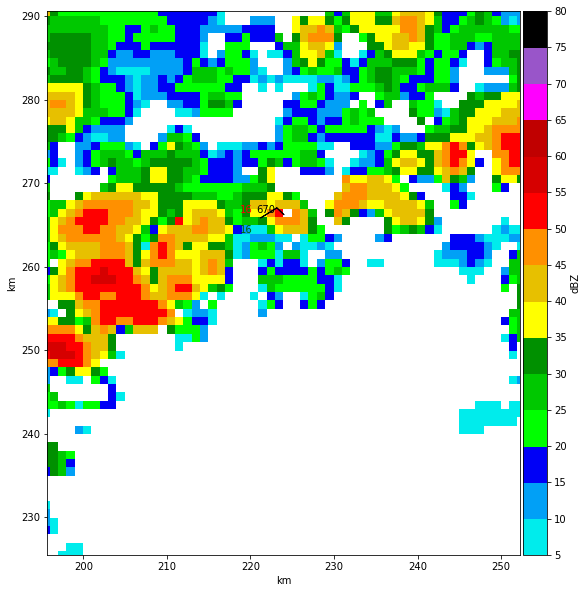

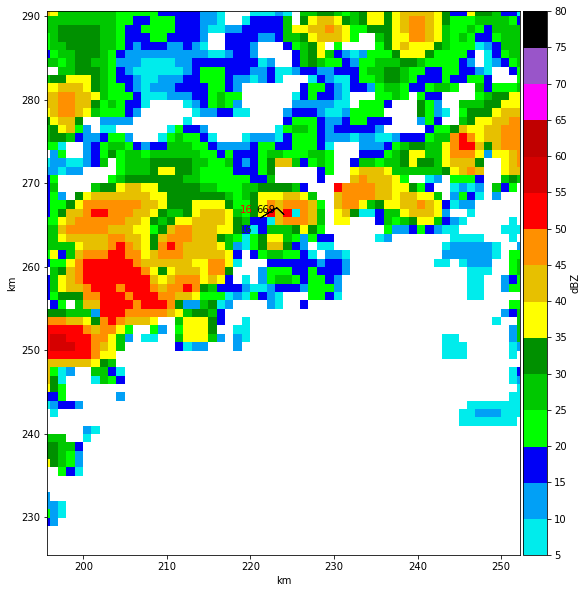

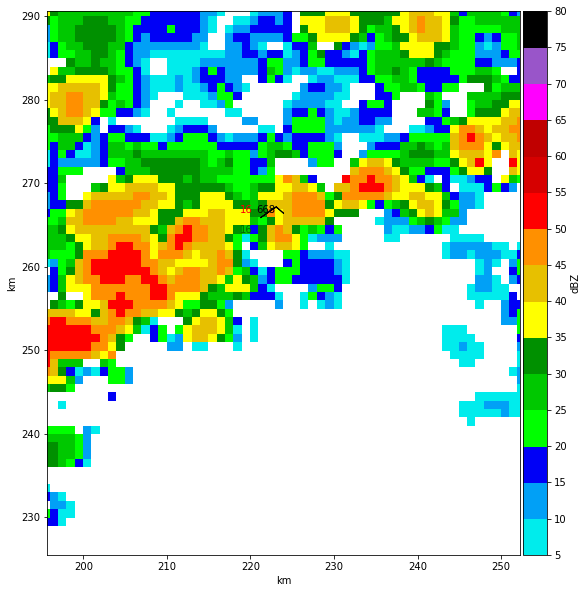

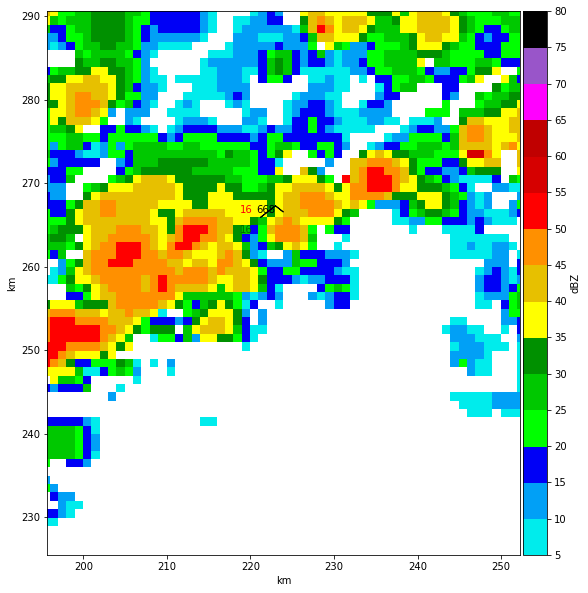

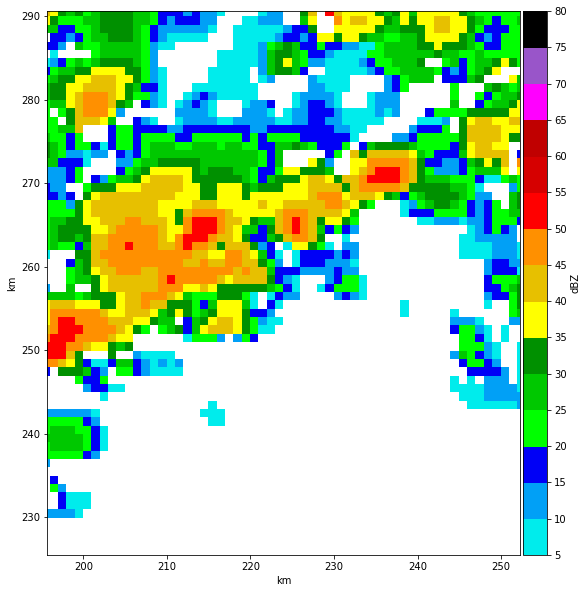

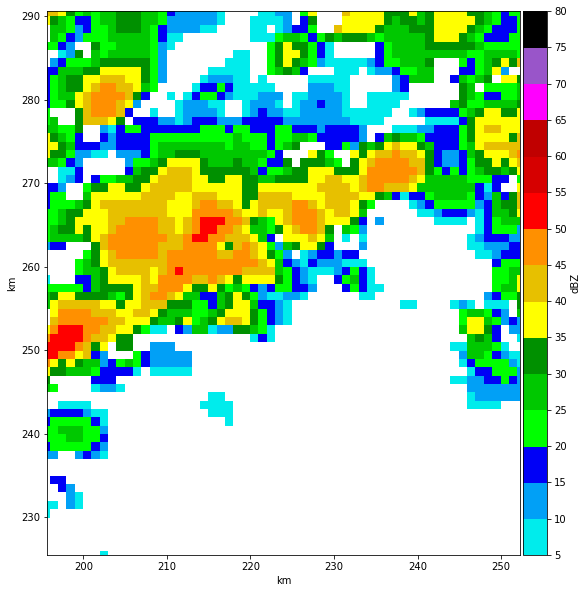

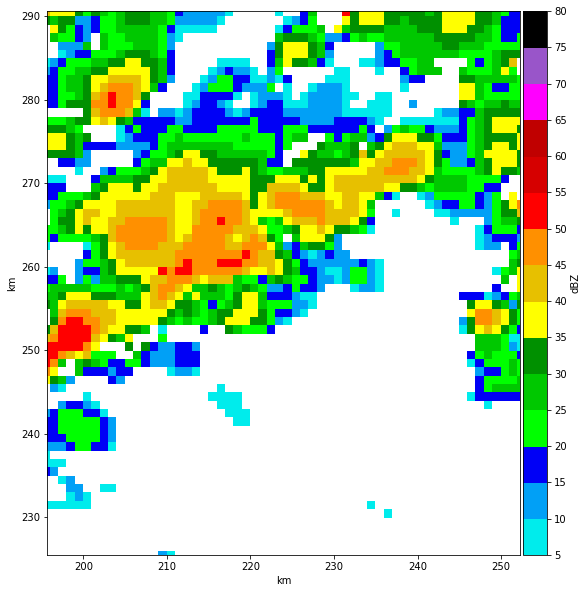

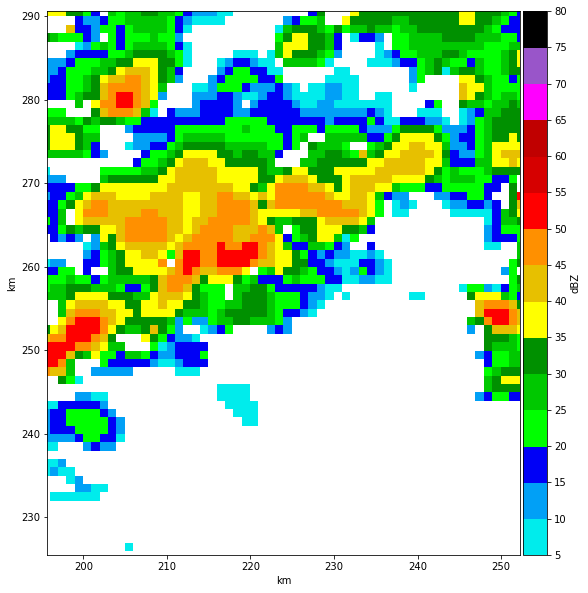

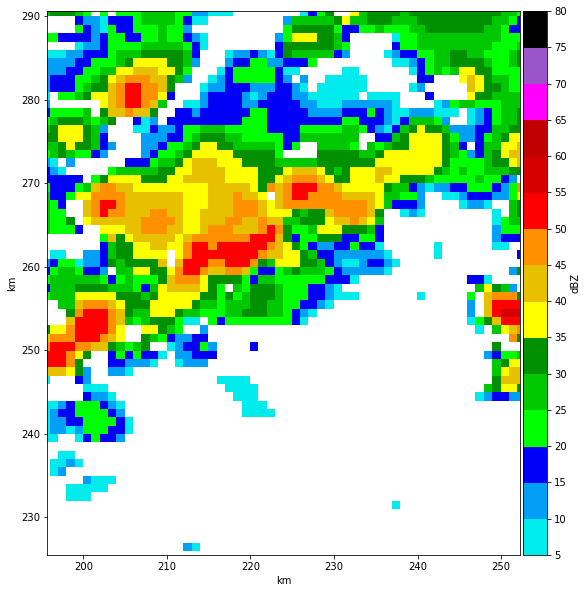

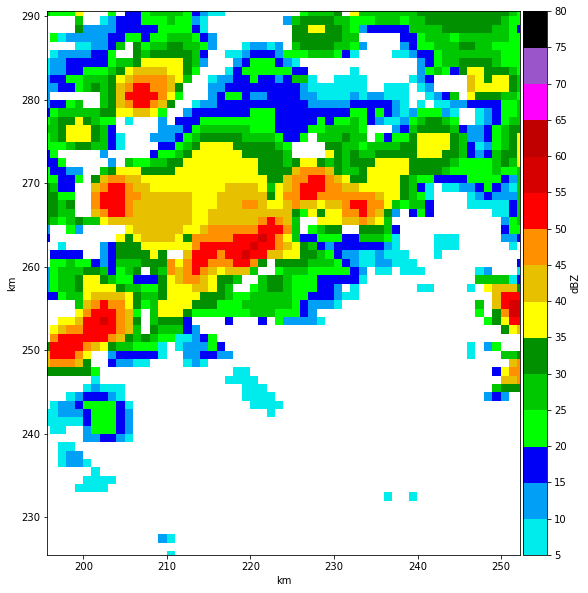

In [8]:
# Plot the PIPS station models on the ARPS model grid, similar to what was done with the radar sweep files
dilist = [i[0] for i in dis_dict['dmodcrdlist']]
djlist = [i[1] for i in dis_dict['dmodcrdlist']]

print(dilist)
print(djlist)

dxlist = [i[0] for i in dis_dict['dmodloclist']]
dylist = [i[1] for i in dis_dict['dmodloclist']]

print(dxlist)
print(dylist)

xc = grid_dict['xs']
yc = grid_dict['ys']
xe = grid_dict['x']
ye = grid_dict['y']

xckm = xc / 1000.
yckm = yc / 1000.
xekm = xe / 1000.
yekm = ye / 1000.

# Set plotting limits to center on the disdrometer locations 

Dxmin = min(dxlist)
Dxmax = max(dxlist)
Dymin = min(dylist)
Dymax = max(dylist)
plotlims = [Dxmin - 25000., Dxmax + 25000., Dymin - 25000., Dymax + 25000.]

ibgn = np.searchsorted(xc, plotlims[0])
iend = np.searchsorted(xc, plotlims[1]) + 1
jbgn = np.searchsorted(yc, plotlims[2])
jend = np.searchsorted(yc, plotlims[3]) + 1

print(plotlims)
print(ibgn, iend, jbgn, jend)

plotvar_dict = {
    'xcplt': xckm,
    'ycplt': yckm,
    'xeplt': xekm,
    'yeplt': yekm,
}

plotparam_dict = {
    'cmap': pyPIPSradar.cmapdBZ,
    'fieldlevels': np.arange(5.0, 85.0, 5.0),
    'clvls': matplotlib.ticker.MultipleLocator(base=5.0),
    'clabel': r'dBZ',
    'cformat': None,
}

plotparam_dict['norm'] = matplotlib.colors.BoundaryNorm(plotparam_dict['fieldlevels'], 
                                                        plotparam_dict['cmap'].N)

axesparam_dict = {
    'axis_ticks': (10000., 10000.),
    'axis_names': ('x', 'y')
}

plotlim_dict = {
    'x': (plotlims[0], plotlims[1]),
    'y': (plotlims[2], plotlims[3])
}

plotvar_name = 'dBZmod'


dis_dict_at_model = sim.read_convdata_at_modeltimes(init_dis_dict, model_dict)

# Extract stuff from disdrometer dictionary
templist = dis_dict_at_model['convdata_at_modeltimes']['temp']
dewpointlist = dis_dict_at_model['convdata_at_modeltimes']['dewpoint']
pressurelist = dis_dict_at_model['convdata_at_modeltimes']['pressure']
windspdavgveclist = dis_dict_at_model['convdata_at_modeltimes']['windspdavgvec']
winddiravgveclist = dis_dict_at_model['convdata_at_modeltimes']['winddiravgvec']

print(templist)

for i, time in enumerate(model_trange_sec):
    print("Loading time ", time) 
    filepath = arps_read.get_file_path(member_absdir, member_prefix, fileformat, time=time, filetype='history')
    print(filepath)
    
    var_read_dict = {}
    var_read_dict = pycaps_fields.get_fields(var_read_dict, field_names=[plotvar_name], path_grdbas=grdbas_path, 
                                             path_hdf=filepath, ibgn=ibgn, jbgn=jbgn, iend=iend, jend=jend, 
                                             klvls=[2], multipatch=True, grid_dict=grid_dict, 
                                             ignore_existing_vars=True)
    
    plotvar_dict = plotmod.init_plotvar_dict(plotvar_name, var_read_dict[plotvar_name], 0, 1, grid_dict)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    fig, ax = plotmod.plot2D(fig, ax, 'pcolor', plotvar_dict, plotparam_dict)
    
    plotmod.set_plot_axes(ax, plotlim_dict, axesparam_dict)

    for j, Dx, Dy in zip(range(len(dxlist)), dxlist, dylist):
        stationplot = StationPlot(ax, [Dx], [Dy])
        stationplot.plot_parameter('NW', [templist[j][i]], color='red')
        stationplot.plot_parameter('SW', [dewpointlist[j][i]], color='darkgreen')
        stationplot.plot_parameter('NE', [pressurelist[j][i]], formatter=lambda v: format(10 * v, '.0f')[-3:])
        u, v = get_wind_components([windspdavgveclist[j][i]] * units('m/s'), [winddiravgveclist[j][i]] * units.degree)
        stationplot.plot_barb(u, v, barb_increments=dict(half=0.5, full=1.0, flag=5.0))
    
    figname = 'PIPS_station_model_{}.png'.format(model_datetime_range[i].strftime('%Y%m%d%H%M%S'))
    figpath = os.path.join(plotdir, figname)
    plt.savefig(figpath, dpi=300, bbox_inches='tight') 
    
# figlist, gridlist = pyPIPSradar.plotsweep_pyART(radlims, plotlims, outfieldnames, radarsweeplist[i], ovrmap, 
#                                                     ovrdis, dis_name_list, dxy_list, fields_D_list)
#     ax = gridlist[0][0]
    
#     for j, Dx, Dy in zip(range(len(dxlist)), dxlist, dylist):
#         stationplot = StationPlot(ax, [Dx], [Dy])
#         stationplot.plot_parameter('NW', [templist[j][i]], color='red')
#         stationplot.plot_parameter('SW', [dewpointlist[j][i]], color='darkgreen')
#         stationplot.plot_parameter('NE', [pressurelist[j][i]], formatter=lambda v: format(10 * v, '.0f')[-3:])
#         u, v = get_wind_components([windspdavgveclist[j][i]] * units('m/s'), [winddiravgveclist[j][i]] * units.degree)
#         stationplot.plot_barb(u, v, barb_increments=dict(half=0.5, full=1.0, flag=5.0))

#     figlist[0].canvas.draw()
#     figlist[0].set_size_inches(10., 10., forward = True)
#     figname = 'PIPS_station_{}.png'.format(sweeptime.strftime('%Y%m%d%H%M%S'))
#     figpath = os.path.join(plotdir, figname)
#     plt.savefig(figpath, dpi=300, bbox_inches='tight')

In [37]:
import pyPIPS.io as pips_io
# Read in PIPS data

print(dis_dict.keys())

dis_dir = dis_dict['dis_dir']
dis_filenames = dis_dict['disfilenames']
dis_names = dis_dict['dis_names']

conv_df_dict = {}
parsivel_df_dict = {}
vd_matrix_da_dict = {}

for dis_filename, dis_name in zip(dis_filenames, dis_names):
    dis_filepath = os.path.join(dis_dir, dis_filename)
    print("Reading {}".format(dis_filepath))
    conv_df, parsivel_df, vd_matrix_da = pips_io.read_PIPS(dis_filepath, starttimestamp=timestamp_start,
                                                           stoptimestamp=timestamp_stop)
    # Calculate some additional thermodynamic quantities and add to the conventional data DataFrame
    conv_df = pips.calc_thermo(conv_df)
    conv_df_dict[dis_name] = conv_df
    parsivel_df_dict[dis_name] = parsivel_df
    vd_matrix_da_dict[dis_name] = vd_matrix_da

dict_keys(['dis_dir', 'dis_types', 'dis_names', 'disfilenames', 'convfilenames', 'starttimes', 'stoptimes', 'interval', 'convdata_at_sweeptimes', 'dgeoloclist', 'dradloclist', 'dmodloclist', 'dmodcrdlist', 'convdata_at_modeltimes'])
Reading /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/PIPS/processed/IOP3/PIPS_1A_IOP_3_D1.txt
GPS time: Thu Mar 31 22:12:03 2016, Logger time: Thu Mar 31 22:12:00 2016
GPS Offset: 0:00:03
Reading /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/PIPS/processed/IOP3/PIPS_1B_IOP_3_D1.txt
GPS time: Thu Mar 31 22:01:33 2016, Logger time: Thu Mar 31 22:01:30 2016
GPS Offset: 0:00:03
Reading /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/PIPS/processed/IOP3/PIPS_2A_IOP_3_D1.txt
GPS time: Thu Mar 31 22:25:03 2016, Logger time: Thu Mar 31 22:25:00 2016
GPS Offset: 0:00:03
Reading /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/PIPS/processed/IOP3/PIPS_2B_IOP_3_D1.txt
GPS t

In [42]:
# Resample PIPS data to a 60-s interval
conv_rs_df_dict = {}
parsivel_rs_df_dict = {}
vd_matrix_rs_da_dict = {}
for dis_name in dis_names:
    # Conventional data
    conv_df = conv_df_dict[dis_name]
    datetime_range_onesec = conv_df.index.to_pydatetime()
    sec_offset = pips.get_offset_seconds(datetime_range_onesec)
    conv_rs_df_dict[dis_name] = pips.resample_conv('PIPS', 60., sec_offset, conv_df)
    
    # Parsivel 10-s derived fields
    parsivel_df = parsivel_df_dict[dis_name]
    datetime_range_tensec = parsivel_df.index.to_pydatetime()
    sec_offset = pips.get_offset_seconds(datetime_range_tensec)
    print(sec_offset)
    parsivel_rs_df_dict[dis_name] = pips.resample_parsivel(60., parsivel_df)
    
    # Parsivel V-D matrix
    vd_matrix_da = vd_matrix_da_dict[dis_name]
    vd_matrix_rs_da_dict[dis_name] = pips.resample_vd_matrix(60., vd_matrix_da)

53
13
53
3


/Users/dawson29/Projects/pyPIPS/pyPIPS/PIPS.py:265: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  'hailflag': np.any}).fillna(0)


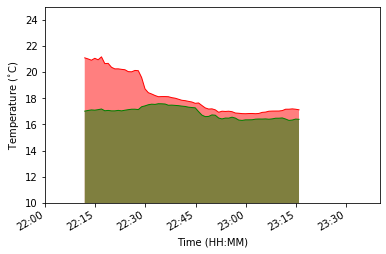

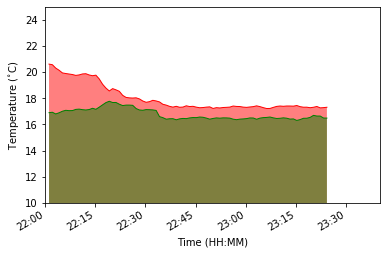

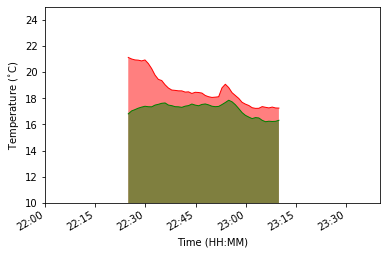

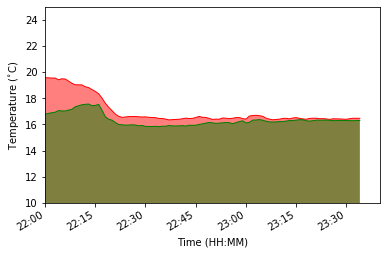

In [39]:
dateformat = '%H:%M' 
formatter = dates.DateFormatter(dateformat)
locator = dates.MinuteLocator(byminute=[0, 15, 30, 45])
minorlocator = None
timelabel = 'Time (HH:MM)'
xaxislimits = [dates.date2num(datetime_range[0]), dates.date2num(datetime_range[-1])]
meteo_T_Td_range = [10., 25.]

for i, dis_name in enumerate(dis_names):
    conv_rs_df = conv_rs_df_dict[dis_name]
    datetimes_PIPS_conv = conv_rs_df.index.to_pydatetime()
    plottimes = dates.date2num(datetimes_PIPS_conv)
    T_PIPS = conv_rs_df['fasttemp']
    Td_PIPS = conv_rs_df['dewpoint']
   
    fig, ax = plt.subplots()
    fields = [T_PIPS, Td_PIPS]
    fieldparamdicts = [PIPSplot.temp_params, PIPSplot.dewpoint_params]
    ax = PIPSplot.plotmeteogram(ax, [plottimes], fields, fieldparamdicts)
    axparamdict1 = {'majorxlocator': locator, 'majorxformatter': formatter,
                    'minorxlocator': minorlocator, 'axeslimits': [xaxislimits, meteo_T_Td_range],
                    'axeslabels': [timelabel, r'Temperature ($^{\circ}$C)']}
    axparamdicts = [axparamdict1]
    ax, = PIPSplot.set_meteogram_axes([ax], axparamdicts)
    #ax.plot(trange, T_model[:, i], color = 'r')
    #ax.set_xlim(tstart, tstop)
    #ax.set_ylim(15.0, 30.0)

In [21]:
# Read in needed fields from the ARPS history dumps
# Just for one member now. Later will parallelize this and put it in a script.
# and interpolate them to the PIPS locations, building up a time series.
print(ibgn, iend, jbgn, jend)
print(model_dict.keys())

vardict_list = []

varnames = ['p', 'pt', 'qv', 'u', 'v', 'qr', 'nr', 'zr']

for time in model_dict['trange']:
    print("Loading time ", time) 
    filepath = arps_read.get_file_path(member_absdir, member_prefix, fileformat, time=time, filetype='history')
    vardict = arps_read.read_hdfvars(filepath, varnames, ibgn=ibgn, jbgn=jbgn, iend=iend, jend=jend,
                                     klvls=[1])
    vardict_list.append(vardict)

#     #
    
#     p = vardict['p']
#     pt = vardict['pt']
#     qv = vardict['qv']
    
#     p_atPIPS = ndimage.map_coordinates(p[..., 1], coord_array, order=1)
#     pt_atPIPS = ndimage.map_coordinates(pt[..., 1], coord_array, order=1)
#     qv_atPIPS = ndimage.map_coordinates(qv[..., 1], coord_array, order=1)
    
# #     print p_atPIPS
# #     print pt_atPIPS
# #     print qv_atPIPS
    
#     T_atPIPS = thermo.calT(p_atPIPS, pt_atPIPS)-273.15
#     Td_atPIPS = thermo.calTd(p_atPIPS, qv_atPIPS)-273.15
#     pte_atPIPS = thermo.calpte(p_atPIPS, pt_atPIPS, qv_atPIPS)
    
#     #print T_atPIPS
    
#     T_model.append(T_atPIPS)
#     Td_model.append(Td_atPIPS)
#     pte_model.append(pte_atPIPS)

197 254 226 293
dict_keys(['runname', 'nens', 'fileformat', 'microphys', 'model_dt', 'model_dt_mean', 'basedirname', 'timestamp_model_init', 'timestamp_model_start', 'timestamp_model_stop', 'trange_member', 'trange_mean', 'datetime_range_member', 'datetime_range_mean', 'trange', 'datetime_range'])
Loading time  14400.0
Loading time  14460.0
Loading time  14520.0
Loading time  14580.0
Loading time  14640.0
Loading time  14700.0
Loading time  14760.0
Loading time  14820.0
Loading time  14880.0
Loading time  14940.0
Loading time  15000.0
Loading time  15060.0
Loading time  15120.0
Loading time  15180.0
Loading time  15240.0
Loading time  15300.0
Loading time  15360.0
Loading time  15420.0
Loading time  15480.0
Loading time  15540.0
Loading time  15600.0
Loading time  15660.0
Loading time  15720.0
Loading time  15780.0
Loading time  15840.0
Loading time  15900.0
Loading time  15960.0
Loading time  16020.0
Loading time  16080.0
Loading time  16140.0
Loading time  16200.0
Loading time  16260

In [210]:
# Create an xarray Dataset out of the dictionary of variables read in from the model over the time range
import pyPIPS.parsivel_params as pp
import xarray as xr

xc_patch = xc[ibgn:iend+1]
yc_patch = yc[jbgn:jend+1]
coord_dict = {'time': model_dict['datetime_range'],
              'yc': ('yc', yc_patch),
              'xc': ('xc', xc_patch)}
# First, create a dict of lists out of the above list of dicts
vardict_combined = CRMutils.make_dict_of_lists(vardict_list)
# Set things up for creating the xr Dataset
for varname, var in vardict_combined.items():
    var_arr = np.array(var).T.squeeze()
    var_arr = np.rollaxis(var_arr, 2, 0)
    # Trim variables down to just the patch we want to work with
    var_arr_patch = var_arr[:, jbgn:jend+1, ibgn:iend+1]
    vardict_combined[varname] = (['time', 'yc', 'xc'], var_arr_patch)
    
# Create an xarray Dataset out of the variable dictionary
var_ds = xr.Dataset(vardict_combined, coords=coord_dict)

# Compute raw model DSD paramters and add them to the model Dataset
rhor = 1000.
cr = np.pi / 6. * rhor
var_ds['rho'] = thermo.calrho(var_ds['p'], var_ds['pt'], var_ds['qv'])

# Shape parameter
var_ds['alphar'] = dsd.solve_alpha(var_ds['rho'], cr, var_ds['qr'], var_ds['nr'], var_ds['zr'])
# var_ds['alphar'] = var_ds['alphar'].interpolate_na()
# Intercept parameter
var_ds['N0r'] = dsd.calc_N0_gamma(var_ds['rho'], var_ds['qr'], var_ds['nr'], cr, var_ds['alphar'])
# Slope parameter
var_ds['lamdar'] = dsd.calc_lamda_gamma(var_ds['rho'], var_ds['qr'], var_ds['nr'], cr, var_ds['alphar'])

# Try computing ND and logND here

mid_diameters_da = vd_matrix_da_dict['PIPS1A']['diameter']
# Broadcast DSD parameter DataArrays to get everyone on the same dimensional page
mid_diameters_da, N0r_model_da, lamdar_model_da, alphar_model_da = \
    xr.broadcast(mid_diameters_da, var_ds['N0r'], var_ds['lamdar'] , var_ds['alphar'])

# Transpose these DataArrays to get time as the first dimension
mid_diameters_da = mid_diameters_da.transpose('time', 'diameter_bin', 'yc', 'xc')
N0r_model_da = N0r_model_da.transpose('time', 'diameter_bin', 'yc', 'xc')
lamdar_model_da = lamdar_model_da.transpose('time', 'diameter_bin', 'yc', 'xc')
alphar_model_da = alphar_model_da.transpose('time', 'diameter_bin', 'yc', 'xc')

ND_model = dsd.calc_binned_DSD_from_params(N0r_model_da, lamdar_model_da, alphar_model_da, mid_diameters_da)
ND_model = ND_model.fillna(0.0)
logND_model = np.log10(ND_model)
logND_model = logND_model.where(logND_model > -np.inf)
#logND_model = logND_model.fillna(0.0)
#logND_model = logND_model.where(logND_model > -1.0)

var_ds['ND'] = ND_model
var_ds['logND'] = logND_model

var_ds

# ND_model_raw_PIPS_modeltimes_dict = {}
# logND_model_raw_PIPS_modeltimes_dict = {}
# for i, dis_name in enumerate(dis_names):
#     mid_diameters_da = vd_matrix_da_dict[dis_name]['diameter']
#     alphar_model_PIPS_da = model_gamma_DSD_params_PIPS_modeltimes_dict[dis_name]['alphar']
#     N0r_model_PIPS_da = model_gamma_DSD_params_PIPS_modeltimes_dict[dis_name]['N0r']
#     lamdar_model_PIPS_da = model_gamma_DSD_params_PIPS_modeltimes_dict[dis_name]['lamdar']
#     print(alphar_model_PIPS_da)
#     # Broadcast DSD parameter DataArrays to get everyone on the same dimensional page
#     mid_diameters_da, N0r_model_PIPS_da, lamdar_model_PIPS_da, alphar_model_PIPS_da = \
#         xr.broadcast(mid_diameters_da, N0r_model_PIPS_da, lamdar_model_PIPS_da, alphar_model_PIPS_da)
#     # Transpose these DataArrays to get time as the first dimension
#     mid_diameters_da = mid_diameters_da.T
#     N0r_model_PIPS_da = N0r_model_PIPS_da.T
#     lamdar_model_PIPS_da = lamdar_model_PIPS_da.T
#     alphar_model_PIPS_da = alphar_model_PIPS_da.T
    
#     ND_model_raw_PIPS = dsd.calc_binned_DSD_from_params(N0r_model_PIPS_da, lamdar_model_PIPS_da, 
#                                                         alphar_model_PIPS_da, mid_diameters_da)
#     logND_model_raw_PIPS = np.log10(ND_model_raw_PIPS)
#     logND_model_raw_PIPS = logND_model_raw_PIPS.where(logND_model_raw_PIPS > -1.0)
    
#     ND_model_raw_PIPS_modeltimes_dict[dis_name] = ND_model_raw_PIPS
#     logND_model_raw_PIPS_modeltimes_dict[dis_name] = logND_model_raw_PIPS


# var_ds
# 3D below
# zc = grid_dict['zs']
# zc = zc.T
# xc_patch = xc[ibgn:iend+1]
# yc_patch = yc[jbgn:jend+1]
# zc_patch = zc[:, jbgn:jend+1, ibgn:iend+1]
# # First, create a dict of lists out of the above list of dicts
# vardict_combined = CRMutils.make_dict_of_lists(vardict_list)
# # Set things up for creating the xr Dataset
# for varname, var in vardict_combined.items():
#     var_arr = np.rollaxis(np.array(var).T, 3, 0)
#     # Trim variables down to just the patch we want to work with
#     var_arr_patch = var_arr[:, :, jbgn:jend+1, ibgn:iend+1]
#     vardict_combined[varname] = (['time', 'z', 'yc', 'xc'], var_arr_patch)

# coord_dict = {'time': model_dict['datetime_range'],
#               'zc': (['z', 'yc', 'xc'], zc_patch),
#               'yc': ('yc', yc_patch),
#               'xc': ('xc', xc_patch)}
# # Create an xarray Dataset out of the variable dictionary
# var_ds = xr.Dataset(vardict_combined, coords=coord_dict)
# var_ds

/Users/dawson29/Projects/pyPIPS/pyPIPS/DSDlib.py:419: RuntimeWarning: divide by zero encountered in true_divide
  # Correction for fallspeeds at different pressures
/Users/dawson29/Projects/pyPIPS/pyPIPS/DSDlib.py:420: RuntimeWarning: invalid value encountered in multiply
  rho_ref = 1.225
/Users/dawson29/Projects/pyPIPS/pyPIPS/DSDlib.py:139: RuntimeWarning: invalid value encountered in true_divide
  lamda = np.where(rhoa * q > 0.0, lamda, 0.0)
/Users/dawson29/Projects/pyPIPS/pyPIPS/DSDlib.py:183: RuntimeWarning: invalid value encountered in greater_equal
  


<xarray.Dataset>
Dimensions:       (diameter_bin: 32, time: 101, xc: 58, yc: 68)
Coordinates:
  * time          (time) datetime64[ns] 2016-03-31T22:00:00 ... 2016-03-31T23:40:00
  * yc            (yc) float32 225500.0 226500.0 227500.0 ... 291500.0 292500.0
  * xc            (xc) float32 196500.0 197500.0 198500.0 ... 252500.0 253500.0
    diameter      (diameter_bin) float64 0.0625 0.1875 0.3125 ... 19.0 21.5 24.5
    min_diameter  (diameter_bin) float64 0.0 0.125 0.25 0.375 ... 18.0 20.0 23.0
    max_diameter  (diameter_bin) float64 0.125 0.25 0.375 0.5 ... 20.0 23.0 26.0
Dimensions without coordinates: diameter_bin
Data variables:
    p             (time, yc, xc) float32 97930.47 98024.266 ... 97110.15
    pt            (time, yc, xc) float32 298.58847 298.58032 ... 295.07828
    qv            (time, yc, xc) float32 0.01420391 0.013995735 ... 0.0121252
    u             (time, yc, xc) float32 0.7669227 0.54407734 ... 0.51853204
    v             (time, yc, xc) float32 4.488418 4.274

In [211]:
# Save Dataset to nc file
savedir = '/Users/dawson29/Dropbox/Projects/VORTEXSE/vortexse_enkf_dsd_study/nc'
if not os.path.exists(savedir):
    os.makedirs(savedir)
filename = "{}_fields.nc".format(member_prefix)
filepath = os.path.join(savedir, filename)
var_ds.to_netcdf(filepath)

In [162]:
print(dis_names)

['PIPS1A', 'PIPS1B', 'PIPS2A', 'PIPS2B']


In [212]:
x_coords = [a[0] for a in dis_dict['dmodloclist']]
y_coords = [a[1] for a in dis_dict['dmodloclist']]

x_coords_da = xr.DataArray(x_coords, coords=[dis_names], dims=['PIPS'])
y_coords_da = xr.DataArray(y_coords, coords=[dis_names], dims=['PIPS'])

var_ds_interp = var_ds.interpolate_na(dim='time')
var_ds_interp = var_ds_interp.interp(xc=x_coords_da, yc=y_coords_da)

print(var_ds_interp)

<xarray.Dataset>
Dimensions:       (PIPS: 4, diameter_bin: 32, time: 101)
Coordinates:
    min_diameter  (diameter_bin) float64 0.0 0.125 0.25 0.375 ... 18.0 20.0 23.0
    max_diameter  (diameter_bin) float64 0.125 0.25 0.375 0.5 ... 20.0 23.0 26.0
    diameter      (diameter_bin) float64 0.0625 0.1875 0.3125 ... 19.0 21.5 24.5
  * time          (time) datetime64[ns] 2016-03-31T22:00:00 ... 2016-03-31T23:40:00
    xc            (PIPS) float64 2.267e+05 2.229e+05 2.273e+05 2.207e+05
    yc            (PIPS) float64 2.539e+05 2.581e+05 2.505e+05 2.656e+05
  * PIPS          (PIPS) <U6 'PIPS1A' 'PIPS1B' 'PIPS2A' 'PIPS2B'
Dimensions without coordinates: diameter_bin
Data variables:
    p             (time, PIPS) float64 9.737e+04 9.71e+04 ... 9.75e+04 9.676e+04
    pt            (time, PIPS) float64 298.4 297.8 298.6 ... 297.2 297.4 295.1
    qv            (time, PIPS) float64 0.01345 0.01353 0.01274 ... 0.013 0.01175
    u             (time, PIPS) float64 -0.1856 0.3095 -0.09063 ... 0.4993

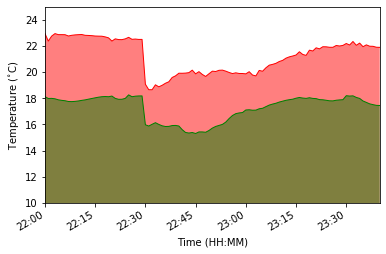

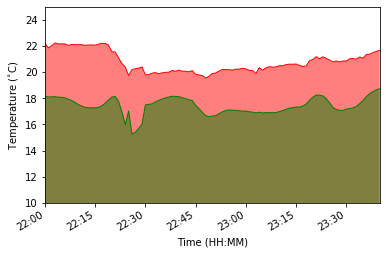

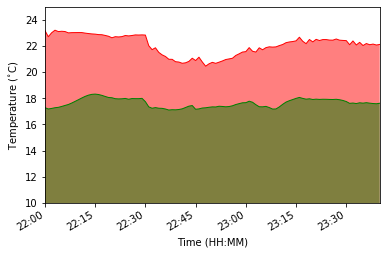

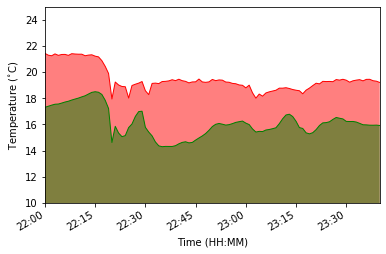

In [201]:
p_interp = var_ds_interp['p']
pt_interp = var_ds_interp['pt']
qv_interp = var_ds_interp['qv']

T_model_PIPS = thermo.calT(p_interp, pt_interp) - 273.15
Td_model_PIPS = thermo.calTd(p_interp, qv_interp) - 273.15


dateformat = '%H:%M' 
formatter = dates.DateFormatter(dateformat)
locator = dates.MinuteLocator(byminute=[0,15,30,45])
minorlocator = None
timelabel = 'Time (HH:MM)'
plottimes = dates.date2num(datetime_range)
xaxislimits = [plottimes[0], plottimes[-1]]
meteo_T_Td_range = [10., 25.]

for i, PIPSname in enumerate(dis_dict['dis_names']):
    #print i
    fig, ax = plt.subplots()
    T_model_PIPS_plt = T_model_PIPS.sel(PIPS=PIPSname)
    Td_model_PIPS_plt = Td_model_PIPS.sel(PIPS=PIPSname)
    fields = [T_model_PIPS_plt, Td_model_PIPS_plt]
    fieldparamdicts = [PIPSplot.temp_params, PIPSplot.dewpoint_params]
    ax = PIPSplot.plotmeteogram(ax, [plottimes], fields, fieldparamdicts)
    axparamdict1 = {'majorxlocator': locator, 'majorxformatter': formatter,
                    'minorxlocator': minorlocator, 'axeslimits': [xaxislimits, meteo_T_Td_range],
                    'axeslabels': [timelabel, r'Temperature ($^{\circ}$C)']}
    axparamdicts = [axparamdict1]
    ax, = PIPSplot.set_meteogram_axes([ax], axparamdicts)
    #ax.plot(trange, T_model[:, i], color = 'r')
    #ax.set_xlim(tstart, tstop)
    #ax.set_ylim(15.0, 30.0)


In [223]:
# Save for posterity. The DSD parameters are now computed on the model grid first, and then interpolated to
# the PIPS points

# Compute raw model DSD at PIPS locations
rhor = 1000.
cr = np.pi / 6. * rhor

qr_model_PIPS = var_ds_interp['qr']
nr_model_PIPS = var_ds_interp['nr']
zr_model_PIPS = var_ds_interp['zr']
rho_model_PIPS = thermo.calrho(p_interp, pt_interp, qv_interp)

print(qr_model_PIPS)
print(rho_model_PIPS)

# Shape parameter
# alphar_atPIPS = dualpol.solve_alpha_iter(rhoa_atPIPS, mu, qr_atPIPS, nr_atPIPS, zr_atPIPS, rhor)
alphar_model_PIPS = dsd.solve_alpha(rho_model_PIPS, cr, qr_model_PIPS, nr_model_PIPS, zr_model_PIPS)
# Intercept parameter
N0r_model_PIPS = dsd.calc_N0_gamma(rho_model_PIPS, qr_model_PIPS, nr_model_PIPS, cr, alphar_model_PIPS)
# Slope parameter
lamdar_model_PIPS = dsd.calc_lamda_gamma(rho_model_PIPS, qr_model_PIPS, nr_model_PIPS, cr, alphar_model_PIPS)

<xarray.DataArray 'qr' (time: 101, PIPS: 4)>
array([[1.032454e-06, 1.021860e-06, 3.829459e-06, 1.279258e-06],
       [5.589035e-06, 2.240175e-07, 8.506973e-06, 6.788387e-07],
       [1.174309e-05, 2.350383e-08, 3.875590e-06, 5.357157e-06],
       ...,
       [3.298355e-07, 4.471699e-06, 5.648945e-10, 6.597140e-04],
       [1.966803e-07, 1.709403e-05, 1.481448e-09, 7.309349e-04],
       [4.645346e-07, 3.545569e-05, 7.530124e-10, 6.010363e-04]])
Coordinates:
  * time     (time) datetime64[ns] 2016-03-31T22:00:00 ... 2016-03-31T23:40:00
    xc       (PIPS) float64 2.267e+05 2.229e+05 2.273e+05 2.207e+05
    yc       (PIPS) float64 2.539e+05 2.581e+05 2.505e+05 2.656e+05
  * PIPS     (PIPS) <U6 'PIPS1A' 'PIPS1B' 'PIPS2A' 'PIPS2B'
<xarray.DataArray (time: 101, PIPS: 4)>
array([[1.136426, 1.136176, 1.136465, 1.134304],
       [1.130861, 1.132312, 1.131914, 1.132249],
       [1.134615, 1.133676, 1.134785, 1.131727],
       ...,
       [1.141251, 1.139095, 1.141357, 1.143934],
       [1.141246

/Users/dawson29/Projects/pyPIPS/pyPIPS/DSDlib.py:419: RuntimeWarning: divide by zero encountered in true_divide
  # Correction for fallspeeds at different pressures
/Users/dawson29/Projects/pyPIPS/pyPIPS/DSDlib.py:420: RuntimeWarning: invalid value encountered in multiply
  rho_ref = 1.225
/Users/dawson29/Projects/pyPIPS/pyPIPS/DSDlib.py:139: RuntimeWarning: divide by zero encountered in true_divide
  lamda = np.where(rhoa * q > 0.0, lamda, 0.0)
/Users/dawson29/Projects/pyPIPS/pyPIPS/DSDlib.py:139: RuntimeWarning: invalid value encountered in true_divide
  lamda = np.where(rhoa * q > 0.0, lamda, 0.0)
/Users/dawson29/Projects/pyPIPS/pyPIPS/DSDlib.py:139: RuntimeWarning: divide by zero encountered in true_divide
  lamda = np.where(rhoa * q > 0.0, lamda, 0.0)
/Users/dawson29/Projects/pyPIPS/pyPIPS/DSDlib.py:139: RuntimeWarning: invalid value encountered in true_divide
  lamda = np.where(rhoa * q > 0.0, lamda, 0.0)


In [231]:
# Save for posterity, now part of var_ds dataset above

# Temp fix until I get the above functions to work properly with xarray
# convert alphar, N0r, lamdar back to DataArrays

alphar_model_allPIPS_da = xr.DataArray(alphar_model_PIPS,
                                    coords={
                                        'time': qr_model_PIPS['time'],
                                        'PIPS': ['PIPS1A', 'PIPS1B', 'PIPS2A', 'PIPS2B']
                                    },
                                    dims=['time', 'PIPS'])
N0r_model_allPIPS_da = xr.DataArray(N0r_model_PIPS,
                                    coords={
                                        'time': qr_model_PIPS['time'],
                                        'PIPS': ['PIPS1A', 'PIPS1B', 'PIPS2A', 'PIPS2B']
                                    },
                                    dims=['time', 'PIPS'])
lamdar_model_allPIPS_da = xr.DataArray(lamdar_model_PIPS,
                                    coords={
                                        'time': qr_model_PIPS['time'],
                                        'PIPS': ['PIPS1A', 'PIPS1B', 'PIPS2A', 'PIPS2B']
                                    },
                                    dims=['time', 'PIPS'])

print(alphar_model_allPIPS_da)

<xarray.DataArray (time: 101, PIPS: 4)>
array([[ 0.      ,  0.      ,  2.374505,  0.758942],
       [ 9.223761, 40.      ,  0.      ,  0.042973],
       [ 0.841893,  0.      ,  0.226539,  0.823583],
       ...,
       [ 0.      ,  0.      ,  0.      ,  0.442851],
       [ 0.      ,  0.202614,  0.      ,  0.34664 ],
       [ 0.238699,  0.676092,  0.      ,  0.380364]])
Coordinates:
  * time     (time) datetime64[ns] 2016-03-31T22:00:00 ... 2016-03-31T23:40:00
  * PIPS     (PIPS) <U6 'PIPS1A' 'PIPS1B' 'PIPS2A' 'PIPS2B'


In [242]:
# TODO: maybe it's better to try to do this the other direction: namely interpolate the ND values at the PIPS
# times, which are different for each PIPS, to the common model times.

# Now, interpolate these values at the model times to the PIPS DSD times, one PIPS at a time.
# Also get the PSD time bin edges and centers as a numpy array of python datetime objects
model_vars_PIPS_dict = {}
model_gamma_DSD_params_PIPS_modeltimes_dict = {}
model_gamma_DSD_PIPS_modeltimes_dict = {}
model_gamma_DSD_params_PIPS_dict = {}
model_gamma_DSD_PIPS_dict = {}
PSD_datetimes_rs_PIPS_dict = {}

# Get PSD times valid at the model times
PSD_datetimes_model = pips.get_PSD_datetimes(var_ds, dim_name='time')
PSD_datetimes_model_dict = pips.get_PSD_time_bins(PSD_datetimes_model)

for dis_name in dis_names:
    
    # Get the DataArrays for individual PIPS
    
    # Velocity-diameter matrix
    vd_matrix_rs_da = vd_matrix_rs_da_dict[dis_name]
    
    # Get times for PIPS transects as numpy arrays of python datetime objects
    PSD_datetimes_rs = pips.get_PSD_datetimes(vd_matrix_rs_da)
    PSD_datetimes_rs_dict = pips.get_PSD_time_bins(PSD_datetimes_rs)
    PSD_datetimes_rs_PIPS_dict[dis_name] = PSD_datetimes_rs_dict
    
    # Rename "time_10s" to "time" so that we have the same dimension name as the model
    vd_matrix_rs_da = vd_matrix_rs_da.rename({'time_10s': 'time'})
    
    # Shape, intercept, and slope parameters for model DSD, already interpolated in space to each
    # PIPS location
    # New way
    
#     alphar_model_PIPS_da = var_ds_interp['alphar'].loc[dict(PIPS=dis_name)]
#     N0r_model_PIPS_da = var_ds_interp['N0r'].loc[dict(PIPS=dis_name)]
#     lamdar_model_PIPS_da = var_ds_interp['lamdar'].loc[dict(PIPS=dis_name)]
    
    # Do the same for ND and logND
    ND_model_PIPS_da = var_ds_interp['ND'].loc[dict(PIPS=dis_name)]
    logND_model_PIPS_da = var_ds_interp['logND'].loc[dict(PIPS=dis_name)]
    
    # Old way
    alphar_model_PIPS_da = alphar_model_allPIPS_da.loc[dict(PIPS=dis_name)]
    N0r_model_PIPS_da = N0r_model_allPIPS_da.loc[dict(PIPS=dis_name)]
    lamdar_model_PIPS_da = lamdar_model_allPIPS_da.loc[dict(PIPS=dis_name)]
    
    
    # Get the values of some needed variables from the model dataset, already interpolated in space to each
    # PIPS location
    
    # We just need rho and nr
    rho_model_pips_da = var_ds_interp['rho'].loc[dict(PIPS=dis_name)]
    nr_model_pips_da = var_ds_interp['nr'].loc[dict(PIPS=dis_name)]
    
    # Now interpolate the DSD parameters in time to the PIPS times, which are different for each PIPS
    alphar_model_PIPS_da_interp = alphar_model_PIPS_da.interp_like(vd_matrix_rs_da)
    N0r_model_PIPS_da_interp = N0r_model_PIPS_da.interp_like(vd_matrix_rs_da)
    lamdar_model_PIPS_da_interp = lamdar_model_PIPS_da.interp_like(vd_matrix_rs_da)
    
    # Do the same for ND and logND
    ND_model_PIPS_da_interp = ND_model_PIPS_da.interp_like(vd_matrix_rs_da)
    logND_model_PIPS_da_interp = logND_model_PIPS_da.interp_like(vd_matrix_rs_da)
    
    # Do the same for rho and nr
    rho_model_pips_da_interp = rho_model_pips_da.interp_like(vd_matrix_rs_da)
    nr_model_pips_da_interp = nr_model_pips_da.interp_like(vd_matrix_rs_da)
    
    # Stuff them into a dict of dicts (gahhh!)
    model_gamma_DSD_params_modeltimes_dict = {'alphar': alphar_model_PIPS_da,
                                              'N0r': N0r_model_PIPS_da,
                                              'lamdar': lamdar_model_PIPS_da}
    model_gamma_DSD_params_PIPS_modeltimes_dict[dis_name] = model_gamma_DSD_params_modeltimes_dict
    model_gamma_DSD_params_dict = {'alphar': alphar_model_PIPS_da_interp,
                                   'N0r': N0r_model_PIPS_da_interp,
                                   'lamdar': lamdar_model_PIPS_da_interp}
    model_gamma_DSD_params_PIPS_dict[dis_name] = model_gamma_DSD_params_dict
    
    model_gamma_DSD_modeltimes_dict = {'ND': ND_model_PIPS_da, 
                                       'logND': logND_model_PIPS_da}
    model_gamma_DSD_PIPS_modeltimes_dict[dis_name] = model_gamma_DSD_modeltimes_dict
    
    model_gamma_DSD_dict = {'ND': ND_model_PIPS_da_interp,
                            'logND': logND_model_PIPS_da_interp}
    model_gamma_DSD_PIPS_dict[dis_name] = model_gamma_DSD_dict
    
    model_vars_PIPS_dict[dis_name] = {'rho': rho_model_pips_da_interp, 'nr': nr_model_pips_da_interp}

In [255]:
import pyPIPS.parsivel_qc as pqc
# Compute N(D) for the observed PIPS DSDs after some QC
min_diameters = pp.parsivel_parameters['min_diameter_bins_mm']
mid_diameters = pp.parsivel_parameters['avg_diameter_bins_mm']
max_diameters = pp.parsivel_parameters['max_diameter_bins_mm']
mid_fallspeeds = pp.parsivel_parameters['avg_fallspeed_bins_mps']
empirical_fallspeed = pips.calc_empirical_fallspeed(mid_diameters)
fallspeed_spectrum = pips.calc_fallspeed_spectrum(mid_diameters, mid_fallspeeds, use_measured_fallspeed=True)

ND_PIPS_dict = {}
logND_PIPS_dict = {}

for dis_name in dis_names:
    vd_matrix_rs_da = vd_matrix_rs_da_dict[dis_name]
    vd_matrix_rs_QC = pqc.strongwindQC(vd_matrix_rs_da)
    vd_matrix_rs_QC = pqc.rainonlyQC(vd_matrix_rs_QC)
    # Calculate ND and log10(ND)
    ND = pips.calc_ND(vd_matrix_rs_QC.where(vd_matrix_rs_QC > 0.0), fallspeed_spectrum, 60.)
    logND = np.log10(ND)
    logND = logND.where(logND > -1.0)
    
    ND_PIPS_dict[dis_name] = ND
    logND_PIPS_dict[dis_name] = logND

65
84
45
95


In [204]:
# Plot observed DSDs

# Prepare axis parameters
# We'll use the model times just for the boundaries of the x-axis
timelimits = [datetime_range[0], datetime_range[-1]]
diamlimits = [0.0, 9.0]
diamytick = 1.0
DSDtype = 'observed'
locator = dates.MinuteLocator(byminute=[0,15,30,45])
minorlocator = dates.MinuteLocator(byminute=range(0,60,5))
dateformat = '%H:%M'
formatter = dates.DateFormatter(dateformat)

axparams = {'majorxlocator': locator, 'majorxformatter': formatter,
            'minorxlocator': minorlocator,
            'axeslimits': [timelimits, diamlimits],
            'majorylocator': ticker.MultipleLocator(base=diamytick),
            'axeslabels': [None, 'D (mm)']}

# Ok, now we should have everything ready to go to plot the meteograms.
# Let'er rip!
for i, dis_name in enumerate(dis_names):
    logND = logND_PIPS_dict[dis_name]
    PSDstarttimes = dates.date2num(PSD_datetimes_rs_PIPS_dict[dis_name]['PSD_datetimes_edges'])
    PSDmidtimes = dates.date2num(PSD_datetimes_rs_PIPS_dict[dis_name]['PSD_datetimes_centers'])
    disvars = {'min_diameter': min_diameters, 'PSDstarttimes': PSDstarttimes,
               'PSDmidtimes': PSDmidtimes, 'logND': logND.T}
    dis_plot_name = dis_name + '_' + DSDtype
    PIPSplot.plotDSDmeteograms(dis_plot_name, plotdir, axparams, disvars)

In [233]:
# Compute N(D) from the raw model parameters at original model times
import pyPIPS.parsivel_params as pp

ND_model_raw_PIPS_modeltimes_dict = {}
logND_model_raw_PIPS_modeltimes_dict = {}
for i, dis_name in enumerate(dis_names):
    mid_diameters_da = vd_matrix_da_dict[dis_name]['diameter']
    alphar_model_PIPS_da = model_gamma_DSD_params_PIPS_modeltimes_dict[dis_name]['alphar']
    N0r_model_PIPS_da = model_gamma_DSD_params_PIPS_modeltimes_dict[dis_name]['N0r']
    lamdar_model_PIPS_da = model_gamma_DSD_params_PIPS_modeltimes_dict[dis_name]['lamdar']
    print(alphar_model_PIPS_da)
    # Broadcast DSD parameter DataArrays to get everyone on the same dimensional page
    mid_diameters_da, N0r_model_PIPS_da, lamdar_model_PIPS_da, alphar_model_PIPS_da = \
        xr.broadcast(mid_diameters_da, N0r_model_PIPS_da, lamdar_model_PIPS_da, alphar_model_PIPS_da)
    # Transpose these DataArrays to get time as the first dimension
    mid_diameters_da = mid_diameters_da.T
    N0r_model_PIPS_da = N0r_model_PIPS_da.T
    lamdar_model_PIPS_da = lamdar_model_PIPS_da.T
    alphar_model_PIPS_da = alphar_model_PIPS_da.T
    
    ND_model_raw_PIPS = dsd.calc_binned_DSD_from_params(N0r_model_PIPS_da, lamdar_model_PIPS_da, 
                                                        alphar_model_PIPS_da, mid_diameters_da)
    logND_model_raw_PIPS = np.log10(ND_model_raw_PIPS)
    logND_model_raw_PIPS = logND_model_raw_PIPS.where(logND_model_raw_PIPS > -1.0)
    
    ND_model_raw_PIPS_modeltimes_dict[dis_name] = ND_model_raw_PIPS
    logND_model_raw_PIPS_modeltimes_dict[dis_name] = logND_model_raw_PIPS

<xarray.DataArray (time: 101)>
array([ 0.      ,  9.223761,  0.841893,  1.606906,  1.96844 ,  2.754671,
        2.669828,  3.168284,  2.868787,  2.528322,  1.507692,  1.142684,
        0.904031,  0.5114  ,  3.584515,  0.700153,  0.512427,  0.238858,
        0.      ,  0.      ,  2.658465, 40.      , 40.      , 40.      ,
       40.      ,  0.85756 , 40.      , 40.      , 40.      , 40.      ,
        0.624858,  0.919345,  0.372866,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.253456,  1.015812,  1.038819,
        0.773099,  0.307699,  0.235294,  0.44394 ,  0.166307,  0.134877,
        0.986919, 40.      , 40.      ,  0.533036,  0.909888,  0.696948,
        0.32439 ,  0.430172,  2.746184,  3.496894,  5.187759,  8.943467,
       40.      , 40.      , 40.      , 40.      , 40.      , 12.684754,
        4.451809,  2.439277,  1.624765,  1.489664,  1.53485 ,  1.844529,
        2.510258,  2.690754,  3.041832,  3.270265,  3.304159,  3.182072,
        3.217476,  2

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/xarray/core/computation.py:564: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/xarray/core/computation.py:564: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/xarray/core/computation.py:564: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/xarray/core/computation.py:564: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [234]:
# Compute N(D) from the raw model parameters (interpolated to the PIPS times and locations)
import pyPIPS.parsivel_params as pp

ND_model_raw_PIPS_dict = {}
logND_model_raw_PIPS_dict = {}
for i, dis_name in enumerate(dis_names):
    mid_diameters_da = vd_matrix_da_dict[dis_name]['diameter']
    alphar_model_PIPS_da = model_gamma_DSD_params_PIPS_dict[dis_name]['alphar']
    N0r_model_PIPS_da = model_gamma_DSD_params_PIPS_dict[dis_name]['N0r']
    lamdar_model_PIPS_da = model_gamma_DSD_params_PIPS_dict[dis_name]['lamdar']
    # Broadcast DSD parameter DataArrays to get everyone on the same dimensional page
    mid_diameters_da, N0r_model_PIPS_da, lamdar_model_PIPS_da, alphar_model_PIPS_da = \
        xr.broadcast(mid_diameters_da, N0r_model_PIPS_da, lamdar_model_PIPS_da, alphar_model_PIPS_da)
    # Transpose these DataArrays to get time as the first dimension
    mid_diameters_da = mid_diameters_da.T
    N0r_model_PIPS_da = N0r_model_PIPS_da.T
    lamdar_model_PIPS_da = lamdar_model_PIPS_da.T
    alphar_model_PIPS_da = alphar_model_PIPS_da.T
    
    ND_model_raw_PIPS = dsd.calc_binned_DSD_from_params(N0r_model_PIPS_da, lamdar_model_PIPS_da, 
                                                        alphar_model_PIPS_da, mid_diameters_da)
    logND_model_raw_PIPS = np.log10(ND_model_raw_PIPS)
    logND_model_raw_PIPS = logND_model_raw_PIPS.where(logND_model_raw_PIPS > -1.0)
    
    ND_model_raw_PIPS_dict[dis_name] = ND_model_raw_PIPS
    logND_model_raw_PIPS_dict[dis_name] = logND_model_raw_PIPS

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/xarray/core/computation.py:564: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/xarray/core/computation.py:564: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/xarray/core/computation.py:564: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/xarray/core/computation.py:564: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [235]:
# Now plot the raw model DSDs (interpolated to PIPS locations but not the times)

PSDstarttimes = dates.date2num(PSD_datetimes_model_dict['PSD_datetimes_edges'])
PSDmidtimes = dates.date2num(PSD_datetimes_model_dict['PSD_datetimes_centers'])

for i, dis_name in enumerate(dis_names):
    logND = model_gamma_DSD_PIPS_modeltimes_dict[dis_name]['logND']
    logND = logND.where(logND > -1.0)
    print(logND)
    print(PSDstarttimes)
    disvars = {'min_diameter': min_diameters, 'PSDstarttimes': PSDstarttimes,
               'PSDmidtimes': PSDmidtimes, 'logND': logND.T}
    dis_plot_name = dis_name + '_raw_model_modeltimes_' + DSDtype
    PIPSplot.plotDSDmeteograms(dis_plot_name, plotdir, axparams, disvars)

<xarray.DataArray 'logND' (time: 101, diameter_bin: 32)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [ 0.747937,  1.123583,  1.218301, ...,       nan,       nan,       nan],
       ...,
       [ 0.777819,  0.303694, -0.17423 , ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [-0.947992, -0.684016, -0.616896, ...,       nan,       nan,       nan]])
Coordinates:
    min_diameter  (diameter_bin) float64 0.0 0.125 0.25 0.375 ... 18.0 20.0 23.0
    max_diameter  (diameter_bin) float64 0.125 0.25 0.375 0.5 ... 20.0 23.0 26.0
    diameter      (diameter_bin) float64 0.0625 0.1875 0.3125 ... 19.0 21.5 24.5
  * time          (time) datetime64[ns] 2016-03-31T22:00:00 ... 2016-03-31T23:40:00
    xc            float64 2.267e+05
    yc            float64 2.539e+05
    PIPS          <U6 'PIPS1A'
Dimensi

In [236]:
# Now plot the raw model DSDs (interpolated to PIPS locations but not the times) - version 2 with logND computed
# from interpolated alpha, lamda, N0

PSDstarttimes = dates.date2num(PSD_datetimes_model_dict['PSD_datetimes_edges'])
PSDmidtimes = dates.date2num(PSD_datetimes_model_dict['PSD_datetimes_centers'])

for i, dis_name in enumerate(dis_names):
    logND = logND_model_raw_PIPS_modeltimes_dict[dis_name]
    logND = logND.where(logND > -1.0)
    print(logND)
    print(PSDstarttimes)
    disvars = {'min_diameter': min_diameters, 'PSDstarttimes': PSDstarttimes,
               'PSDmidtimes': PSDmidtimes, 'logND': logND.T}
    dis_plot_name = dis_name + '_raw_model_modeltimes_v2_' + DSDtype
    PIPSplot.plotDSDmeteograms(dis_plot_name, plotdir, axparams, disvars)

<xarray.DataArray (time: 101, diameter_bin: 32)>
array([[ 1.600062,  1.416139,  1.232217, ...,       nan,       nan,       nan],
       [      nan, -0.89663 ,  0.446622, ...,       nan,       nan,       nan],
       [ 0.938077,  1.206341,  1.259693, ...,       nan,       nan,       nan],
       ...,
       [ 0.725665,  0.579533,  0.433401, ...,       nan,       nan,       nan],
       [ 0.501474,  0.355312,  0.20915 , ...,       nan,       nan,       nan],
       [-0.370746, -0.343772, -0.37773 , ...,       nan,       nan,       nan]])
Coordinates:
  * time          (time) datetime64[ns] 2016-03-31T22:00:00 ... 2016-03-31T23:40:00
    PIPS          <U6 'PIPS1A'
    diameter      (diameter_bin) float64 0.0625 0.1875 0.3125 ... 19.0 21.5 24.5
    min_diameter  (diameter_bin) float64 0.0 0.125 0.25 0.375 ... 18.0 20.0 23.0
    max_diameter  (diameter_bin) float64 0.125 0.25 0.375 0.5 ... 20.0 23.0 26.0
Dimensions without coordinates: diameter_bin
[736054.91597222 736054.91666667 736054.91

In [237]:
# Now plot the raw model DSDs (interpolated to PIPS times and locations)

for i, dis_name in enumerate(dis_names):
    logND = model_gamma_DSD_PIPS_dict[dis_name]['logND']
    logND = logND.where(logND > -1.0)
    PSDstarttimes = dates.date2num(PSD_datetimes_rs_PIPS_dict[dis_name]['PSD_datetimes_edges'])
    PSDmidtimes = dates.date2num(PSD_datetimes_rs_PIPS_dict[dis_name]['PSD_datetimes_centers'])
    print(logND)
    print(PSDstarttimes)
    disvars = {'min_diameter': min_diameters, 'PSDstarttimes': PSDstarttimes,
               'PSDmidtimes': PSDmidtimes, 'logND': logND.T}
    dis_plot_name = dis_name + '_raw_model_' + DSDtype
    PIPSplot.plotDSDmeteograms(dis_plot_name, plotdir, axparams, disvars)

<xarray.DataArray 'logND' (time: 65, diameter_bin: 32)>
array([[ 0.543397,  0.770876,  0.761603, ...,       nan,       nan,       nan],
       [-0.327554,  0.450953,  0.576786, ...,       nan,       nan,       nan],
       [      nan, -0.619123, -0.023364, ...,       nan,       nan,       nan],
       ...,
       [ 0.197287,  0.429133, -0.102576, ...,       nan,       nan,       nan],
       [ 0.28778 ,  0.605271,  0.094782, ...,       nan,       nan,       nan],
       [ 0.384719,  0.71247 ,  0.203755, ...,       nan,       nan,       nan]])
Coordinates:
    min_diameter  (diameter_bin) float64 0.0 0.125 0.25 0.375 ... 18.0 20.0 23.0
    max_diameter  (diameter_bin) float64 0.125 0.25 0.375 0.5 ... 20.0 23.0 26.0
    diameter      (diameter_bin) float64 0.0625 0.1875 0.3125 ... 19.0 21.5 24.5
    xc            float64 2.267e+05
    yc            float64 2.539e+05
    PIPS          <U6 'PIPS1A'
  * time          (time) datetime64[ns] 2016-03-31T22:11:53 ... 2016-03-31T23:15:53
Dimensio

In [238]:
# Now plot the raw model DSDs (interpolated to PIPS times and locations) - version 2 with logND computed
# from interpolated alpha, lamda, N0

for i, dis_name in enumerate(dis_names):
    logND = logND_model_raw_PIPS_dict[dis_name]
    logND = logND.where(logND > -1.0)
    PSDstarttimes = dates.date2num(PSD_datetimes_rs_PIPS_dict[dis_name]['PSD_datetimes_edges'])
    PSDmidtimes = dates.date2num(PSD_datetimes_rs_PIPS_dict[dis_name]['PSD_datetimes_centers'])
    print(logND)
    print(PSDstarttimes)
    disvars = {'min_diameter': min_diameters, 'PSDstarttimes': PSDstarttimes,
               'PSDmidtimes': PSDmidtimes, 'logND': logND.T}
    dis_plot_name = dis_name + '_raw_model_v2_' + DSDtype
    PIPSplot.plotDSDmeteograms(dis_plot_name, plotdir, axparams, disvars)

<xarray.DataArray (time: 65, diameter_bin: 32)>
array([[0.718699, 0.948171, 0.939761, ...,      nan,      nan,      nan],
       [1.178439, 1.252589, 1.1845  , ...,      nan,      nan,      nan],
       [0.434013, 1.421455, 1.585392, ...,      nan,      nan,      nan],
       ...,
       [0.323841, 0.557992, 0.026103, ...,      nan,      nan,      nan],
       [0.365522, 0.687174, 0.180822, ...,      nan,      nan,      nan],
       [0.393971, 0.734995, 0.233567, ...,      nan,      nan,      nan]])
Coordinates:
    PIPS          <U6 'PIPS1A'
  * time          (time) datetime64[ns] 2016-03-31T22:11:53 ... 2016-03-31T23:15:53
    diameter      (diameter_bin) float64 0.0625 0.1875 0.3125 ... 19.0 21.5 24.5
    min_diameter  (diameter_bin) float64 0.0 0.125 0.25 0.375 ... 18.0 20.0 23.0
    max_diameter  (diameter_bin) float64 0.125 0.25 0.375 0.5 ... 20.0 23.0 26.0
Dimensions without coordinates: diameter_bin
[736054.92422454 736054.92491898 736054.92561343 736054.92630787
 736054.927002

In [283]:
# Now compute sampled PSDs from the model

# Now plot the sampled model DSD

sampling_interval = 60.
sampling_length = pp.parsivel_parameters['sensor_length_mm'] / 1000. # To m
sampling_width = pp.parsivel_parameters['sensor_width_mm'] / 1000. # To m

Dmax = 8.
Dmax_index = np.searchsorted(mid_diameters, Dmax, side='right')
print(Dmax_index)
mid_diameters_trunc = np.array(mid_diameters[:Dmax_index+1]) / 1000.
min_diameters_trunc = np.array(min_diameters[:Dmax_index+1]) / 1000.
max_diameters_trunc = np.array(max_diameters[:Dmax_index+1]) / 1000.

ND_raw = model_gamma_DSD_PIPS_dict['PIPS2B']['ND']
print(ND_raw)
nr_model = model_vars_PIPS_dict['PIPS2B']['nr'].values
lamdar_model = model_gamma_DSD_params_PIPS_dict['PIPS2B']['lamdar'].values
alphar_model = model_gamma_DSD_params_PIPS_dict['PIPS2B']['alphar'].values
rho_model = model_vars_PIPS_dict['PIPS2B']['rho'].values

print(mid_diameters_trunc.shape)
Vtr = pips.calc_empirical_fallspeed(mid_diameters_trunc * 1000., correct_rho=True, rho=rho_model)

Vtr = Vtr.T
print(Vtr[0])
print(Vtr.shape)
print(mid_diameters_trunc.shape)
ND_samp_series = np.zeros((np.size(PSDmidtimes), np.size(mid_diameters_trunc)))

print(ND_samp_series.shape)
print(nr_model[0])
# Nc_bin_tmp2 = np.zeros((np.size(N0r), np.size(D[:Dmax_index+1])))
# Nc_bin2 = np.zeros((np.size(np.array(sampling_times)), np.size(D[:Dmax_index+1])))


# Special treatment for first sampling time. Just assume DSD valid at that time was constant for the previous 
# sampling interval
sample_dict = sim.create_random_gamma_DSD(nr_model[0], lamdar_model[0], 
                                          alphar_model[0], Vtr[0], sampling_length, 
                                          sampling_width, min_diameters_trunc, mid_diameters_trunc, 
                                          max_diameters_trunc, Dmax=Dmax, sampling_interval=sampling_interval,
                                          remove_margins=True, rhocorrect=True, rho=rho_model[0], verbose=True)


ND_sample = sample_dict['ND']
pcount_binned_sample = sample_dict['pcount_binned']
print(ND_sample.shape)
print(ND_samp_series.shape)
ND_samp_series[0, :] = 1.e-3*ND_sample
# Nc_bin_tmp2[0, :] = 1.e-3*ND_sample
# Nc_bin2[0, :] = Nc_bin_tmp2[0, :]

pcount_binned_samples = []
for index in range(np.size(PSDmidtimes[:-1])):
    sample_dict = sim.create_random_gamma_DSD(nr_model[index], lamdar_model[index], 
                                              alphar_model[index], Vtr[index], sampling_length, 
                                              sampling_width, min_diameters_trunc, mid_diameters_trunc, 
                                              max_diameters_trunc, Dmax=Dmax, sampling_interval=sampling_interval,
                                              remove_margins=True, rhocorrect=True, rho=rho_model[index], verbose=True)
    ND_sample = sample_dict['ND']
    pcount_binned_samples.append(sample_dict['pcount_binned'])
    ND_samp_series[index, :] = 1.e-3*ND_sample

pcount_binned_samples = np.array(pcount_binned_samples)

ND_samp_series = np.ma.masked_invalid(ND_samp_series)

# sampling_volumes_D = sim.calc_sampling_volumes_D(Vtr, Dr, Dmax, sampling_interval, sampling_area)
# for s, sample_index in enumerate(sample_indices[:-1]):
#     sample_index_end = sample_indices[s+1]
#     current_sample_indices = slice(sample_index, sample_index_end, None)
#     pcount_binned = np.sum(pcount_binned_samples[current_sample_indices], axis=0)
#     Nc_bin2[s+1, :] = 1.e-3*sim.calc_ND(pcount_binned, sampling_volumes_D, Dr, Dl, Dmax)
# #     Nc_bin2[s+1, :] = np.sum(Nc_bin_tmp2[current_sample_indices, :]*dt[current_sample_indices, None], axis = 0)/sampling_interval
# #     print "s = ", s
# #     print "sample time (beginning) = ", sampling_times[s]
# #     print "sample time (end) = ", sampling_times[s+1]
# #     print "dt[current_sample_indices] = ", dt[current_sample_indices]
# #     print "Nc_bin_tmp = ", Nc_bin_tmp[current_sample_indices, :], dt[current_sample_indices]
# #     print "Nc_bin = ", Nc_bin[s+1, :]

ND_samp_series = np.ma.masked_invalid(ND_samp_series)
logND_samp_series = np.log10(ND_samp_series)
logND_samp_series = np.ma.masked_where(logND_samp_series <= -1.0, logND_samp_series)

disvars = {'min_diameter': min_diameters[:Dmax_index+1], 'PSDstarttimes': PSDstarttimes,
           'PSDmidtimes': PSDmidtimes, 'logND': logND_samp_series.T}
dis_plot_name = dis_name + '_sampled_model_' + DSDtype
PIPSplot.plotDSDmeteograms(dis_plot_name, plotdir, axparams, disvars)


# ND_samp = np.empty((np.size(N0r_model, axis=0), np.size(D[:Dmax_index+1]), np.size(N0r_model, axis=1)))
# for index, _ in np.ndenumerate(nr_model.values):
#     print(index, nr_model.values[index, 0])
#     positions, diameters, velocities, ND_sample = create_random_gamma_DSD(nr_model[index], lamdar[index], 
#                                                                           alphar[index], Vtr, sampling_length, 
#                                                                           sampling_width, Dl, D, Dr, 
#                                                                           sampling_interval=60.)
#     Nc_bin2[index[0],:,index[1]] = 1.e-3*ND_sample

# Nc_bin2 = np.ma.masked_invalid(Nc_bin2)
# logNc_bin2 = np.log10(Nc_bin2)
# logNc_bin2 = np.ma.masked_where(logNc_bin2 <= -1.0,logNc_bin2)

# for i, PIPSname in enumerate(ib.dis_name_list):
#     fig = plt.figure(figsize=(8, 3))
#     ax = fig.add_subplot(111)
#     divider = make_axes_locatable(ax)
#     C = ax.pcolor(PSDstarttimes,Dl[:Dmax_index+1]*1000.,logNc_bin2[:,:,i].swapaxes(0,1),vmin=-1.0,vmax=3.0)
#     #ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5.0))
#     #ax.yaxis.set_major_locator(ticker.MultipleLocator(base=1.0))
#     #ax.set_xlim(-30.0,30.0)
#     axparamdict1 = {'majorxlocator': locator, 'majorxformatter': formatter,
#                     'minorxlocator': minorlocator, 'axeslimits': [None, [0.0, 9.0]],
#                     'axeslabels': [timelabel, r'D (mm)']}
#     axparamdicts = [axparamdict1]
#     ax, = PIPSplot.set_meteogram_axes([ax], axparamdicts)
# #     ax.set_ylim(0.0,9.0)
# #     ax.set_ylabel('D (mm)')
#     cax = divider.append_axes("bottom",size="5%",pad=0.75)
#     cb = fig.colorbar(C,cax=cax,orientation='horizontal')
#     cb.set_label(r'log[N ($m^{-3} mm^{-1}$)]')
#     plt.savefig(PIPSname+'_'+runlabel+'_sampled_model_DSD.png',dpi=300)
# # plt.savefig('raw_modelDSD.png',dpi=300)

23
<xarray.DataArray 'ND' (time: 95, diameter_bin: 32)>
array([[4.428618e+01, 3.820358e+01, 2.825268e+01, ..., 3.022661e-33,
        7.886788e-38, 2.479053e-43],
       [1.652736e+02, 9.016663e+01, 4.644879e+01, ..., 4.584402e-37,
        3.361800e-42, 2.272954e-48],
       [8.307460e+01, 1.024685e+02, 9.034590e+01, ..., 1.113858e-34,
        2.218395e-39, 5.207380e-45],
       ...,
       [1.472407e+03, 9.387380e+02, 5.931718e+02, ..., 1.850321e-22,
        1.962654e-25, 5.403790e-29],
       [1.230766e+03, 8.665489e+02, 6.048863e+02, ..., 1.285461e-20,
        1.607438e-23, 5.395602e-27],
       [8.263131e+02, 9.744325e+02, 8.707533e+02, ..., 1.797846e-19,
        2.362624e-22, 8.339994e-26]])
Coordinates:
    min_diameter  (diameter_bin) float64 0.0 0.125 0.25 0.375 ... 18.0 20.0 23.0
    max_diameter  (diameter_bin) float64 0.125 0.25 0.375 0.5 ... 20.0 23.0 26.0
    diameter      (diameter_bin) float64 0.0625 0.1875 0.3125 ... 19.0 21.5 24.5
    xc            float64 2.207e+05
   

Dmax_index =  23
sampling height =  586.8849766489998
sampling volume =  3.1691788739045985
number concentration =  558.802549679229
number of particles in sampling volume =  1770
minimum, maximum diameter in sample =  2.8964883224080788e-06 0.002538249236161915
maximumm allowed diameter =  0.008
number of particles less than Dmax =  1770
number of particles above the lowest two bins =  1037
number of particles within allowable diameter range =  1037
minimum, maximum particle diameter in truncated sample =  0.000250777050559745 0.002538249236161915
number of particles that fall through sampling area =  299
number of these that are margin fallers =  10
Removing margin fallers!
Dmax_index =  23
sampling height =  586.3493775763181
sampling volume =  3.166286638912118
number concentration =  425.98348177823965
number of particles in sampling volume =  1348
minimum, maximum diameter in sample =  9.327383750624181e-08 0.0020703400081792454
maximumm allowed diameter =  0.008
number of partic

minimum, maximum diameter in sample =  1.889445447690095e-07 0.0034162407987547356
maximumm allowed diameter =  0.008
number of particles less than Dmax =  2179
number of particles above the lowest two bins =  1537
number of particles within allowable diameter range =  1537
minimum, maximum particle diameter in truncated sample =  0.0002500034024303667 0.0034162407987547356
number of particles that fall through sampling area =  493
number of these that are margin fallers =  26
Removing margin fallers!
Dmax_index =  23
sampling height =  585.8024391576519
sampling volume =  3.1633331714513195
number concentration =  954.1298871746436
number of particles in sampling volume =  3018
minimum, maximum diameter in sample =  2.1997387704823714e-06 0.006074367643667924
maximumm allowed diameter =  0.008
number of particles less than Dmax =  3018
number of particles above the lowest two bins =  2473
number of particles within allowable diameter range =  2473
minimum, maximum particle diameter in

number of particles within allowable diameter range =  1628
minimum, maximum particle diameter in truncated sample =  0.00025042483984343315 0.004182670667479304
number of particles that fall through sampling area =  518
number of these that are margin fallers =  23
Removing margin fallers!
Dmax_index =  23
sampling height =  587.2661523221607
sampling volume =  3.1712372225396672
number concentration =  776.4769704716357
number of particles in sampling volume =  2462
minimum, maximum diameter in sample =  3.7226807246079294e-06 0.003388037314656156
maximumm allowed diameter =  0.008
number of particles less than Dmax =  2462
number of particles above the lowest two bins =  1911
number of particles within allowable diameter range =  1911
minimum, maximum particle diameter in truncated sample =  0.0002505265992682544 0.003388037314656156
number of particles that fall through sampling area =  608
number of these that are margin fallers =  22
Removing margin fallers!
Dmax_index =  23
samp

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in log10


# Old Cells Below!

In [ ]:
# Make a plot of the disdrometer transects through the storm, 
# choosing a representative sweeptime as the backdrop
plotdir = '/Users/dawson29/Dropbox/Projects/VORTEXSE/vortexse_enkf_dsd_study/plots/'+casedate
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
# If there is no reference sweeptime in the dictionary, just use the first one
sweeptimeref = radar_dict[casedate]['sweeptime_ref']
ustorm, vstorm = radar_dict[casedate]['feature_motion']
sweepindex = np.searchsorted(sweeptimelist, sweeptimeref)
sweepdtrel = [(sweeptime - sweeptimeref).total_seconds() for sweeptime in sweeptimelist]
deployed = dis_dict_at_radar[casedate]['convdata_at_sweeptimes']['deployed']
# dxsr = [[dx - ustorm * dt if d else np.nan for dt, d in zip(sweepdtrel, dp)] for dx, dp in zip(dxlist, deployed)]
# dysr = [[dy - vstorm * dt if d else np.nan for dt, d in zip(sweepdtrel, dp)] for dy, dp in zip(dylist, deployed)]
dxsr = [[dx - ustorm * dt for dt in sweepdtrel] for dx in dxlist]
dysr = [[dy - vstorm * dt for dt in sweepdtrel] for dy in dylist]

# Split up disdrometer storm relative locations by whether the disdrometer was actually deployed at a given time
dxsr_d = [[x for x, d in zip(dx, dp) if d] for dx, dp in zip(dxsr, deployed)]
dxsr_nd = [[x for x, d in zip(dx, dp) if not d] for dx, dp in zip(dxsr, deployed)]
dysr_d = [[y for y, d in zip(dy, dp) if d] for dy, dp in zip(dysr, deployed)]
dysr_nd = [[y for y, d in zip(dy, dp) if not d] for dy, dp in zip(dysr, deployed)]

print sweeptimelist
print sweepindex
print deployed[0]
print dxsr[0]
print dxsr_d[0]
print dxsr_nd[0]

# Set plotting limits to center on the disdrometer locations 
Dxmin = np.nanmin(np.array(dxsr))
Dxmax = np.nanmax(np.array(dxsr))
Dymin = np.nanmin(np.array(dysr))
Dymax = np.nanmax(np.array(dysr))
plotlims = [Dxmin - 5000., Dxmax + 10000., Dymin - 10000., Dymax + 10000.]
# plotlims = [15000., 45000., -15000., 0.]

figlist, gridlist = radar.plotsweep_pyART(radlims, plotlims, outfieldnames, radarsweeplist[sweepindex], ovrmap, 
                                              ovrdis, dis_name_list, dxy_list, fields_D_list)
ax = gridlist[0][0]

dis_names = dis_dict_at_radar[casedate]['dis_names']

for j, dx, dy, dx_d, dy_d, dx_nd, dy_nd, dp, dname in zip(xrange(len(dxlist)), dxsr, dysr, dxsr_d, dysr_d, 
                                                          dxsr_nd, dysr_nd, deployed, dis_names):
    ax.plot(dx_d, dy_d, ls='-', c='k')
    ax.plot(dx, dy, ls='--', c='k')
    if dp[sweepindex]:
        marker = 'o'
    else:
        marker = 'x'
    ax.plot(dx[sweepindex], dy[sweepindex], marker=marker, ms=10, c='k')
    ax.annotate(dname, (dx[sweepindex] + 1000., dy[sweepindex] - 2000.), clip_on=True)

gridlist[0].cbar_axes[0].set_ylabel('Z (dBZ)')
ax.set_xlabel('km')
ax.set_ylabel('km')
    
figlist[0].canvas.draw()
figlist[0].set_size_inches(10., 10., forward = True)

figpath = os.path.join(plotdir, casedate+'_transects_radar.eps', bbox_inches='tight')
plt.savefig(figpath, dpi=300)

In [ ]:
# Set up stuff for time composites
# Initial grid limits (m)
gridlims = [0., 100000., 0., 100000.]

# Width of composite box in m
compositewidthx = 60000.
compositewidthy = 60000.

# Width of search box for extremum in m
searchboxwidthx = 12000.
searchboxwidthy = 12000.

# Name of variable for whose extrema to track for compositing (that's an awkward phrasing)
tracking_varname = 'vortz'
# level (height in m) at which to track the extrema
tracking_level = 0.0 # 0.0 for 5 June, 3000.0 for 7 June, 3000.0 for 9 June 
# Type of extremum (max or min)
tracking_extremum = 'max'
# Threshold magnitude of extremum below which to throw out a time from the composite
tracking_thresh = 0.01

compositedict = {'gridlims': gridlims,
                 'compositewidth': (compositewidthx, compositewidthy), 
                 'searchboxwidth': (searchboxwidthx, searchboxwidthy),
                 'tracking_varname': tracking_varname,
                 'tracking_extremum': tracking_extremum, 
                 'tracking_level': tracking_level, 
                 'tracking_thresh': tracking_thresh}

# Read in the model information for the case we want
model_dict = sim.set_dh(casedate, init_model_dict, radar_dict)
dh = model_dict[casedate]['DataHandler']
modeltime_ref = model_dict[casedate]['modeltime_ref']

# Read in the model grid info
grid_dict = sim.read_model_grid(dh)
# Initialize composite parameters
if model_dict[casedate]['composite']:
    compositedict = sim.init_composite(compositedict, grid_dict)

# dp_data, consts = dh.loadMicrophysics()
# # Extract the lowest model level and store in dp_data_2D
# dp_data_2D = {}
# for key, dat in dp_data.iteritems():
#     dp_data_2D[key] = dat[:,:,0]
# dp_data_plot = {}
# for key, dat in dp_data_2D.iteritems():
#     dp_data_plot[key] = dat.swapaxes(0, 1).squeeze()
# dp_data_plot_list.append(dp_data_plot)

if model_dict[casedate]['composite']:
    print "Building composite!"
    varcompdict = sim.build_composite(casedate, model_dict, compositedict, dh)
    Zmod = varcompdict['DBZ']
    Zmodplot = Zmod
else:    
    Zmod = dh.loadModelReflectivity()
    Zmodplot = Zmod[:, :, 0].T
# Zmodplot_list.append(Zmodplot)

In [ ]:
# Quick plot of the reflectivity composite for testing
runname = model_dict[casedate]['runname']
model_times = model_dict[casedate]['model_times']
xckm_comp, yckm_comp = compositedict['ccoords']
uccomp = varcompdict['UC']
vccomp = varcompdict['VC']
wind_pltscale = 2.0 # Scale of wind vectors
windintv = 4        # Interval in grid points to plot wind vectors

clevels = np.arange(0., 85., 5.)
cintv = clevels[1] - clevels[0]
norm, cmap = ctables.registry.get_with_steps('NWSReflectivity', 5., 5.)
cbarlevels = ticker.MultipleLocator(base=cintv)
clabel = 'Z (dBZ)'
# qrplot = varcompdict['qg']*1000.
# clevels = np.arange(0., 5.05, 0.05)
# cintv = clevels[1] - clevels[0]
# norm = None
# cmap = cm.Blues
# cbarlevels = np.arange(0., 5.5, 0.5) # ticker.MultipleLocator(base=1.0)
# clabel = 'qg (g/kg)'

compfig = plt.figure(figsize=(8,8))
compax = compfig.add_subplot(111)
plt.title(model_dict[casedate]['runname'])
dBZplt = compax.contourf(xckm_comp, yckm_comp, Zmodplot, levels=clevels, cmap=cmap)
# compax.contour(xskm_comp,yskm_comp,dBZ.T,levels=np.arange(30.,90.,10.),colors='k')
windplt = compax.quiver(xckm_comp[::windintv], yckm_comp[::windintv], uccomp[::windintv, ::windintv],
    vccomp[::windintv, ::windintv], pivot='middle', units='width', scale_units='width', 
    scale=1200.0/float(wind_pltscale), width=0.001*float(wind_pltscale), headwidth=5, headlength=5, color='k')

compax.set_aspect('equal')
divider = make_axes_locatable(compax)
cax = divider.append_axes("right", size="5%", pad = 0.05)
clabels = cbarlevels
clvllocator = ticker.FixedLocator(clabels)
plt.colorbar(dBZplt, ticks=clvllocator, cax=cax)
cax.set_ylabel('Z (dBZ)')
#cax.set_ylabel('qg (g/kg)')

compax.set_xlabel('km')
compax.set_ylabel('km')

compfig.savefig(runname+'_dBZ_comp_{:06d}_{:06d}.pdf'.format(int(model_times[0]),int(model_times[-1])),dpi=200)

In [ ]:
# Make a plot of the disdrometer transects through the *simulated* storm, 
# choosing a representative *model time* as the backdrop

# First we need to set up a list of x and y coordinates within the model for each disdrometer. We'll use the
# coordinates computed relative to the radar above, but shifted so that they are in the same relative position
# to the model storm (necessarily subjective) as they are for the observed storm.
# For example, we'll use P2's coordinates near the tip of the hook for 5 June 2009.

if model_dict[casedate]['composite']:
    xref_model, yref_model = model_dict[casedate]['ref_coords_comp']
    # Some coordinate array shenanigans
    composite_grid_dict = sim.get_composite_grid(grid_dict, compositedict)
    xcplot = composite_grid_dict['xcplot']
    ycplot = composite_grid_dict['ycplot']
    xeplot = composite_grid_dict['xeplot']
    yeplot = composite_grid_dict['yeplot']
    xcorplot = composite_grid_dict['xcorplot']
    ycorplot = composite_grid_dict['ycorplot']
else:
    xref_model, yref_model = model_dict[casedate]['ref_coords']
    xcplot = grid_dict['xcplot']
    ycplot = grid_dict['ycplot']
    xeplot = grid_dict['xeplot']
    yeplot = grid_dict['yeplot']
    xcorplot = grid_dict['xcorplot']
    ycorplot = grid_dict['ycorplot']

xref_rad = dxlist[-1]
yref_rad = dylist[-1]

xshift = xref_model - xref_rad
yshift = yref_model - yref_rad

dxmodlist = [dx + xshift for dx in dxlist]
dymodlist = [dy + yshift for dy in dylist]

# Using sweeptimelist here to facilitate matching with the disdrometer locations on the radar plot.
sweepdtrel = [(sweeptime - modeltime_ref).total_seconds() for sweeptime in sweeptimelist]
dxsrm = [[dx - ustorm * dt for dt in sweepdtrel] for dx in dxmodlist]
dysrm = [[dy - vstorm * dt for dt in sweepdtrel] for dy in dymodlist]

# Split up disdrometer storm relative locations by whether the disdrometer was actually deployed at a given time
dxsrm_d = [[x for x, d in zip(dx, dp) if d] for dx, dp in zip(dxsrm, deployed)]
dxsrm_nd = [[x for x, d in zip(dx, dp) if not d] for dx, dp in zip(dxsrm, deployed)]
dysrm_d = [[y for y, d in zip(dy, dp) if d] for dy, dp in zip(dysrm, deployed)]
dysrm_nd = [[y for y, d in zip(dy, dp) if not d] for dy, dp in zip(dysrm, deployed)]

# Get the index where the relative time is zero. Use this below to put the probes
# at the proper location along the transect corresponding to the reference time.
modelindex_ref = np.searchsorted(sweepdtrel, 0.)

# Set plotting limits to center on the disdrometer locations 
Dxmin = np.array(dxsrm).min()
Dxmax = np.array(dxsrm).max()
Dymin = np.array(dysrm).min()
Dymax = np.array(dysrm).max()
plotlims = [Dxmin - 5000., Dxmax + 10000., Dymin - 10000., Dymax + 10000.]

fig = None
ax = None
ptype = 2
xlim = [plotlims[0], plotlims[1]]
ylim = [plotlims[2], plotlims[3]]
clevels = np.arange(0., 85., 5.)
cintv = clevels[1] - clevels[0]
norm, cmap = ctables.registry.get_with_steps('NWSReflectivity', 5., 5.)
cbarlevels = ticker.MultipleLocator(base=cintv)
clabel = 'Z (dBZ)'
cformat = None
ovrmap = False
gis_info = None
numovr = 0
axesticks = [10000., 10000.]

fig, ax = pm.plotsingle(fig, ax, ptype, xcplot, ycplot, xcorplot, ycorplot, xlim, ylim, Zmodplot, clevels, cmap, norm,
                            cbarlevels, clabel, cformat, ovrmap, gis_info, numovr, None, None, None, None, None,
                            axesticks)

for j, dx, dy, dx_d, dy_d, dx_nd, dy_nd, dp, dname in zip(xrange(len(dxmodlist)), dxsrm, dysrm, dxsrm_d, dysrm_d, 
                                                          dxsrm_nd, dysrm_nd, deployed, dis_names):
    ax.plot(dx, dy, ls='--', c='k')
    ax.plot(dx_d, dy_d, ls='-', c='k')
    if dp[modelindex_ref]:
        marker = 'o'
    else:
        marker = 'x'
    ax.plot(dx[sweepindex], dy[sweepindex], marker=marker, ms=10, c='k')
    ax.annotate(dname, (dx[sweepindex] + 1000., dy[sweepindex] - 2000.), clip_on=True)
    
fig.canvas.draw()
fig.set_size_inches(10., 10., forward = True)
figpath = os.path.join(plotdir, casedate+'_transects_model.eps', bbox_inches='tight')
plt.savefig(figpath, dpi=300)

In [ ]:
# Read in time series and add to dis_dict
dis_dict = sim.read_probe_time_series(casedate, dis_dict, radar_dict)


In [ ]:
if not model_dict[casedate]['composite']:
    varlists = ['DBZ', 'TH', 'QV', 'P']
    varlistv = ['U', 'V']
    varlist_derived = ['PTE', 'UC', 'VC']

    vardictlist = sim.read_vardict(casedate, model_dict, varlists, varlistv, varlist_derived)

    vardict = vardictlist[0]
    grid_dict_in = grid_dict
else:
    vardict = varcompdict
    grid_dict_in = composite_grid_dict

# Find grid intersections
dis_ts_model_dict = sim.find_transect_grid_intersections(casedate, grid_dict_in, dis_dict, model_dict, radar_dict, 
                                     vardict, plot_locations=False, debug=False)

In [ ]:
print dis_dict[casedate].keys()
print dis_ts_model_dict.keys()
print varcompdict['rhoa']
dis_ts_vars_points = dis_ts_model_dict['dis_ts_vars_points']
print len(dis_ts_vars_points)
dis_names = dis_dict[casedate]['dis_names']
print len(dis_names)

In [ ]:
print dis_dict[casedate]['timeseries'].keys()

In [ ]:
# Calculate and plot observed DSD transects
transect_DSD_obs_dict = sim.calc_obs_transect(casedate, dis_dict, dis_ts_model_dict, Dmax=9.0, plot_transects=True)

In [ ]:
# Calculate and plot model DSD transects
transect_DSD_dict = sim.interp_model_to_transect(casedate, dis_dict, model_dict, dis_ts_model_dict,
                                                 sampling_interval=60., add_hail=False, 
                                                 use_bins_for_interp=True, use_Parsivel_simulator=True, 
                                                 Dmax=9.0, plot_transects=True)

In [ ]:
# Make some one-to-one plots of D0 (model) vs. D0 (disdrometer)

yvals = sim.D*1000.
xvals = sim.D*1000.
color_list = ['r', 'orange', 'g', 'b']

D0r_mod = transect_DSD_dict['D0r']
D0r_mod_sampled = transect_DSD_dict['D0r_ps']

D0r_obs = transect_DSD_obs_dict['D0r_obs']
D0r_obs_gam = transect_DSD_obs_dict['D0r_gam']

for d, dis_name in enumerate(dis_dict[casedate]['dis_names']):
    obs = D0r_obs_gam[d]*1000.
    mod = D0r_mod[d]*1000.
    mod_sampled = D0r_mod_sampled[d]*1000.
    bias_mod = ((np.nansum(mod-obs))/np.nansum(obs))
    bias_mod_sampled = ((np.nansum(mod_sampled-obs))/np.nansum(obs))
    cc_mod = pd.DataFrame({'obs': obs, 'mod': mod}).corr().iloc[0, 1]
    cc_mod_sampled = pd.DataFrame({'obs': obs, 'mod': mod_sampled}).corr().iloc[0, 1]
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.scatter(obs, mod, c=color_list[d], marker='*', label=dis_name+'_gamma')
    plt.scatter(obs, mod_sampled, c=color_list[d], marker='+', alpha=0.75, label=dis_name+'_sampled')
    ax.plot(xvals, yvals, lw=2, color='k')
    ax.set_xlim(0.0, 8.0)
    ax.set_ylim(0.0, 8.0)
    ax.set_xlabel('Observed')
    ax.set_ylabel('Model')
    ax.text(0.6, 0.20, 'Bias (model): {:2.2f}'.format(bias_mod), transform=ax.transAxes)
    ax.text(0.6, 0.15, 'Cor. Coef. (model) {:2.3f}'.format(cc_mod), transform=ax.transAxes)
    ax.text(0.6, 0.10, 'Bias (model sampled): {:2.2f}'.format(bias_mod_sampled), transform=ax.transAxes)
    ax.text(0.6, 0.05, 'Cor. Coef. (model sampled) {:2.3f}'.format(cc_mod_sampled), transform=ax.transAxes)
    plt.legend(loc='upper left')

In [ ]:
# Calculate dual-pol variables for both the model and observations and make scatterplots of Z vs. ZDR
# Z, ZDR relation from Cao et al. (2008)
Zh_Cao = np.arange(10, 61, 0.1)
Zdr_Cao = 10**((-2.6857 * 10**-4 * Zh_Cao**2) + 0.04892 * Zh_Cao - 1.4287)

scattfile = '../tmatrix/S-band/SCTT_RAIN_fw100.dat'
wavelength = 10.7 # mm
Dmax = 9.0
Dmax_index = sim.get_Dmax_index(Dmax)
color_list = ['r', 'orange', 'g', 'b']
ND_mod = transect_DSD_dict['ND']
ND_obs = transect_DSD_obs_dict['ND']



for d, dis_name in enumerate(dis_dict[casedate]['dis_names']):
    dualpol_mod = dis.calpolrain(wavelength, scattfile, ND_mod[d].T, dis.bin_width[:Dmax_index])
    dualpol_obs = dis.calpolrain(wavelength, scattfile, ND_obs[d].T, dis.bin_width[:Dmax_index])
    sample_xlocs = np.array([xylocs[0] for xylocs in dis_ts_model_dict['dis_ts_xyslocs'][d]])
    print sample_xlocs
    sample_ylocs = np.array([xylocs[1] for xylocs in dis_ts_model_dict['dis_ts_xyslocs'][d]])
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    sc = plt.scatter(dualpol_mod['dBZ'], dualpol_mod['ZDR'], c=sample_xlocs, marker='*', label=dis_name+'_mod',
                     vmin=-15000., vmax=15000.)
    plt.scatter(dualpol_obs['dBZ'], dualpol_obs['ZDR'], c=sample_xlocs, marker='o', label=dis_name+'_obs', vmin=-15000., vmax=15000.)
    plt.plot(Zh_Cao, Zdr_Cao, c='k', ls='-', lw=1.0)
    plt.colorbar(sc)
    ax.set_xlabel('dBZ')
    ax.set_ylabel(r'Z$_DR$')
    ax.set_xlim(10.0, 60.0)
    ax.set_ylim(-2.0, 6.0)
    plt.legend(loc='upper left')